# Национальный медицинский исследовательский центр

# Описание проекта

- В конце 2021 года количество россиян с онкологическими заболеваниями,
  находящихся под наблюдением врачей, составляло 3,23 млн. (почти 3% жителей
  страны);
- В НМИЦ им. Н.Н. Петрова проводят регулярные трансляции и вебинары для врачей,
  посвященные новым технологиям и методам в сфере лечения онкологии. Эти
  вебинары позволяют врачам из разных уголков страны получать свежую,
  актуальную информацию о современных методах лечения этого класса
  заболеваний.

# Цель проекта

- Предобработать данные по посещаемости вебинаров;
- Определить наиболее интересные темы и популярных спикеров по всем
  мероприятиям суммарно и по каждому в отдельности. Особенно важно это сделать
  для крупных форумов;
- Построить наглядные визуализации, которые смогут лечь в основу дашборда по
  мероприятиям;
- Предоставить рекомендации по наполнению для будущих мероприятий;
- Построение рекомендательной системы.

# Описание данных

**Три датасета:**
1) Просмотры мероприятий пользователями:

id пользователя, город, специальность, когда начал и когда закончил просмотр

2) Классификатор рубрик:(есть только для больших форумов)

К какой рубрике относится каждый поток форума

3) Расписание:

К какой теме относится доклад спикера, когда, где и какой спикер выступал.

**Файл: Все мероприятия.csv:**

**Колонки:**

- **UID** — Уникальный идентификатор пользователя, не меняется;
- **OID** — Уникальный идентификатор участника, меняется от мероприятия к мероприятию;
- **BARCODE** — это билет, уникален для каждого участника (он выдается на мероприятие один раз, по нему мы отслеживаем оффлайн участников);
- **COUNTRY** — страна;
- **REGION** — регион;
- **CITY** — город;
- **PROFESSION** — профессия;
- **SPECIALIZATION** — специализация;
- **Общее время просомтра, мин** — Это суммарный расчет времени просмотра пользователя. Вообще всего по базе. Пока никакой практической пользы не несет;
- **ПОТОК** — Это номер “потока” - куда транслировалась конкретная конференция, каждый день работает ограниченное количество потоков. Каждый день в этом потоке могут быть разные конференции в соответствии с расписанием;
- **Устройство** — Тип устройства с которого был просмотр видеозаписи;
- **Оп.сис** — Операционная система пользователя;
- **Броузер** — Браузер через который смотрели запись;
- **Время начала** — Дата и время в которое пользователь начал просмотр, конкретной сессии;
- **Время окончания** — Дата и время в которое пользователь закончил просмотр в рамках данной сессии;
- **Timestamp начала** — Дата и время в формате UNIX TIME начала подключения;
- **Timestamp окончания** — Дата и время в формате UNIX TIME окончания просмотра;
- **Время просомтра, мин** — Время просмотра, разница между датой и временем окончания просмора и начала просмотра конкретной сессии;
- **Кол-во кликов** — Количество кликов для подтверждения просмотра трансляции. Необходим для оценки присутствия на мероприятии, если пользователь не нажал на всплывающее окно, то сессия подключения прерывается;
- **ID открытой сессии** — у нас проводиться проверка на просмотр записи. Т.е. во время просмотра пользователю выскакивает окно, в котором надо нажать на кнопку. Также, отслеживаются варианты, когда пользователь просто закрывает окно и не разлогинивается. Если пользователь сделал все правильно, и вышел из системы, то id сессии должен быть одинаковым как открытой так и закрытой. Может быть это поле не использовать для анализа, это надо больше для понимания как пользователя смотрят эфир;
- **ID закрытой сессии**	
- **IP** — ip адрес с которого пользователь подключался к трансляции;
- **SERVER SESSION ID** — Уникальный идентификатор сессии подключения. У нас пользователь может заходить одновременно с разных устройств и браузеров соответственно у него может быть одновременно несколько открытых сессий. Хотя, в один и тот же момент времени не должно такого быть, так как если человек открывает трансляцию в другом месте, то она должна автоматически обрывать предыдущую сессию;
- **Статус открытия** 	
- **Статус закрытия** 	
- **Мероприятие** — Название мероприятия (в общей csv).

# План проекта


[**Шаг 1. Загрузка данных и изучение информации**](#section_id)

1. [Данные всех мероприятий;](#section1_id)
2. [Данные словаря рубрик для форумов белые ночи за 2022 и 2023 год;](#section2_id)
3. [Расписание мероприятий форумов белые ночи 2022 и 2023 года](#section3_id)

[**Шаг 2. Анализ форумов белые ночи 2022 и 2023 года**](#section4_id)

1. [Анализ форума белые ночи 2022 года](#section5_id)
2. [Анализ форума белые ночи 2023 года](#section6_id)

[**Шаг 3. Анализ всех мероприятий**](#section7_id)

[**Шаг 4. Построение дашборда в dash**](#section8_id)

[**Шаг 5. Рекомендательная система**](#section9_id)

## Загрузка данных и изучение информации
<a id='section_id'></a>

In [1]:
# импортируем библиотеки
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
from datetime import datetime as dt
import plotly.express as px
import matplotlib.pyplot as plt
import dash
import dash_core_components as dcc
import dash_html_components as html
from dash import Dash, dcc, html, Input, Output, callback
import scipy
from scipy.spatial.distance import pdist, squareform
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

C:\Users\nikit\AppData\Local\Temp\ipykernel_18748\1910898594.py:10: UserWarning: 
The dash_core_components package is deprecated. Please replace
`import dash_core_components as dcc` with `from dash import dcc`
  import dash_core_components as dcc
C:\Users\nikit\AppData\Local\Temp\ipykernel_18748\1910898594.py:11: UserWarning: 
The dash_html_components package is deprecated. Please replace
`import dash_html_components as html` with `from dash import html`
  import dash_html_components as html


In [2]:
# все мероприятия
df_ev = pd.read_csv('C:/Users/nikit/OneDrive/Рабочий стол/Мастерская/Все мероприятия.csv', sep = ';')              
# расписание форумов за 2022, 2023 год и небольших мероприятий
df22 = pd.read_excel('C:/Users/nikit/OneDrive/Рабочий стол/Мастерская/Расписание 2022.xlsx')
df23 = pd.read_excel('C:/Users/nikit/OneDrive/Рабочий стол/Мастерская/Расписание 2023.xlsx')
df_small = pd.read_excel("C:/Users/nikit/OneDrive/Рабочий стол/Мастерская/Расписание small.xlsx")
# словарь рубрик
df_rub = pd.read_excel("C:/Users/nikit/OneDrive/Рабочий стол/Мастерская/Словарь рубрик белые ночи.xlsx") 

# Посмотрим на данные всех мероприятий
<a id='section1_id'></a>

In [3]:
# напишем функцию для обзора данных
def df_review(df):
    display(df.head())
    print('---------------------------------------------------------------------------------------------------------')
    print(df.info())
    print('---------------------------------------------------------------------------------------------------------')
    print(df.isna().mean())
    print('---------------------------------------------------------------------------------------------------------')
    print(df.duplicated().sum())

In [4]:
df_review(df_ev)

UID       OID               BARCODE COUNTRY         REGION CITY  \
0  16573.0  626199.0   0809202204421616573  Россия  Амурская обл.  NaN   
1  16573.0  626199.0   0809202204421616573  Россия  Амурская обл.  NaN   
2  16573.0  626199.0   0809202204421616573  Россия  Амурская обл.  NaN   
3  16573.0  626199.0   0809202204421616573  Россия  Амурская обл.  NaN   
4  16573.0  626199.0   0809202204421616573  Россия  Амурская обл.  NaN   

  PROFESSION             SPECIALIZATION  Общее время просомтра, мин  ПОТОК  \
0       Врач  онкология: хирургия (огш)                        52.0    1.0   
1       Врач  онкология: хирургия (огш)                        52.0    1.0   
2       Врач  онкология: хирургия (огш)                        52.0    1.0   
3       Врач  онкология: хирургия (огш)                        52.0    1.0   
4       Врач  онкология: хирургия (огш)                        52.0    1.0   

  Устройство   Оп.сис Броузер         Время начала      Время окончания  \
0    Десктоп  Windows  Chrome  15.09.2022 09:42:30  15.09.2022 09:44:17   
1    Десктоп  Windows  Chrome  15.09.2022 09:51:34  15.09.2022 09:51:37   
2    Десктоп  Windows  Chrome  15.09.2022 09:51:42  15.09.2022 09:54:55   
3    Десктоп  Windows  Chrome  15.09.2022 09:54:57  15.09.2022 10:09:45   
4    Десктоп  Windows  Chrome  15.09.2022 10:10:06  15.09.2022 10:14:57   

   Timestamp начала  Timestamp окончания Время просомтра, мин  Кол-во кликов  \
0      1.663224e+09         1.663224e+09                    2            NaN   
1      1.663225e+09         1.663225e+09               3 сек.            NaN   
2      1.663225e+09         1.663225e+09                    3            NaN   
3      1.663225e+09         1.663226e+09                   15            NaN   
4      1.663226e+09         1.663226e+09                    5            NaN   

  ID открытой сессии ID закрытой сессии              IP  \
0                NaN     vEg3gydkv6KzcG  212.124.21.110   
1                NaN     vEg3gydkv6KzcG  212.124.21.110   
2                NaN     bquNyVcL7eCLeE  212.124.21.110   
3                NaN     bquNyVcL7eCLeE  212.124.21.110   
4                NaN     bquNyVcL7eCLeE  212.124.21.110   

                  SERVER SESSION ID     Статус открытия Статус закрытия  \
0  vIsrJYwqtiP3UwjQ3gCiHPl6OS1eFpnu          PLAY_START   DESTROY_PAUSE   
1  vIsrJYwqtiP3UwjQ3gCiHPl6OS1eFpnu  PLAY_RESTART_PAUSE             NaN   
2  vIsrJYwqtiP3UwjQ3gCiHPl6OS1eFpnu          PLAY_START    DESTROY_STOP   
3  vIsrJYwqtiP3UwjQ3gCiHPl6OS1eFpnu   PLAY_RESTART_STOP   DESTROY_PAUSE   
4  vIsrJYwqtiP3UwjQ3gCiHPl6OS1eFpnu  PLAY_RESTART_PAUSE   DESTROY_PAUSE   

                                            Мероприятие  
0  Лечение злокачественных новообразований головы и шеи  
1  Лечение злокачественных новообразований головы и шеи  
2  Лечение злокачественных новообразований головы и шеи  
3  Лечение злокачественных новообразований головы и шеи  
4  Лечение злокачественных новообразований головы и шеи

---------------------------------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 154333 entries, 0 to 154332
Data columns (total 26 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   UID                         134779 non-null  float64
 1   OID                         135694 non-null  float64
 2   BARCODE                     135694 non-null  object 
 3   COUNTRY                     127206 non-null  object 
 4   REGION                      118648 non-null  object 
 5   CITY                        133047 non-null  object 
 6   PROFESSION                  133191 non-null  object 
 7   SPECIALIZATION              131793 non-null  object 
 8   Общее время просомтра, мин  135694 non-null  float64
 9   ПОТОК                       135694 non-null  float64
 10  Устройство                  135694 non-null  object 
 11  Оп.сис                  

# Предобработка данных

In [5]:
# преобразуем столбцы:
df_ev = df_ev.rename(columns = {'UID':'u_id', 'OID':'o_id', 'BARCODE':'barcode', 'COUNTRY':'county', 'REGION':'region',
                          'CITY':'city', 'PROFESSION':'profession', 'SPECIALIZATION':'specialization', 'ПОТОК':'Поток',
                          'SERVER SESSION ID':'server_session_id', 'Время просомтра, мин':'Время просмотра, мин',
                          'Общее время просомтра, мин':'Общее время просмотра, мин'})
# посмотрим на изменения
display(df_ev.head())

u_id      o_id               barcode  county         region city  \
0  16573.0  626199.0   0809202204421616573  Россия  Амурская обл.  NaN   
1  16573.0  626199.0   0809202204421616573  Россия  Амурская обл.  NaN   
2  16573.0  626199.0   0809202204421616573  Россия  Амурская обл.  NaN   
3  16573.0  626199.0   0809202204421616573  Россия  Амурская обл.  NaN   
4  16573.0  626199.0   0809202204421616573  Россия  Амурская обл.  NaN   

  profession             specialization  Общее время просмотра, мин  Поток  \
0       Врач  онкология: хирургия (огш)                        52.0    1.0   
1       Врач  онкология: хирургия (огш)                        52.0    1.0   
2       Врач  онкология: хирургия (огш)                        52.0    1.0   
3       Врач  онкология: хирургия (огш)                        52.0    1.0   
4       Врач  онкология: хирургия (огш)                        52.0    1.0   

  Устройство   Оп.сис Броузер         Время начала      Время окончания  \
0    Десктоп  Windows  Chrome  15.09.2022 09:42:30  15.09.2022 09:44:17   
1    Десктоп  Windows  Chrome  15.09.2022 09:51:34  15.09.2022 09:51:37   
2    Десктоп  Windows  Chrome  15.09.2022 09:51:42  15.09.2022 09:54:55   
3    Десктоп  Windows  Chrome  15.09.2022 09:54:57  15.09.2022 10:09:45   
4    Десктоп  Windows  Chrome  15.09.2022 10:10:06  15.09.2022 10:14:57   

   Timestamp начала  Timestamp окончания Время просмотра, мин  Кол-во кликов  \
0      1.663224e+09         1.663224e+09                    2            NaN   
1      1.663225e+09         1.663225e+09               3 сек.            NaN   
2      1.663225e+09         1.663225e+09                    3            NaN   
3      1.663225e+09         1.663226e+09                   15            NaN   
4      1.663226e+09         1.663226e+09                    5            NaN   

  ID открытой сессии ID закрытой сессии              IP  \
0                NaN     vEg3gydkv6KzcG  212.124.21.110   
1                NaN     vEg3gydkv6KzcG  212.124.21.110   
2                NaN     bquNyVcL7eCLeE  212.124.21.110   
3                NaN     bquNyVcL7eCLeE  212.124.21.110   
4                NaN     bquNyVcL7eCLeE  212.124.21.110   

                  server_session_id     Статус открытия Статус закрытия  \
0  vIsrJYwqtiP3UwjQ3gCiHPl6OS1eFpnu          PLAY_START   DESTROY_PAUSE   
1  vIsrJYwqtiP3UwjQ3gCiHPl6OS1eFpnu  PLAY_RESTART_PAUSE             NaN   
2  vIsrJYwqtiP3UwjQ3gCiHPl6OS1eFpnu          PLAY_START    DESTROY_STOP   
3  vIsrJYwqtiP3UwjQ3gCiHPl6OS1eFpnu   PLAY_RESTART_STOP   DESTROY_PAUSE   
4  vIsrJYwqtiP3UwjQ3gCiHPl6OS1eFpnu  PLAY_RESTART_PAUSE   DESTROY_PAUSE   

                                            Мероприятие  
0  Лечение злокачественных новообразований головы и шеи  
1  Лечение злокачественных новообразований головы и шеи  
2  Лечение злокачественных новообразований головы и шеи  
3  Лечение злокачественных новообразований головы и шеи  
4  Лечение злокачественных новообразований головы и шеи

In [7]:
events = {'Лечение злокачественных новообразований головы и шеи' : 'Мероприятие 1',
         'I Мультидисциплинарная международная конференция' : 'Мероприятие 2',
         'Лабораторная диагностика анемий Часть 1' : 'Мероприятие 3',
         'Плоскодетекторная компьютерная томография в интервенционной онкологии' : 'Мероприятие 4',
         'Рак эндометрия. Без прошлого нет будущего' : 'Мероприятие 5',
         'Школа криогенных технологий. Криохирургические технологии в лечении базальноклеточного рака кожи: эпидемиология, диагностика, лечение' : 'Мероприятие 6',
         'VIII Петербургский международный онкологический форум Белые ночи' : 'Мероприятие 11',
         'IX Петербургский международный онкологический форум Белые ночи': 'Мероприятие 12'}

df_ev['Мероприятие'] = df_ev['Мероприятие'].map(events)

In [8]:
# посчитаем дубликаты
df_ev.duplicated().sum()

20130

In [9]:
# посмотрим на дубликаты поближе 
df_ev[df_ev.duplicated()]

u_id  o_id barcode county region city profession specialization  \
11       NaN   NaN     NaN    NaN    NaN  NaN        NaN            NaN   
18       NaN   NaN     NaN    NaN    NaN  NaN        NaN            NaN   
22       NaN   NaN     NaN    NaN    NaN  NaN        NaN            NaN   
28       NaN   NaN     NaN    NaN    NaN  NaN        NaN            NaN   
32       NaN   NaN     NaN    NaN    NaN  NaN        NaN            NaN   
...      ...   ...     ...    ...    ...  ...        ...            ...   
154310   NaN   NaN     NaN    NaN    NaN  NaN        NaN            NaN   
154313   NaN   NaN     NaN    NaN    NaN  NaN        NaN            NaN   
154316   NaN   NaN     NaN    NaN    NaN  NaN        NaN            NaN   
154322   NaN   NaN     NaN    NaN    NaN  NaN        NaN            NaN   
154331   NaN   NaN     NaN    NaN    NaN  NaN        NaN            NaN   

        Общее время просмотра, мин  Поток Устройство Оп.сис Броузер  \
11                             NaN    NaN        NaN    NaN     NaN   
18                             NaN    NaN        NaN    NaN     NaN   
22                             NaN    NaN        NaN    NaN     NaN   
28                             NaN    NaN        NaN    NaN     NaN   
32                             NaN    NaN        NaN    NaN     NaN   
...                            ...    ...        ...    ...     ...   
154310                         NaN    NaN        NaN    NaN     NaN   
154313                         NaN    NaN        NaN    NaN     NaN   
154316                         NaN    NaN        NaN    NaN     NaN   
154322                         NaN    NaN        NaN    NaN     NaN   
154331                         NaN    NaN        NaN    NaN     NaN   

       Время начала Время окончания  Timestamp начала  Timestamp окончания  \
11              NaN             NaN               NaN                  NaN   
18              NaN             NaN               NaN                  NaN   
22              NaN             NaN               NaN                  NaN   
28              NaN             NaN               NaN                  NaN   
32              NaN             NaN               NaN                  NaN   
...             ...             ...               ...                  ...   
154310          NaN             NaN               NaN                  NaN   
154313          NaN             NaN               NaN                  NaN   
154316          NaN             NaN               NaN                  NaN   
154322          NaN             NaN               NaN                  NaN   
154331          NaN             NaN               NaN                  NaN   

       Время просмотра, мин  Кол-во кликов ID открытой сессии  \
11                      NaN            NaN                NaN   
18                      NaN            NaN                NaN   
22                      NaN            NaN                NaN   
28                      NaN            NaN                NaN   
32                      NaN            NaN                NaN   
...                     ...            ...                ...   
154310                  NaN            NaN                NaN   
154313                  NaN            NaN                NaN   
154316                  NaN            NaN                NaN   
154322                  NaN            NaN                NaN   
154331                  NaN            NaN                NaN   

       ID закрытой сессии   IP server_session_id Статус открытия  \
11                    NaN  NaN               NaN             NaN   
18                    NaN  NaN               NaN             NaN   
22                    NaN  NaN               NaN             NaN   
28                    NaN  NaN               NaN             NaN   
32                    NaN  NaN               NaN             NaN   
...                   ...  ...               ...             ...   
154310                NaN  NaN               NaN            

In [10]:
# удалим дубликаты
df_ev = df_ev.drop_duplicates()
df_ev.duplicated().sum()

0

In [11]:
df_ev['county'].unique()

array(['Россия', nan, 'Молдова', 'Казахстан', 'Беларусь', 'Австралия',
       'undefined', 'Украина', 'Армения', 'Кыргызстан', 'Узбекистан',
       'Латвия', 'Германия', 'Россия ', 'Таджикистан', 'Китай',
       'Азербайджан', '1', 'Выберите', 'Россич'], dtype=object)

In [12]:
df_ev['county'].value_counts()

Россия         119111
Беларусь         2308
Кыргызстан       1237
Узбекистан        817
Казахстан         504
Россия            436
undefined         305
Украина           283
Молдова           152
Армения           137
Азербайджан       126
Латвия            125
Выберите           66
1                  39
Китай              22
Германия           15
Таджикистан        15
Россич              7
Австралия           3
Name: county, dtype: int64

In [13]:
# меняем неявные дубликаты и удаляем пробелы
df_ev['county'] = df_ev['county'].str.replace('Россич', 'Россия')
df_ev['county'] = df_ev['county'].str.strip()

In [14]:
df_ev['city'].unique()

array([nan, 'Ижевск', 'Кишинев', 'Махачкала', 'Павлодар',
       'Санкт-Петербург', 'Тирасполь', 'Гусь Хрустальный', 'Белгород',
       'Ростов-на-Дону', 'Москва', 'Сыктывкар', 'Зеленогорск', 'Вологда',
       'Новосибирск', 'Гродно', 'Кемерово', 'Уфа', 'Минск', 'Нальчик',
       'Омск', 'Симферополь', 'Рязань', 'Череповец', 'еее', 'Калининград',
       'Балларат', 'Нижний Новгород', 'Брест', 'Элиста', 'Казань',
       'Астрахань', 'Энгельс', 'Воронеж', 'Ярославль', 'Чебоксары',
       'Краснодар', 'Владикавказ', 'Архангельск', 'Хоринск', 'Улан-Удэ',
       'Сочи', 'Пенза', 'Якутск', 'Самара', 'Тюмень', 'Волгоград',
       'Брянск', 'Челябинск', 'undefined', 'Луганск', 'вар', 'Пермь',
       'Томск', 'Сургут', 'Армавир', 'Ванино', 'Муром', 'Великие Луки',
       'Раменское', 'Тетюши', 'Чимкент', 'Палласовка', 'Ереван',
       'Красноярск', 'Донецк', 'Бишкек', 'Ульяновск', 'Орск',
       'Екатеринбург', 'Владимир', 'Городище', 'Владивосток', 'Азов',
       'Иваново', 'Оренбург', 'Бийск'

In [15]:
# приведем все к нижнему регистру и удалим пробелы
df_ev['city'] = df_ev['city'].str.lower().str.strip()

In [16]:
# меняем неявные дубликаты
df_ev['city'] = df_ev['city'].str.replace('санкт – петербург', 'санкт-петербург')

In [17]:
df_ev['region'].unique()

array(['Амурская обл.', nan, 'Удмуртия', 'Молдова', 'Дагестан',
       'Павлодарская обл.', 'Санкт-Петербург и область',
       'Владимирская обл.', 'Белгородская обл.', 'Ростовская обл.',
       'Москва и Московская обл.', 'Коми', 'Красноярский край',
       'Вологодская обл.', 'Новосибирская обл.', 'Гродненская обл.',
       'Кемеровская обл.', 'Башкортостан(Башкирия)', 'Минская обл.',
       'Кабардино-Балкария', 'Омская область', 'Крым (Республика)',
       'Рязанская обл.', 'Калининградская обл.', 'Виктория',
       'Нижегородская (Горьковская)', 'Брестская обл.', 'Калмыкия',
       'Татарстан', 'Астраханская обл.', 'Саратовская обл.',
       'Воронежская обл.', 'Ярославская обл.', 'Чувашия',
       'Краснодарский край', 'Северная Осетия-Алания',
       'Архангельская обл.', 'Хоринск', 'Бурятия', 'Пензенская обл.',
       'Саха (Якутия)', 'Самарская обл.', 'Тюменская обл.',
       'Волгоградская обл.', 'Брянская обл.', 'Челябинская обл.',
       'undefined', 'Луганская обл.', 'Пер

In [18]:
# приведем все к нижнему регистру и удалим пробелы
df_ev['region'] = df_ev['region'].str.lower().str.strip()

In [19]:
# меняем неявные дубликаты
df_ev['city'] = df_ev['city'].str.replace('санкт-петербург', 'санкт-петербург и область')

In [20]:
df_ev['profession'].unique()

array(['Врач', nan, 'Представитель медицинской компании',
       'Ординатор - Аспирант', 'Руководящее звено клиники',
       'Студент медицинского ВУЗа', 'Фармацевт', 'Другое',
       'Средний медперсонал', 'врач',
       'Представитель общественной организации',
       'обучающийся по медицинской специальности',
       'руководящее звено клиники', 'другое', 'Медперсонал',
       'Исследователь', 'исследователь', 'немедициснкий персонал клиники',
       'представитель медицинской компании', 'средний медпероснал',
       'онколог', 'Онколог', '  ', 'врач-онколог', 'организатор',
       'врач ХТ',
       'Специалист отдела организации доклинических и клинических исследований НМИЦ онкологии им. Н. Н. Петрова',
       'зав отд. ХТ', 'Онколог-гинеколог ',
       'Немедицинский персонал клиники', 'онкогинеколог',
       'врач, химиотерапевт', 'клинический фармаколог',
       'зав. ХТ, химиотерапевт', 'врач-гематолог',
       'онколог, клин.фармаколог', 'врач - онколог, химиотерапевт',
      

In [21]:
# приведем все к нижнему регистру и удалим пробелы
df_ev['profession'] = df_ev['profession'].str.lower()
df_ev['profession'] = df_ev['profession'].str.strip()
df_ev['profession'] = df_ev['profession'].replace({'врач-онколог': 'онколог', 'врач - онколог': 'онколог', 'врач -онколог': 'онколог', 'врач онколог': 'онколог', 'врачонколог': 'онколог'})

In [22]:
df_ev['specialization'].unique()

array(['онкология: хирургия (огш)', nan, 'Другое',
       'патологическая анатомия', 'Хирург онколог',
       'онкология: хирургия (абдоминальная)',
       'лучевая диагностика: рентгенология', 'Химиотерапевт',
       'Онколог-педиатр', 'хирургия', 'лучевая диагностика: УЗД',
       'радиология', 'Радиотерапевт',
       'онкология: хирургия (кости и мягкие ткани)',
       'онкология: лекарственное лечение',
       'Врач ультразвуковой диагностики', 'гематология',
       'онкология: хирургия (рмж)', 'лучевая диагностика: МРТ',
       'Патоморфолог', 'онкология', 'эндоскопия',
       'лучевая терапия (радиотерапия)', 'педиатрия',
       'онкология: хирургия (урология)', 'анестезиология-реаниматология',
       'клиническая лабораторная диагностика', 'генетика',
       'Лучевая диагностика', 'диетология', 'другое',
       'рентгенэндоваскулярная диагностика и лечение',
       'лучевая диагностика: интервенционная радиология',
       'нейроонкология', 'нейрохирургия',
       'онкология: хир

In [23]:
# приведем все к нижнему регистру и удалим пробелы
df_ev['specialization'] = df_ev['specialization'].str.lower()
df_ev['specialization'] = df_ev['specialization'].str.strip()

In [24]:
# посмотрим на дубликаты дубликаты
df_ev.duplicated().sum()

0

### Работа с пропусками

In [25]:
df_ev.isna().sum()

u_id                             923
o_id                               8
barcode                            8
county                          8495
region                         17048
city                            2654
profession                      2511
specialization                  3908
Общее время просмотра, мин         8
Поток                              8
Устройство                         8
Оп.сис                             9
Броузер                            9
Время начала                       8
Время окончания                    8
Timestamp начала                   8
Timestamp окончания                8
Время просмотра, мин               8
Кол-во кликов                 126841
ID открытой сессии            127499
ID закрытой сессии              9931
IP                              3879
server_session_id                  8
Статус открытия                62777
Статус закрытия                49928
Мероприятие                        0
dtype: int64

In [26]:
# посмотрим на пропуски
df_ev[df_ev['u_id'].isna()]

u_id      o_id     barcode county region city profession  \
7        NaN       NaN         NaN    NaN    NaN  NaN        NaN   
390      NaN       NaN         NaN    NaN    NaN  NaN        NaN   
461      NaN  915978.0   OlxlFoo6h    NaN    NaN  NaN        NaN   
462      NaN  915978.0   OlxlFoo6h    NaN    NaN  NaN        NaN   
719      NaN       NaN         NaN    NaN    NaN  NaN        NaN   
...      ...       ...         ...    ...    ...  ...        ...   
147503   NaN  922955.0   btlsVowA8    NaN    NaN  NaN        NaN   
147504   NaN  922955.0   btlsVowA8    NaN    NaN  NaN        NaN   
147505   NaN  922955.0   btlsVowA8    NaN    NaN  NaN        NaN   
147506   NaN  922955.0   btlsVowA8    NaN    NaN  NaN        NaN   
147507   NaN  922955.0   btlsVowA8    NaN    NaN  NaN        NaN   

       specialization  Общее время просмотра, мин  Поток Устройство  \
7                 NaN                         NaN    NaN        NaN   
390               NaN                         NaN    NaN        NaN   
461               NaN                       293.0    1.0    Десктоп   
462               NaN                       293.0    1.0  Мобильное   
719               NaN                         NaN    NaN        NaN   
...               ...                         ...    ...        ...   
147503            NaN                         0.0   11.0    Десктоп   
147504            NaN                         0.0   11.0    Десктоп   
147505            NaN                         0.0   11.0    Десктоп   
147506            NaN                         0.0   11.0    Десктоп   
147507            NaN                         0.0   11.0    Десктоп   

            Оп.сис        Броузер         Время начала      Время окончания  \
7              NaN            NaN                  NaN                  NaN   
390            NaN            NaN                  NaN                  NaN   
461        Windows         Chrome  27.04.2023 10:52:15  27.04.2023 15:37:01   
462     iOS 16.4.1  Mobile Safari  27.04.2023 10:59:55  27.04.2023 11:07:25   
719            NaN            NaN                  NaN                  NaN   
...            ...            ...                  ...                  ...   
147503     Windows         Chrome     07.07.2023 16:12     07.07.2023 16:15   
147504     Windows         Chrome     07.07.2023 16:58     07.07.2023 16:58   
147505     Windows         Chrome     07.07.2023 16:58     07.07.2023 16:59   
147506     Windows         Chrome     07.07.2023 17:02     07.07.2023 17:02   
147507     Windows         Chrome     07.07.2023 17:03     07.07.2023 17:03   

        Timestamp начала  Timestamp окончания Время просмотра, мин  \
7                    NaN                  NaN                  NaN   
390                  NaN                  NaN                  NaN   
461         1.682582e+09         1.682599e+09                  285   
462         1.682582e+09         1.682583e+09                    8   
719                  NaN                  NaN                  NaN   
...                  ...                  ...                  ...   
147503      1.688736e+09         1.688736e+09               3 мин.   
147504      1.688738e+09         1.688738e+09              16 сек.   
147505      1.688738e+09         1.688738e+09              53 сек.   
147506      1.688739e+09         1.688739e+09              42 сек.   
147507      1.688739e+09         1.688739e+09               4 сек.   

        Кол-во кликов ID открытой сессии ID закрытой сессии             IP  \
7                 NaN                NaN                NaN            NaN   
390               NaN                NaN                NaN            NaN   
461               NaN                NaN     XVSye7uNtBcukZ   217.79.12.98   
462               NaN                NaN     mStBS6fDP3WrLk  92.255.96.178   
719               NaN                NaN                NaN            NaN   
...               ...                ...                ...            ...   
14

In [27]:
# посмотрим на пропуски
df_ev[df_ev['o_id'].isna()]

u_id  o_id barcode county region city profession specialization  \
7       NaN   NaN     NaN    NaN    NaN  NaN        NaN            NaN   
390     NaN   NaN     NaN    NaN    NaN  NaN        NaN            NaN   
719     NaN   NaN     NaN    NaN    NaN  NaN        NaN            NaN   
826     NaN   NaN     NaN    NaN    NaN  NaN        NaN            NaN   
1525    NaN   NaN     NaN    NaN    NaN  NaN        NaN            NaN   
5234    NaN   NaN     NaN    NaN    NaN  NaN        NaN            NaN   
5366    NaN   NaN     NaN    NaN    NaN  NaN        NaN            NaN   
83255   NaN   NaN     NaN    NaN    NaN  NaN        NaN            NaN   

       Общее время просмотра, мин  Поток Устройство Оп.сис Броузер  \
7                             NaN    NaN        NaN    NaN     NaN   
390                           NaN    NaN        NaN    NaN     NaN   
719                           NaN    NaN        NaN    NaN     NaN   
826                           NaN    NaN        NaN    NaN     NaN   
1525                          NaN    NaN        NaN    NaN     NaN   
5234                          NaN    NaN        NaN    NaN     NaN   
5366                          NaN    NaN        NaN    NaN     NaN   
83255                         NaN    NaN        NaN    NaN     NaN   

      Время начала Время окончания  Timestamp начала  Timestamp окончания  \
7              NaN             NaN               NaN                  NaN   
390            NaN             NaN               NaN                  NaN   
719            NaN             NaN               NaN                  NaN   
826            NaN             NaN               NaN                  NaN   
1525           NaN             NaN               NaN                  NaN   
5234           NaN             NaN               NaN                  NaN   
5366           NaN             NaN               NaN                  NaN   
83255          NaN             NaN               NaN                  NaN   

      Время просмотра, мин  Кол-во кликов ID открытой сессии  \
7                      NaN            NaN                NaN   
390                    NaN            NaN                NaN   
719                    NaN            NaN                NaN   
826                    NaN            NaN                NaN   
1525                   NaN            NaN                NaN   
5234                   NaN            NaN                NaN   
5366                   NaN            NaN                NaN   
83255                  NaN            NaN                NaN   

      ID закрытой сессии   IP server_session_id Статус открытия  \
7                    NaN  NaN               NaN             NaN   
390                  NaN  NaN               NaN             NaN   
719                  NaN  NaN               NaN             NaN   
826                  NaN  NaN               NaN             NaN   
1525                 NaN  NaN               NaN             NaN   
5234                 NaN  NaN               NaN             NaN   
5366                 NaN  NaN               NaN             NaN   
83255                NaN  NaN               NaN             NaN   

      Статус закрытия     Мероприятие  
7                 NaN   Мероприятие 1  
390               NaN   Мероприятие 2  
719               NaN   Мероприятие 3  
826               NaN   Мероприятие 4  
1525              NaN   Мероприятие 5  
5234              NaN   Мероприятие 6  
5366              NaN  Мероприятие 11  
83255             NaN  Мероприятие 12

In [28]:
# удалим пропуски
df_ev = df_ev.dropna(subset = ['u_id', 'o_id'])
df_ev['o_id'].isna().sum()

0

In [29]:
# посмотрим на пропуски Кол-во кликов относительно от общего времени просмотров
df_ev[df_ev['Кол-во кликов'].isna()]['Общее время просмотра, мин'].value_counts()

0.0       58278
310.0       467
272.0       407
331.0       406
360.0       406
          ...  
558.0         1
483.0         1
553.0         1
534.0         1
1328.0        1
Name: Общее время просмотра, мин, Length: 568, dtype: int64

In [30]:
# посмотрим на результат обработки пропусков
df_ev.isna().sum()

u_id                               0
o_id                               0
barcode                            0
county                          7572
region                         16125
city                            1731
profession                      1588
specialization                  2985
Общее время просмотра, мин         0
Поток                              0
Устройство                         0
Оп.сис                             1
Броузер                            1
Время начала                       0
Время окончания                    0
Timestamp начала                   0
Timestamp окончания                0
Время просмотра, мин               0
Кол-во кликов                 125918
ID открытой сессии            126583
ID закрытой сессии              9908
IP                              3871
server_session_id                  0
Статус открытия                62769
Статус закрытия                49842
Мероприятие                        0
dtype: int64

### Преобразование столбцов в нужный тип данных

In [31]:
# преобразование столбцов в нужный тип данных
df_ev['u_id'] = df_ev['u_id'].astype(int)
df_ev['o_id'] = df_ev['o_id'].astype(int)
df_ev['Поток'] = df_ev['Поток'].astype(int)
df_ev['Общее время просмотра, мин'] = df_ev['Общее время просмотра, мин'].astype(int)
df_ev['Время начала'] = pd.to_datetime(df_ev['Время начала'], dayfirst=True)
df_ev['Время окончания'] = pd.to_datetime(df_ev['Время окончания'], dayfirst=True)

In [32]:
# создадим столбец дата
df_ev['Дата'] = pd.to_datetime(df_ev['Время начала']).dt.date
df_ev['Дата'] = pd.to_datetime(df_ev['Дата'])

In [33]:
# посмотрим на изменения
df_ev.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 133280 entries, 0 to 154332
Data columns (total 27 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   u_id                        133280 non-null  int32         
 1   o_id                        133280 non-null  int32         
 2   barcode                     133280 non-null  object        
 3   county                      125708 non-null  object        
 4   region                      117155 non-null  object        
 5   city                        131549 non-null  object        
 6   profession                  131692 non-null  object        
 7   specialization              130295 non-null  object        
 8   Общее время просмотра, мин  133280 non-null  int32         
 9   Поток                       133280 non-null  int32         
 10  Устройство                  133280 non-null  object        
 11  Оп.сис                      133279 non-

<font color='green'>**Вывод:**</font>

- удалины явные дубликаты (в кол-тве 20130), так же были выявлены неявные дубликаты в столбцах('county', 'region', 'city', 'profession');
- провели преобразование столбцов;
- удалили пропуски в нужных столбцах для анализа;
- преобразовали столбца в нужный тип данных.

# Работа со словарем рубрик
<a id='section2_id'></a>

In [34]:
# посмотрим на данные
df_review(df_rub)

Unnamed: 0           Unnamed: 1 Unnamed: 2 Unnamed: 3 Unnamed: 4  \
0        NaN                  NaN        NaN        NaN        NaN   
1        Год                 Дата      Поток    Начало       Конец   
2       2022  2022-06-27 00:00:00   1 поток    10:00:00   12:00:00   
3       2022  2022-06-27 00:00:00   1 поток    10:00:00   12:00:00   
4       2022  2022-06-27 00:00:00   1 поток    13:00:00   15:00:00   

                                                            Unnamed: 5  \
0                                                                  NaN   
1                                                               Сессия   
2  Разбор стандартов местно-регионарного лечения РМЖ АОР, NCCN, CEEBCS   
3  Разбор стандартов местно-регионарного лечения РМЖ АОР, NCCN, CEEBCS   
4                                 Неоадъювантная терапия РМЖ от А до Я   

           Unnamed: 6             Unnamed: 7  
0                 NaN                    NaN  
1  Код классификатора           Направление   
2           Основное    Мультидисциплинарное  
3           Нозологии        Молочная железа  
4           Основное   Лекарственная терапия

---------------------------------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 345 entries, 0 to 344
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  344 non-null    object
 1   Unnamed: 1  344 non-null    object
 2   Unnamed: 2  344 non-null    object
 3   Unnamed: 3  344 non-null    object
 4   Unnamed: 4  328 non-null    object
 5   Unnamed: 5  344 non-null    object
 6   Unnamed: 6  344 non-null    object
 7   Unnamed: 7  344 non-null    object
dtypes: object(8)
memory usage: 21.7+ KB
None
---------------------------------------------------------------------------------------------------------
Unnamed: 0    0.002899
Unnamed: 1    0.002899
Unnamed: 2    0.002899
Unnamed: 3    0.002899
Unnamed: 4    0.049275
Unnamed: 5    0.002899
Unnamed: 6    0.002899
Unnamed: 7    0.002899
dtype: float64
---------------------------------------

In [35]:
# преобразуем столбцы:
df_rub = df_rub.rename(columns = {'Unnamed: 0':'Год', 'Unnamed: 1':'Дата', 'Unnamed: 2':'Поток', 'Unnamed: 3':'Время начала_y',
                                   'Unnamed: 4':'Время окончания_y', 'Unnamed: 5':'Сессия', 'Unnamed: 6':'Код классификатора', 'Unnamed: 7':'Направление'})
# посмотрим на изменения
display(df_rub.head())

Год                 Дата     Поток Время начала_y Время окончания_y  \
0   NaN                  NaN       NaN            NaN               NaN   
1   Год                 Дата     Поток        Начало              Конец   
2  2022  2022-06-27 00:00:00  1 поток        10:00:00          12:00:00   
3  2022  2022-06-27 00:00:00  1 поток        10:00:00          12:00:00   
4  2022  2022-06-27 00:00:00  1 поток        13:00:00          15:00:00   

                                                                Сессия  \
0                                                                  NaN   
1                                                               Сессия   
2  Разбор стандартов местно-регионарного лечения РМЖ АОР, NCCN, CEEBCS   
3  Разбор стандартов местно-регионарного лечения РМЖ АОР, NCCN, CEEBCS   
4                                 Неоадъювантная терапия РМЖ от А до Я   

   Код классификатора            Направление  
0                 NaN                    NaN  
1  Код классификатора           Направление   
2           Основное    Мультидисциплинарное  
3           Нозологии        Молочная железа  
4           Основное   Лекарственная терапия

In [36]:
df_rub = df_rub.drop(index=[0, 1]).reset_index(drop= True)

In [37]:
df_rub['Поток'].unique()

array(['1 поток ', '2 поток', '3 поток', '4 поток', '5 поток', '6 поток',
       '10 поток', '7 поток', '8 поток', '9 поток'], dtype=object)

In [38]:
# переименуем потоки
df_rub['Поток'] = df_rub['Поток'].replace({'1 поток ': '1','2 поток': '2', '3 поток': '3',
                                         '4 поток': '4','5 поток': '5',
                                         '6 поток': '6', '7 поток': '7', '8 поток': '8', '10 поток': '10',
                                         '9 поток': '9'})

In [39]:
# преобразуем столбцы
df_rub['Дата'] = pd.to_datetime(df_rub['Дата'])
df_rub['Поток'] = df_rub['Поток'].astype(int)
df_rub['Время начала_y'] = pd.to_datetime(df_rub['Время начала_y'].astype(str)).dt.time
df_rub['Время окончания_y'] = pd.to_datetime(df_rub['Время окончания_y'].astype(str)).dt.time

In [41]:
direction = {'Мультидисциплинарное' : 'Направление 1',
         'Молочная железа' : 'Направление 2',
         'Лекарственная терапия' : 'Направление 3',
         'Оргздрав' : 'Направление 4',
         'Стереотаксическая термодеструкция' : 'Направление 5',
         'Центральная нервная система' : 'Направление 6',
         'Хирургия' : 'Направление 7',
         'Клинические исследования': 'Направление 8',
         'Меланома' : 'Направление 9',
         'Реабилитация' : 'Направление 10',
         'Предстательная железа' : 'Направление 11',
         'Паллиативная помощь' : 'Направление 12',
         'Саркомы' : 'Направление 13',
         'Сопроводительная терапия' : 'Направление 14',
         'Патоморфология' : 'Направление 15',
         'Иммуноонкология' : 'Направление 16',
         'Герминогенные опухоли' : 'Направление 17',
         'Лёгкое ' : 'Направление 18',
         'Лучевая диагностика' : 'Направление 19',
         'Абдоминальная онкология' : 'Направление 20',
         'Рак яичника' : 'Направление 21',
         'Шейка матки ' : 'Направление 22',
         'Колоректальный рак': 'Направление 23',
         'Пищевод ' : 'Направление 9',
         'Щитовидная железа' : 'Направление 24',
         'Плоскоклеточный рак ' : 'Направление 25',
         'Ядерная медицина' : 'Направление 26',
         'Лучевая терапия' : 'Направление 27',
         'Анестезиология' : 'Направление 28',
         'Интервенционная диагностика' : 'Направление 29',
         'Рак почки' : 'Направление 30',
         'Пациентские организации' : 'Направление 31',
         'Сестринский уход' : 'Направление 32',
         'Печень ' : 'Направление 33',
         'Молекулярная онкология' : 'Направление 34',
         'Лабораторная диагностика' : 'Направление 35'}

df_rub['Направление'] = df_rub['Направление'].map(direction)

# Работа с данными расписаний за 2022 и 2023 года форума Белые ночи
<a id='section3_id'></a>

In [42]:
# соединим два датафрейма за 2022 и 2023 года
df22_23 = pd.concat([df22, df23], ignore_index=True)

In [43]:
# посмотрим на данные
df_review(df22_23)

Время начала\n(UTC+3 МСК) Время окончания \n(UTC+3 МСК) Продолжительность  \
0                  10:00:00                      10:20:00          00:20:00   
1                  10:20:00                      10:25:00          00:05:00   
2                  10:25:00                      10:45:00          00:20:00   
3                  10:45:00                      10:50:00          00:05:00   
4                  10:50:00                      11:10:00          00:20:00   

                  Дата    Поток Название доклада  \
0  2022-06-27 00:00:00  1 поток          Тема 54   
1  2022-06-27 00:00:00  1 поток        Дискуссия   
2  2022-06-27 00:00:00  1 поток          Тема 56   
3  2022-06-27 00:00:00  1 поток        Дискуссия   
4  2022-06-27 00:00:00  1 поток          Тема 57   

                     ФИО полностью  \
0       Самборский Илья Филиппович   
1                              NaN   
2     Шашина Марина Константиновна   
3                              NaN   
4  Кабылбекова Ангелина Руслановна   

                                    Учреждение/Организация            Город  
0  ФГБУ «НМИЦ онкологии им. Н.Н. Петрова» Минздрава России  Санкт-Петербург  
1                                                      NaN              NaN  
2  ФГБУ «НМИЦ онкологии им. Н.Н. Блохина» Минздрава России           Москва  
3                                                      NaN              NaN  
4  ФГБУ «НМИЦ онкологии им. Н.Н. Петрова» Минздрава России  Санкт-Петербург

---------------------------------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2917 entries, 0 to 2916
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Время начала
(UTC+3 МСК)      2838 non-null   object
 1   Время окончания 
(UTC+3 МСК)  2837 non-null   object
 2   Продолжительность             2811 non-null   object
 3   Дата                          2899 non-null   object
 4   Поток                         2899 non-null   object
 5   Название доклада              2876 non-null   object
 6   ФИО полностью                 1651 non-null   object
 7   Учреждение/Организация        1624 non-null   object
 8   Город                         1624 non-null   object
dtypes: object(9)
memory usage: 205.2+ KB
None
-------------------------------------------------------------------------------------------------------

# Предобработка данных

In [44]:
# преобразуем столбцы:
df22_23 = df22_23.rename(columns = {'Время начала\n(UTC+3 МСК)':'Время начала',
                                'Время окончания \n(UTC+3 МСК)':'Время окончания'})
# посмотрим на изменения
display(df22_23.head())

Время начала Время окончания Продолжительность                 Дата  \
0     10:00:00        10:20:00          00:20:00  2022-06-27 00:00:00   
1     10:20:00        10:25:00          00:05:00  2022-06-27 00:00:00   
2     10:25:00        10:45:00          00:20:00  2022-06-27 00:00:00   
3     10:45:00        10:50:00          00:05:00  2022-06-27 00:00:00   
4     10:50:00        11:10:00          00:20:00  2022-06-27 00:00:00   

     Поток Название доклада                    ФИО полностью  \
0  1 поток          Тема 54       Самборский Илья Филиппович   
1  1 поток        Дискуссия                              NaN   
2  1 поток          Тема 56     Шашина Марина Константиновна   
3  1 поток        Дискуссия                              NaN   
4  1 поток          Тема 57  Кабылбекова Ангелина Руслановна   

                                    Учреждение/Организация            Город  
0  ФГБУ «НМИЦ онкологии им. Н.Н. Петрова» Минздрава России  Санкт-Петербург  
1                                                      NaN              NaN  
2  ФГБУ «НМИЦ онкологии им. Н.Н. Блохина» Минздрава России           Москва  
3                                                      NaN              NaN  
4  ФГБУ «НМИЦ онкологии им. Н.Н. Петрова» Минздрава России  Санкт-Петербург

In [45]:
# посмотрим на пропуски в Потоке
df22_23[df22_23['Поток'].isna()]

Время начала Время окончания Продолжительность Дата Поток  \
382      Поток №1             NaN               NaN  NaN   NaN   
395      12:00:00        12:30:00          00:30:00  NaN   NaN   
1163     14:45:00        15:00:00          00:15:00  NaN   NaN   
2902          NaN             NaN               NaN  NaT   NaN   
2903          NaN             NaN               NaN  NaT   NaN   
2904          NaN             NaN               NaN  NaT   NaN   
2905          NaN             NaN               NaN  NaT   NaN   
2906          NaN             NaN               NaN  NaT   NaN   
2907          NaN             NaN               NaN  NaT   NaN   
2908          NaN             NaN               NaN  NaT   NaN   
2909          NaN             NaN               NaN  NaT   NaN   
2910          NaN             NaN               NaN  NaT   NaN   
2911          NaN             NaN               NaN  NaT   NaN   
2912          NaN             NaN               NaN  NaT   NaN   
2913          NaN             NaN               NaN  NaT   NaN   
2914          NaN             NaN               NaN  NaT   NaN   
2915          NaN             NaN               NaN  NaT   NaN   
2916          NaN             NaN               NaN  NaT   NaN   

      Название доклада                 ФИО полностью Учреждение/Организация  \
382                NaN                           NaN                    NaN   
395   Перерыв в потоке                           NaN                    NaN   
1163  Перерыв в потоке                           NaN                    NaN   
2902         Тема 1474     Коловратов Тимур Егорович                    NaN   
2903         Дискуссия                           NaN                    NaN   
2904         Тема 1475       Славина Алена Маратовна                    NaN   
2905         Дискуссия                           NaN                    NaN   
2906         Тема 1476  Солодянников Сергей Глебович                    NaN   
2907         Дискуссия                           NaN                    NaN   
2908         Тема 1477      Хусанов Андрей Артурович                    NaN   
2909         Дискуссия                           NaN                    NaN   
2910         Тема 1478     Рябиков Алексей Артемович                    NaN   
2911         Дискуссия                           NaN                    NaN   
2912  Перерыв в потоке                           NaN                    NaN   
2913         Тема 1479     Джаббаров Артем Федорович                    NaN   
2914         Дискуссия                           NaN                    NaN   
2915         Тема 1480      Лызлова Жанна Германовна                    NaN   
2916         Тема 1481                           NaN                    NaN   

     Город  
382    NaN  
395    NaN  
1163   NaN  
2902   NaN  
2903   NaN  
2904   NaN  
2905   NaN  
2906   NaN  
2907   NaN  
2908   NaN  
2909   NaN  
2910   NaN  
2911   NaN  
2912   NaN  
2913   NaN  
2914   NaN  
2915   NaN  
2916   NaN

In [46]:
# посмотрим на пропуски в Дате
df22_23[df22_23['Дата'].isna()]

Время начала Время окончания Продолжительность Дата Поток  \
382      Поток №1             NaN               NaN  NaN   NaN   
395      12:00:00        12:30:00          00:30:00  NaN   NaN   
1163     14:45:00        15:00:00          00:15:00  NaN   NaN   
2902          NaN             NaN               NaN  NaT   NaN   
2903          NaN             NaN               NaN  NaT   NaN   
2904          NaN             NaN               NaN  NaT   NaN   
2905          NaN             NaN               NaN  NaT   NaN   
2906          NaN             NaN               NaN  NaT   NaN   
2907          NaN             NaN               NaN  NaT   NaN   
2908          NaN             NaN               NaN  NaT   NaN   
2909          NaN             NaN               NaN  NaT   NaN   
2910          NaN             NaN               NaN  NaT   NaN   
2911          NaN             NaN               NaN  NaT   NaN   
2912          NaN             NaN               NaN  NaT   NaN   
2913          NaN             NaN               NaN  NaT   NaN   
2914          NaN             NaN               NaN  NaT   NaN   
2915          NaN             NaN               NaN  NaT   NaN   
2916          NaN             NaN               NaN  NaT   NaN   

      Название доклада                 ФИО полностью Учреждение/Организация  \
382                NaN                           NaN                    NaN   
395   Перерыв в потоке                           NaN                    NaN   
1163  Перерыв в потоке                           NaN                    NaN   
2902         Тема 1474     Коловратов Тимур Егорович                    NaN   
2903         Дискуссия                           NaN                    NaN   
2904         Тема 1475       Славина Алена Маратовна                    NaN   
2905         Дискуссия                           NaN                    NaN   
2906         Тема 1476  Солодянников Сергей Глебович                    NaN   
2907         Дискуссия                           NaN                    NaN   
2908         Тема 1477      Хусанов Андрей Артурович                    NaN   
2909         Дискуссия                           NaN                    NaN   
2910         Тема 1478     Рябиков Алексей Артемович                    NaN   
2911         Дискуссия                           NaN                    NaN   
2912  Перерыв в потоке                           NaN                    NaN   
2913         Тема 1479     Джаббаров Артем Федорович                    NaN   
2914         Дискуссия                           NaN                    NaN   
2915         Тема 1480      Лызлова Жанна Германовна                    NaN   
2916         Тема 1481                           NaN                    NaN   

     Город  
382    NaN  
395    NaN  
1163   NaN  
2902   NaN  
2903   NaN  
2904   NaN  
2905   NaN  
2906   NaN  
2907   NaN  
2908   NaN  
2909   NaN  
2910   NaN  
2911   NaN  
2912   NaN  
2913   NaN  
2914   NaN  
2915   NaN  
2916   NaN

In [47]:
# посмотрим на пропуске 
df22_23[df22_23['Время окончания'].isna()]

Время начала Время окончания Продолжительность                 Дата  \
94            NaN             NaN               NaN  2022-06-27 00:00:00   
144           NaN             NaN               NaN  2022-06-27 00:00:00   
374           NaN             NaN               NaN  2022-06-28 00:00:00   
376           NaN             NaN               NaN  2022-06-28 00:00:00   
382      Поток №1             NaN               NaN                  NaN   
...           ...             ...               ...                  ...   
2912          NaN             NaN               NaN                  NaT   
2913          NaN             NaN               NaN                  NaT   
2914          NaN             NaN               NaN                  NaT   
2915          NaN             NaN               NaN                  NaT   
2916          NaN             NaN               NaN                  NaT   

        Поток  Название доклада                ФИО полностью  \
94    3 поток               NaN  Лавриненков Роберт Ефимович   
144   4 поток          Тема 117     Конькова Жанна Романовна   
374   5 поток          Тема 211                          NaN   
376   5 поток          Тема 211                          NaN   
382       NaN               NaN                          NaN   
...       ...               ...                          ...   
2912      NaN  Перерыв в потоке                          NaN   
2913      NaN         Тема 1479    Джаббаров Артем Федорович   
2914      NaN         Дискуссия                          NaN   
2915      NaN         Тема 1480     Лызлова Жанна Германовна   
2916      NaN         Тема 1481                          NaN   

                                       Учреждение/Организация            Город  
94                 Медицинский Институт имени Березина Сергея  Санкт-Петербург  
144   ФГБУ «НМИЦ онкологии им. Н.Н. Блохина» Минздрава России           Москва  
374                                                       NaN              NaN  
376                                                       NaN              NaN  
382                                                       NaN              NaN  
...                                                       ...              ...  
2912                                                      NaN              NaN  
2913                                                      NaN              NaN  
2914                                                      NaN              NaN  
2915                                                      NaN              NaN  
2916                                                      NaN              NaN  

[80 rows x 9 columns]

In [48]:
# удалим пропуски
df22_23 = df22_23.dropna(subset = ['Поток', 'Время начала', 'Время окончания', 'Дата'])

In [49]:
# посмотрим на дубликаты
df22_23[df22_23.duplicated()]

Время начала Время окончания Продолжительность                 Дата  \
2515     10:05:00        11:30:00          01:25:00  2023-07-07 00:00:00   
2517     10:05:00        11:30:00          01:25:00  2023-07-07 00:00:00   
2519     10:05:00        11:30:00          01:25:00  2023-07-07 00:00:00   
2527     12:35:00        14:00:00          01:25:00  2023-07-07 00:00:00   

        Поток Название доклада ФИО полностью  \
2515  6 поток        Дискуссия           NaN   
2517  6 поток        Дискуссия           NaN   
2519  6 поток        Дискуссия           NaN   
2527  6 поток        Дискуссия           NaN   

                                       Учреждение/Организация            Город  
2515  ФГБУ «НМИЦ онкологии им. Н.Н. Петрова» Минздрава России  Санкт-Петербург  
2517  ФГБУ «НМИЦ онкологии им. Н.Н. Петрова» Минздрава России  Санкт-Петербург  
2519  ФГБУ «НМИЦ онкологии им. Н.Н. Петрова» Минздрава России  Санкт-Петербург  
2527                                                      NaN              NaN

In [50]:
# удалим дубликаты
df22_23 = df22_23.drop_duplicates()
df22_23.duplicated().sum()

0

In [51]:
df22_23[df22_23['Поток']== 'Поток']

Время начала                Время окончания  \
1176  Время начала\n(UTC+3 МСК)  Время окончания \n(UTC+3 МСК)   

      Продолжительность  Дата  Поток Название доклада ФИО полностью  \
1176  Продолжительность  Дата  Поток         Тема 620           NaN   

      Учреждение/Организация  Город  
1176  Учреждение/Организация  Город

In [52]:
# удалим данную строку
df22_23 = df22_23.drop(1176)

In [53]:
# посмотрим уникальные значения в потоке
df22_23['Поток'].unique()

array(['1 поток', '2 поток', '3 поток', '4 поток', '5 поток', '6 поток',
       '6.1 поток', '-', '7 поток', '8 поток', 'Тренинг-комната',
       '9 поток', '10 поток', '10.1 поток'], dtype=object)

In [54]:
df22_23[df22_23['Поток']== 'Тренинг-комната']

Время начала Время окончания Продолжительность                 Дата  \
1695     13:30:00        17:30:00          04:00:00  2023-07-04 00:00:00   

                Поток Название доклада ФИО полностью Учреждение/Организация  \
1695  Тренинг-комната         Тема 871           NaN                    NaN   

     Город  
1695   NaN

In [55]:
df22_23['Поток'].value_counts()

3 поток            516
1 поток            487
2 поток            459
4 поток            407
5 поток            339
6 поток            202
7 поток            185
8 поток            125
-                   41
10.1 поток          38
6.1 поток           17
9 поток              7
10 поток             6
Тренинг-комната      1
Name: Поток, dtype: int64

In [56]:
# переименуем потоки
df22_23['Поток'] = df22_23['Поток'].replace({'1 поток': '1', '1 поток ': '1', '2 поток ': '2', '2 поток': '2', '3 поток ': '3',
                                         '3 поток': '3', '4 поток ': '4', '4 поток': '4', '5 поток ': '5', '5 поток': '5',
                                         '6 поток ': '6', '6 поток': '6','6.1 поток': '6', '7 поток': '7', '8 поток': '8',
                                         '9 поток': '9', '10 поток': '10','10.1 поток': '10', '-': '999',
                                         'Тренинг-комната': '999'})

In [57]:
# посмотрим на результат
df22_23['Поток'].unique()

array(['1', '2', '3', '4', '5', '6', '999', '7', '8', '9', '10'],
      dtype=object)

In [58]:
df22_23['Время начала'] = df22_23['Время начала'].astype(str)
df22_23['Время окончания'] = df22_23['Время окончания'].astype(str)

In [59]:
df22_23['Время начала'].unique()

array(['10:00:00', '10:20:00', '10:25:00', '10:45:00', '10:50:00',
       '11:10:00', '11:15:00', '11:55:00', '12:00:00', '12:15:00',
       '12:45:00', '13:00:00', '13:15:00', '13:20:00', '13:35:00',
       '13:40:00', '13:55:00', '14:00:00', '14:15:00', '14:20:00',
       '14:35:00', '14:40:00', '14:55:00', '15:00:00', '15:30:00',
       '15:45:00', '15:50:00', '16:05:00', '16:10:00', '16:25:00',
       '16:30:00', '16:45:00', '16:50:00', '17:05:00', '17:10:00',
       '09:30:00', '09:50:00', '10:30:00', '11:00:00', '11:20:00',
       '11:30:00', '11:50:00', '17:25:00', '17:30:00', '17:45:00',
       '17:50:00', '10:15:00', '10:35:00', '10:40:00', '10:55:00',
       '11:35:00', '11:40:00', '14:47:30', '13:10:00', '13:30:00',
       '14:25:00', '14:45:00', '14:50:00', '16:00:00', '16:40:00',
       '17:20:00', '13:05:00', '13:50:00', '15:15:00', '15:35:00',
       '16:20:00', '17:00:00', '17:40:00', '12:30:00', '13:45:00',
       '14:30:00', '16:15:00', '09:45:00', '10:10:00', '11:05:

In [60]:
df22_23[df22_23['Время начала'] >= '1900-01-01 11:55:00']

Время начала      Время окончания    Продолжительность  \
1336  1900-01-01 11:55:00  1900-01-03 12:00:00  1900-01-02 00:05:00   
1337  1900-01-03 12:00:00  1900-01-03 12:30:00             00:30:00   
1338  1900-01-03 12:30:00  1900-01-03 12:45:00             00:15:00   
1339  1900-01-03 12:45:00  1900-01-03 12:50:00             00:05:00   
1340  1900-01-03 12:50:00  1900-01-03 13:05:00             00:15:00   
1341  1900-01-03 13:05:00  1900-01-03 13:10:00             00:05:00   
1342  1900-01-03 13:10:00  1900-01-03 13:25:00             00:15:00   
1343  1900-01-03 13:25:00  1900-01-03 13:30:00             00:05:00   
1344  1900-01-03 13:30:00  1900-01-03 13:45:00             00:15:00   
1345  1900-01-03 13:45:00  1900-01-03 13:50:00             00:05:00   
1346  1900-01-03 13:50:00  1900-01-03 14:05:00             00:15:00   
1347  1900-01-03 14:05:00  1900-01-03 14:10:00             00:05:00   
1348  1900-01-03 14:10:00  1900-01-03 14:25:00             00:15:00   
1349  1900-01-03 14:25:00  1900-01-04 14:30:00  1900-01-01 00:05:00   
1405             19:30:00             20:30:00             01:00:00   

                     Дата Поток  Название доклада  \
1336  2022-07-03 00:00:00     5         Дискуссия   
1337  2022-07-03 00:00:00     5  Перерыв в потоке   
1338  2022-07-03 00:00:00     5          Тема 697   
1339  2022-07-03 00:00:00     5         Дискуссия   
1340  2022-07-03 00:00:00     5          Тема 698   
1341  2022-07-03 00:00:00     5         Дискуссия   
1342  2022-07-03 00:00:00     5          Тема 699   
1343  2022-07-03 00:00:00     5         Дискуссия   
1344  2022-07-03 00:00:00     5          Тема 700   
1345  2022-07-03 00:00:00     5         Дискуссия   
1346  2022-07-03 00:00:00     5          Тема 701   
1347  2022-07-03 00:00:00     5         Дискуссия   
1348  2022-07-03 00:00:00     5          Тема 702   
1349  2022-07-03 00:00:00     5         Дискуссия   
1405  2023-07-03 00:00:00   999          Тема 728   

                      ФИО полностью  \
1336                            NaN   
1337                            NaN   
1338   Абраменкова Мария Эдуардовна   
1339                            NaN   
1340      Февронин Виталий Игоревич   
1341                            NaN   
1342       Важеркин Иван Кириллович   
1343                            NaN   
1344  Базовская Антонина Васильевна   
1345                            NaN   
1346   Лобовиков Рамиль Альбертович   
1347                            NaN   
1348   Александров Роман Николаевич   
1349                            NaN   
1405                            NaN   

                                       Учреждение/Организация            Город  
1336                                                      NaN              NaN  
1337                                                      NaN              NaN  
1338           ФГБУ «НМИЦ им. В.А. Алмазова» Минздрава России  Санкт-Петербург  
1339                                                      NaN              NaN  
1340  ФГБУ «НМИЦ онкологии им. Н.Н. Блохина» Минздрава России           Москва  
1341                                                      NaN              NaN  
1342                                       ГАУЗ СО «ГКБ № 40»     Екатеринбург  
1343                                                      NaN              NaN  
1344                 ГБУЗ КО «Областная клиническая больница»      Калининград  
1345                                                      NaN              NaN  
1346           ФГБУ «НМИЦ им. В.А. Алмазова» Минздрава России  Санкт-Петербург  
1347                                                      NaN              NaN  
1348                                        АО МСЧ «Нефтяник»           Тюмень  
1349                                                      NaN              NaN  
1405                                                      NaN              NaN

In [61]:
# возможно при выгрузке данных возникли проблемы
# переименуем время начала
df22_23['Время начала'] = df22_23['Время начала'].replace({'1900-01-01 11:55:00': '11:55:00', '1900-01-03 12:00:00': '12:00:00',
                                                          '1900-01-03 12:30:00': '12:30:00', '1900-01-03 12:45:00': '12:45:00',
                                                          '1900-01-03 12:50:00': '12:50:00', '1900-01-03 13:05:00': '13:05:00',
                                                          '1900-01-03 13:10:00': '13:10:00', '1900-01-03 13:25:00': '13:25:00',
                                                          '1900-01-03 13:30:00': '13:30:00', '1900-01-03 13:45:00': '13:45:00',
                                                          '1900-01-03 13:50:00': '13:50:00', '1900-01-03 14:05:00': '14:05:00',
                                                          '1900-01-03 14:10:00': '14:10:00', '1900-01-03 14:25:00': '14:25:00'})

In [62]:
# посмотрим на результат
df22_23['Время начала'].unique()

array(['10:00:00', '10:20:00', '10:25:00', '10:45:00', '10:50:00',
       '11:10:00', '11:15:00', '11:55:00', '12:00:00', '12:15:00',
       '12:45:00', '13:00:00', '13:15:00', '13:20:00', '13:35:00',
       '13:40:00', '13:55:00', '14:00:00', '14:15:00', '14:20:00',
       '14:35:00', '14:40:00', '14:55:00', '15:00:00', '15:30:00',
       '15:45:00', '15:50:00', '16:05:00', '16:10:00', '16:25:00',
       '16:30:00', '16:45:00', '16:50:00', '17:05:00', '17:10:00',
       '09:30:00', '09:50:00', '10:30:00', '11:00:00', '11:20:00',
       '11:30:00', '11:50:00', '17:25:00', '17:30:00', '17:45:00',
       '17:50:00', '10:15:00', '10:35:00', '10:40:00', '10:55:00',
       '11:35:00', '11:40:00', '14:47:30', '13:10:00', '13:30:00',
       '14:25:00', '14:45:00', '14:50:00', '16:00:00', '16:40:00',
       '17:20:00', '13:05:00', '13:50:00', '15:15:00', '15:35:00',
       '16:20:00', '17:00:00', '17:40:00', '12:30:00', '13:45:00',
       '14:30:00', '16:15:00', '09:45:00', '10:10:00', '11:05:

In [63]:
# посмотрим уникальные значения
df22_23['Время окончания'].unique()

array(['10:20:00', '10:25:00', '10:45:00', '10:50:00', '11:10:00',
       '11:15:00', '11:55:00', '12:00:00', '12:15:00', '12:45:00',
       '13:00:00', '13:15:00', '13:20:00', '13:35:00', '13:40:00',
       '13:55:00', '14:00:00', '14:15:00', '14:20:00', '14:35:00',
       '14:40:00', '14:55:00', '15:00:00', '15:30:00', '15:45:00',
       '15:50:00', '16:05:00', '16:10:00', '16:25:00', '16:30:00',
       '16:45:00', '16:50:00', '17:05:00', '17:10:00', '17:25:00',
       '09:50:00', '10:00:00', '10:30:00', '11:00:00', '11:20:00',
       '11:30:00', '11:50:00', '17:30:00', '17:45:00', '17:50:00',
       '18:00:00', '10:15:00', '10:35:00', '10:40:00', '10:55:00',
       '11:35:00', '11:40:00', '14:47:30', '13:10:00', '13:30:00',
       '14:25:00', '14:45:00', '14:50:00', '16:00:00', '16:40:00',
       '17:20:00', '13:05:00', '13:50:00', '15:15:00', '15:35:00',
       '16:20:00', '17:00:00', '17:40:00', 'до окончания операции',
       '12:30:00', '13:45:00', '14:30:00', '16:15:00', '10:10

In [64]:
# посмотрим на записи
df22_23[df22_23['Время окончания'] == 'до окончания операций']

Время начала        Время окончания Продолжительность  \
769     10:00:00  до окончания операций               NaN   
770     10:00:00  до окончания операций               NaN   

                    Дата Поток Название доклада  \
769  2022-06-30 00:00:00     6         Тема 420   
770  2022-06-30 00:00:00     6         Тема 421   

                       ФИО полностью  \
769   Епифаньев Рамиль Владиславович   
770  Степанчиков Виталий Альбертович   

                                      Учреждение/Организация            Город  
769  ФГБУ «НМИЦ онкологии им. Н.Н. Петрова» Минздрава России  Санкт-Петербург  
770              ГБУЗ «НИИ-ККБ№1 им. проф. С.В. Очаповского»        Краснодар

In [65]:
# избавимся от таких записей
df22_23 = df22_23[df22_23['Время окончания'] != 'до окончания операций']
df22_23 = df22_23[df22_23['Время окончания'] != 'до окончания операции']
df22_23 = df22_23[df22_23['Время окончания'] != 'до окончания операци']

In [66]:
# переименуем время окончания
df22_23['Время окончания'] = df22_23['Время окончания'].replace({'1900-01-01 11:55:00': '11:55:00', '1900-01-03 12:00:00': '12:00:00',
                                                          '1900-01-03 12:30:00': '12:30:00', '1900-01-03 12:45:00': '12:45:00',
                                                          '1900-01-03 12:50:00': '12:50:00', '1900-01-03 13:05:00': '13:05:00',
                                                          '1900-01-03 13:10:00': '13:10:00', '1900-01-03 13:25:00': '13:25:00',
                                                          '1900-01-03 13:30:00': '13:30:00', '1900-01-03 13:45:00': '13:45:00',
                                                          '1900-01-03 13:50:00': '13:50:00', '1900-01-03 14:05:00': '14:05:00',
                                                          '1900-01-03 14:10:00': '14:10:00', '1900-01-03 14:25:00': '14:25:00',
                                                          '1900-01-04 14:30:00': '14:30:00'})

In [67]:
# посмотрим на результат
df22_23['Время окончания'].unique()

array(['10:20:00', '10:25:00', '10:45:00', '10:50:00', '11:10:00',
       '11:15:00', '11:55:00', '12:00:00', '12:15:00', '12:45:00',
       '13:00:00', '13:15:00', '13:20:00', '13:35:00', '13:40:00',
       '13:55:00', '14:00:00', '14:15:00', '14:20:00', '14:35:00',
       '14:40:00', '14:55:00', '15:00:00', '15:30:00', '15:45:00',
       '15:50:00', '16:05:00', '16:10:00', '16:25:00', '16:30:00',
       '16:45:00', '16:50:00', '17:05:00', '17:10:00', '17:25:00',
       '09:50:00', '10:00:00', '10:30:00', '11:00:00', '11:20:00',
       '11:30:00', '11:50:00', '17:30:00', '17:45:00', '17:50:00',
       '18:00:00', '10:15:00', '10:35:00', '10:40:00', '10:55:00',
       '11:35:00', '11:40:00', '14:47:30', '13:10:00', '13:30:00',
       '14:25:00', '14:45:00', '14:50:00', '16:00:00', '16:40:00',
       '17:20:00', '13:05:00', '13:50:00', '15:15:00', '15:35:00',
       '16:20:00', '17:00:00', '17:40:00', '12:30:00', '13:45:00',
       '14:30:00', '16:15:00', '10:10:00', '11:05:00', '11:25:

### Преобразование столбцов в нужный тип данных

In [68]:
# преобразуем столбцы
df22_23['Дата'] = pd.to_datetime(df22_23['Дата'])
df22_23['Поток'] = df22_23['Поток'].astype(int)
df22_23['Время начала'] = pd.to_datetime(df22_23['Время начала']).dt.time
df22_23['Время окончания'] = pd.to_datetime(df22_23['Время окончания']).dt.time

In [69]:
# создадим столбцы начала и окончания докладов с датой и временем
df22_23['Время начала_1'] = pd.to_datetime(df22_23['Дата'].astype(str) + ' ' + df22_23['Время начала'].astype(str))
df22_23['Время окончания_1'] = pd.to_datetime(df22_23['Дата'].astype(str) + ' ' + df22_23['Время окончания'].astype(str))

In [70]:
df22_23.head()

Время начала Время окончания Продолжительность       Дата  Поток  \
0     10:00:00        10:20:00          00:20:00 2022-06-27      1   
1     10:20:00        10:25:00          00:05:00 2022-06-27      1   
2     10:25:00        10:45:00          00:20:00 2022-06-27      1   
3     10:45:00        10:50:00          00:05:00 2022-06-27      1   
4     10:50:00        11:10:00          00:20:00 2022-06-27      1   

  Название доклада                    ФИО полностью  \
0          Тема 54       Самборский Илья Филиппович   
1        Дискуссия                              NaN   
2          Тема 56     Шашина Марина Константиновна   
3        Дискуссия                              NaN   
4          Тема 57  Кабылбекова Ангелина Руслановна   

                                    Учреждение/Организация            Город  \
0  ФГБУ «НМИЦ онкологии им. Н.Н. Петрова» Минздрава России  Санкт-Петербург   
1                                                      NaN              NaN   
2  ФГБУ «НМИЦ онкологии им. Н.Н. Блохина» Минздрава России           Москва   
3                                                      NaN              NaN   
4  ФГБУ «НМИЦ онкологии им. Н.Н. Петрова» Минздрава России  Санкт-Петербург   

       Время начала_1   Время окончания_1  
0 2022-06-27 10:00:00 2022-06-27 10:20:00  
1 2022-06-27 10:20:00 2022-06-27 10:25:00  
2 2022-06-27 10:25:00 2022-06-27 10:45:00  
3 2022-06-27 10:45:00 2022-06-27 10:50:00  
4 2022-06-27 10:50:00 2022-06-27 11:10:00

<font color='green'>**Вывод:**</font>

- провели предобработку файла с расписанием;
- удалили пропуски с дубликатами;
- преобразовали столбцы в нужный тип данных;
- привели строки столбцов в нормальный вид.

# Форумы Белые ночи 2022 и 2023 с расписанием
<a id='section4_id'></a>

In [71]:
# соединим два датафрейма, мереприятия и расписание
df_views = pd.merge(df_ev, df22_23, on= ['Дата','Поток'])

In [72]:
df_views.shape

(4472876, 36)

In [73]:
# отфильтруем по времени начала и окончания
df_views = df_views.query('(`Время начала_x` >= `Время начала_1` & `Время начала_x` <= `Время окончания_1`)|(`Время окончания_x` >= `Время начала_1` & `Время окончания_x` <= `Время окончания_1`)|(`Время начала_x` <= `Время начала_1` & `Время окончания_x` >= `Время окончания_1`)').reset_index(drop=True)

In [74]:
df_views.shape

(533436, 36)

In [75]:
# посмотрим на данные
df_review(df_views)

u_id    o_id               barcode  county   region       city profession  \
0  14825  530217   0306202210231114825  Россия  чувашия  чебоксары       врач   
1  14825  530217   0306202210231114825  Россия  чувашия  чебоксары       врач   
2  14825  530217   0306202210231114825  Россия  чувашия  чебоксары       врач   
3  14825  530217   0306202210231114825  Россия  чувашия  чебоксары       врач   
4  14825  530217   0306202210231114825  Россия  чувашия  чебоксары       врач   

                   specialization  Общее время просмотра, мин  Поток  \
0  лучевая терапия (радиотерапия)                         618      1   
1  лучевая терапия (радиотерапия)                         618      1   
2  лучевая терапия (радиотерапия)                         618      1   
3  лучевая терапия (радиотерапия)                         618      1   
4  лучевая терапия (радиотерапия)                         618      1   

  Устройство Оп.сис Броузер      Время начала_x   Время окончания_x  \
0    Десктоп  Linux  Chrome 2022-07-01 08:03:38 2022-07-01 08:49:09   
1    Десктоп  Linux  Chrome 2022-07-01 08:52:19 2022-07-01 10:22:50   
2    Десктоп  Linux  Chrome 2022-07-01 08:52:19 2022-07-01 10:22:50   
3    Десктоп  Linux  Chrome 2022-07-01 08:52:19 2022-07-01 10:22:50   
4    Десктоп  Linux  Chrome 2022-07-01 08:52:19 2022-07-01 10:22:50   

   Timestamp начала  Timestamp окончания Время просмотра, мин  Кол-во кликов  \
0      1.656652e+09         1.656655e+09                   46            NaN   
1      1.656655e+09         1.656660e+09                   91            1.0   
2      1.656655e+09         1.656660e+09                   91            1.0   
3      1.656655e+09         1.656660e+09                   91            1.0   
4      1.656655e+09         1.656660e+09                   91            1.0   

  ID открытой сессии ID закрытой сессии   IP  \
0                NaN     NqDQHqeJxCG7EM  NaN   
1                NaN     QBmAA711ts1JtX  NaN   
2                NaN     QBmAA711ts1JtX  NaN   
3                NaN     QBmAA711ts1JtX  NaN   
4                NaN     QBmAA711ts1JtX  NaN   

                  server_session_id Статус открытия  Статус закрытия  \
0  A2bR2NyUOKv05qDjx3JpGxGVQc2gi2Oc             NaN  END_OF_TIMER_30   
1  IIB1u4tgLKPK2eF9MRio0gxWE963wQwc             NaN  END_OF_TIMER_30   
2  IIB1u4tgLKPK2eF9MRio0gxWE963wQwc             NaN  END_OF_TIMER_30   
3  IIB1u4tgLKPK2eF9MRio0gxWE963wQwc             NaN  END_OF_TIMER_30   
4  IIB1u4tgLKPK2eF9MRio0gxWE963wQwc             NaN  END_OF_TIMER_30   

      Мероприятие       Дата Время начала_y Время окончания_y  \
0  Мероприятие 11 2022-07-01       08:40:00          08:55:00   
1  Мероприятие 11 2022-07-01       08:40:00          08:55:00   
2  Мероприятие 11 2022-07-01       08:55:00          09:00:00   
3  Мероприятие 11 2022-07-01       09:00:00          09:15:00   
4  Мероприятие 11 2022-07-01       09:15:00          09:20:00   

  Продолжительность Название доклада                ФИО полностью  \
0          00:15:00         Тема 422  Волчанинова Жанна Вадимовна   
1          00:15:00         Тема 422  Волчанинова Жанна Вадимовна   
2          00:05:00        Дискуссия                          NaN   
3          00:15:00         Тема 423        Яглин Павел Маратович   
4          00:05:00        Дискуссия                          NaN   

                               Учреждение/Организация            Город  \
0  ФГБОУ ВО СЗГМУ им. И.И. Мечникова Минздрава России  Санкт-Петербург   
1  ФГБОУ ВО СЗГМУ им. И.И. Мечникова Минздрава России  Санкт-Петербург   
2                                                 NaN              NaN   
3                                          ГБУЗ ЛОКОД  Санкт-Петербург   
4                                                 NaN              NaN   

       Время начала_1   Время окончания_1  
0 2022-07-01 08:40:00 2022-07-01 08:55:00  
1 2022-07-01 08:40:00 2022-07-01 08:55:00  
2 2022-07-01 08:55:00 2022-07-01 09:00:00  
3 2022-07-01 09:00:00 2022-

---------------------------------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 533436 entries, 0 to 533435
Data columns (total 36 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   u_id                        533436 non-null  int32         
 1   o_id                        533436 non-null  int32         
 2   barcode                     533436 non-null  object        
 3   county                      509515 non-null  object        
 4   region                      471140 non-null  object        
 5   city                        527494 non-null  object        
 6   profession                  529661 non-null  object        
 7   specialization              524169 non-null  object        
 8   Общее время просмотра, мин  533436 non-null  int32         
 9   Поток                       533436 non-null  int32         
 10

In [76]:
# посмотрим на дубликаты
df_views[df_views.duplicated()]

Empty DataFrame
Columns: [u_id, o_id, barcode, county, region, city, profession, specialization, Общее время просмотра, мин, Поток, Устройство, Оп.сис, Броузер, Время начала_x, Время окончания_x, Timestamp начала, Timestamp окончания, Время просмотра, мин, Кол-во кликов, ID открытой сессии, ID закрытой сессии, IP, server_session_id, Статус открытия, Статус закрытия, Мероприятие, Дата, Время начала_y, Время окончания_y, Продолжительность, Название доклада, ФИО полностью, Учреждение/Организация, Город, Время начала_1, Время окончания_1]
Index: []

In [77]:
# создадим функцию для подсчета времени просмотра доклада
def calculate_duration_one(row):

    if row['Время начала_1'] >= row['Время начала_x'] and row['Время окончания_1'] <= row['Время окончания_x']:
        duration = row['Время окончания_1'] - row['Время начала_1']
    elif row['Время начала_1'] < row['Время начала_x'] and row['Время окончания_1'] < row['Время начала_x']:
        duration = row['Время окончания_1'] - row['Время начала_x']
    elif row['Время начала_1'] < row['Время начала_x'] and row['Время окончания_1'] > row['Время окончания_x']:
        duration = row['Время окончания_x'] - row['Время начала_x']   
    elif row['Время начала_1'] < row['Время окончания_x'] and row['Время окончания_1'] > row['Время окончания_x']:
        duration = row['Время окончания_x'] - row['Время начала_1']
    else:
        duration = pd.NaT
    
    return duration



# Применяем функцию к каждой строке и добавляем новый столбец в датафрейм
df_views['Время просмотра доклада, мин'] = df_views.apply(calculate_duration_one, axis=1)

In [78]:
df_views['Время просмотра доклада, мин'] = df_views['Время просмотра доклада, мин'].fillna('0')

In [79]:
df_views['Время просмотра доклада, мин'] = df_views['Время просмотра доклада, мин'].dt.total_seconds().div(60).astype(int)

In [80]:
df_views

u_id    o_id               barcode  county  \
0       14825  530217   0306202210231114825  Россия   
1       14825  530217   0306202210231114825  Россия   
2       14825  530217   0306202210231114825  Россия   
3       14825  530217   0306202210231114825  Россия   
4       14825  530217   0306202210231114825  Россия   
...       ...     ...                   ...     ...   
533431  13375  923200   0606202320132113375  Россия   
533432  13375  923200   0606202320132113375  Россия   
533433  13375  923200   0606202320132113375  Россия   
533434  13375  923200   0606202320132113375  Россия   
533435  21207  923741   1006202316511621207  Россия   

                           region                       city  \
0                         чувашия                  чебоксары   
1                         чувашия                  чебоксары   
2                         чувашия                  чебоксары   
3                         чувашия                  чебоксары   
4                         чувашия                  чебоксары   
...                           ...                        ...   
533431  санкт-петербург и область  санкт-петербург и область   
533432  санкт-петербург и область  санкт-петербург и область   
533433  санкт-петербург и область  санкт-петербург и область   
533434  санкт-петербург и область  санкт-петербург и область   
533435  санкт-петербург и область  санкт-петербург и область   

                  profession                     specialization  \
0                       врач     лучевая терапия (радиотерапия)   
1                       врач     лучевая терапия (радиотерапия)   
2                       врач     лучевая терапия (радиотерапия)   
3                       врач     лучевая терапия (радиотерапия)   
4                       врач     лучевая терапия (радиотерапия)   
...                      ...                                ...   
533431                  врач   онкология: лекарственное лечение   
533432                  врач   онкология: лекарственное лечение   
533433                  врач   онкология: лекарственное лечение   
533434                  врач   онкология: лекарственное лечение   
533435  ординатор - аспирант  онкология: хирургия (торакальная)   

        Общее время просмотра, мин  Поток Устройство   Оп.сис        Броузер  \
0                              618      1    Десктоп    Linux         Chrome   
1                              618      1    Десктоп    Linux         Chrome   
2                              618      1    Десктоп    Linux         Chrome   
3                              618      1    Десктоп    Linux         Chrome   
4                              618      1    Десктоп    Linux         Chrome   
...                            ...    ...        ...      ...            ...   
533431                           0      8    Десктоп  Windows         Chrome   
533432                           0      8    Десктоп  Windows         Chrome   
533433                           0      8    Десктоп  Windows         Chrome   
533434                           0      8    Десктоп  Windows         Chrome   
533435                           0      8  Мобильное  Android  Chrome Mobile   

            Время начала_x   Время окончания_x  Timestamp начала  \
0      2022-07-01 08:03:38 2022-07-01 08:49:09      1.656652e+09   
1      2022-07-01 08:52:19 2022-07-01 10:22:50      1.656655e+09   
2      2022-07-01 08:52:19 2022-07-01 10:22:50      1.656655e+09   
3      2022-07-01 08:52:19 2022-07-01 10:22:50      1.656655e+09   
4      2022-07-01 08:52:19 2022-07-01 10:22:50      1.656655e+09   
...                    ...                 ...               ...   
533431 2023-07-07 15:30:00 2023-07-07 15:38:00      1.688733e+09   
533432 2023-07-07 15:30:00 2023-07-07 15:38:00      1.688733e+09   
533433 2023-07-07 15:30:00 2023-07-07 15:38:00      1.688733e+09   
533434 2023-07-07 16:00:00 2023-07-07 16:00:00      1.688735e+09   
533435 2023-07-07 15:31:00 2023-07-07 15:31:00      1.688733e+09 

## Анализ Белых ночей 2022 года
<a id='section5_id'></a>

In [81]:
# сделаем срез по белым ночам 2022 года
df_views_22 = df_views.query("Мероприятие == 'Мероприятие 11'")

In [82]:
# посмотрим сколько уникальных пользователей было на мероприятии
df_views_22['u_id'].nunique()

1704

In [83]:
# посмотрим на кол-во записей с нулевым временем просмотра
df_views_22[df_views_22['Время просмотра доклада, мин'] == 0]

u_id    o_id               barcode  county  \
1       14825  530217   0306202210231114825  Россия   
12      14825  530217   0306202210231114825  Россия   
20      14825  530217   0306202210231114825  Россия   
42      14825  530217   0306202210231114825  Россия   
56      14825  530217   0306202210231114825  Россия   
...       ...     ...                   ...     ...   
170192   6585  527968    260420220919346585  Россия   
170193    904  530500     07062022265709904  Россия   
170194    904  530500     07062022265709904  Россия   
170197  12462  528167   0405202210250812462  Россия   
170198  12462  528167   0405202210250812462  Россия   

                           region                       city  \
1                         чувашия                  чебоксары   
12                        чувашия                  чебоксары   
20                        чувашия                  чебоксары   
42                        чувашия                  чебоксары   
56                        чувашия                  чебоксары   
...                           ...                        ...   
170192  санкт-петербург и область  санкт-петербург и область   
170193  санкт-петербург и область  санкт-петербург и область   
170194  санкт-петербург и область  санкт-петербург и область   
170197  санкт-петербург и область  санкт-петербург и область   
170198  санкт-петербург и область  санкт-петербург и область   

                  profession                  specialization  \
1                       врач  лучевая терапия (радиотерапия)   
12                      врач  лучевая терапия (радиотерапия)   
20                      врач  лучевая терапия (радиотерапия)   
42                      врач  лучевая терапия (радиотерапия)   
56                      врач  лучевая терапия (радиотерапия)   
...                      ...                             ...   
170192                  врач                  хирург онколог   
170193  ординатор - аспирант                          другое   
170194  ординатор - аспирант                          другое   
170197                  врач        акушерство и гинекология   
170198                  врач        акушерство и гинекология   

        Общее время просмотра, мин  Поток Устройство   Оп.сис        Броузер  \
1                              618      1    Десктоп    Linux         Chrome   
12                             618      1    Десктоп    Linux         Chrome   
20                             618      1    Десктоп    Linux         Chrome   
42                             618      1    Десктоп    Linux         Chrome   
56                             618      1    Десктоп    Linux         Chrome   
...                            ...    ...        ...      ...            ...   
170192                          76      4    Десктоп  Windows         Chrome   
170193                          16      4    Десктоп  Windows         Chrome   
170194                          16      4    Десктоп  Windows         Chrome   
170197                           5      4  Мобильное  Android  Chrome Mobile   
170198                           5      4  Мобильное  Android  Chrome Mobile   

            Время начала_x   Время окончания_x  Timestamp начала  \
1      2022-07-01 08:52:19 2022-07-01 10:22:50      1.656655e+09   
12     2022-07-01 10:43:28 2022-07-01 12:13:59      1.656661e+09   
20     2022-07-01 12:18:49 2022-07-01 16:03:08      1.656667e+09   
42     2022-07-01 13:42:13 2022-07-01 16:03:13      1.656672e+09   
56     2022-07-01 17:44:47 2022-07-01 17:49:41      1.656687e+09   
...                    ...                 ...               ...   
170192 2022-06-30 16:26:36 2022-06-30 16:26:39      1.656596e+09   
170193 2022-06-30 16:49:59 2022-06-30 16:50:21      1.656597e+09   
170194 2022-06-30 16:50:28 2022-06-30 17:05:58      1.656597e+09   
170197 2022-06-30 16:50:59 2022-06-30 16:51:07      1.656597e+09   
170198 2022-06-30 16:54:13 2022-06-30 16:54:42      1.656597e+09   

        Timestamp окончания Врем

In [84]:
# уберем таких пользователей
df_views_22 = df_views_22.query("`Время просмотра доклада, мин` != 0")

In [85]:
# топ 10 популярных тем по посещаемости
df_views_22.groupby('Название доклада')['u_id'].agg(['nunique', 'count'])\
                        .sort_values(by = 'nunique', ascending = False).head(10).reset_index()


Название доклада  nunique  count
0                          Дискуссия     1414  33429
1                   Перерыв в потоке     1179   5943
2  Общая дискуссия участников сессии      525   1040
3                            Тема 60      409    629
4                            Тема 58      268    433
5                           Тема 188      248    289
6                           Тема 208      246    299
7                            Тема 57      235    300
8                            Тема 63      226    253
9                            #VALUE!      225    373

In [86]:
# топ 10 популярных тем по времени просмотра
df_views_22.groupby('Название доклада')['Время просмотра доклада, мин'].agg(['sum', 'mean', 'median'])\
                        .sort_values(by = 'sum', ascending = False).head(10).reset_index()

Название доклада     sum       mean  median
0                          Дискуссия  224795   6.724551     5.0
1                   Перерыв в потоке   77004  12.957092    11.0
2                           Тема 252   72751  22.593478    11.0
3                           Тема 106   43439  16.592437     8.0
4                           Тема 207   12922  14.200000    13.5
5  Общая дискуссия участников сессии   10369   9.970192     9.0
6                           Тема 388   10357  11.689616    15.0
7                           Тема 137    8280  20.244499    12.0
8                            Тема 60    8062  12.817170     8.0
9                           Тема 136    7674  10.124011    15.0

Здесь стоит отметить, что **Дискуссия** - не самостоятельное выступление. Как правило дискуссия происходит после доклада и длится недолго (5 мин).

In [87]:
# топ 10 спикеров по посещаемости
t = df_views_22.groupby('ФИО полностью').agg({'u_id' : 'nunique',
                                              'Название доклада' : 'nunique'})\
                        .sort_values(by = 'u_id', ascending = False).head(10).reset_index()
t.columns = ['Спикеры', 'Общая посещаемость', 'Кол-во выступлений']
t['Средняя посещаемость'] = t['Общая посещаемость']/t['Кол-во выступлений']
t

Спикеры  Общая посещаемость  Кол-во выступлений  \
0         Подборнов Юрий Вадимович                 508                   9   
1        Тезиков Радик Ярославович                 347                  11   
2        Милешкина Жанна Артемовна                 330                   5   
3          Понамарчук Никита Ильич                 312                   4   
4     Крылова Анастасия Марселевна                 277                   9   
5     Гришухина Екатерина Павловна                 268                   1   
6        Коловратов Тимур Егорович                 256                   2   
7        Горьковых Егор Филиппович                 242                   3   
8      Пелымцев Геннадий Никитович                 236                   7   
9  Кабылбекова Ангелина Руслановна                 235                   1   

   Средняя посещаемость  
0             56.444444  
1             31.545455  
2             66.000000  
3             78.000000  
4             30.777778  
5            268.000000  
6            128.000000  
7             80.666667  
8             33.714286  
9            235.000000

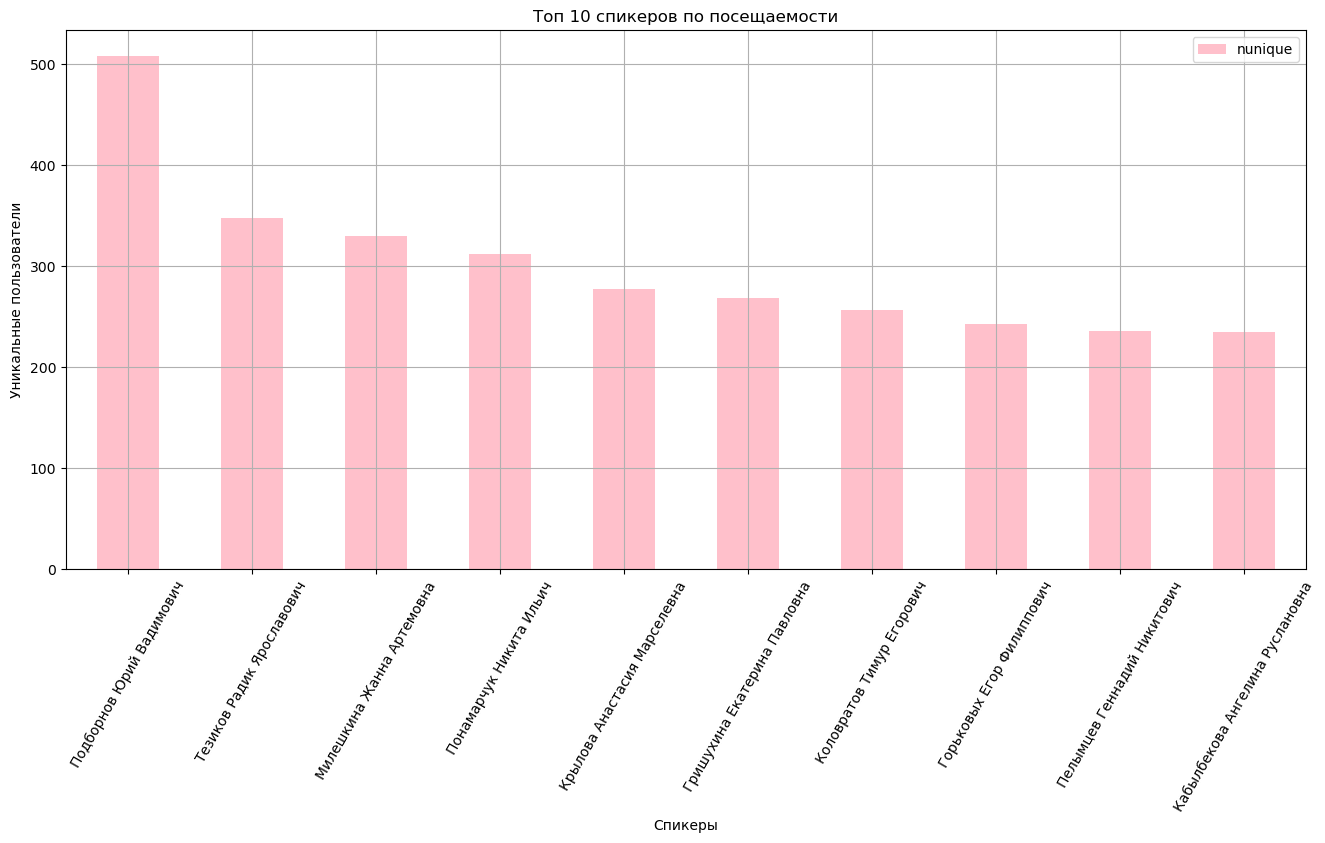

In [88]:
# построим столбчатую диаграмму 
q = df_views_22.groupby('ФИО полностью')['u_id'].agg(['nunique'])\
                        .sort_values(by = 'nunique', ascending = False).head(10)
q.plot(title = 'Топ 10 спикеров по посещаемости', kind = 'bar', grid=True, figsize = (16,7), color = ['pink', 'black'])
plt.ylabel('Уникальные пользователи')
plt.xticks(rotation=60)
plt.xlabel('Спикеры');

In [89]:
# топ 15 спикеров по времени просмотра
r = df_views_22.groupby('ФИО полностью')['Время просмотра доклада, мин'].agg(['sum', 'mean'])\
                        .sort_values(by = 'sum', ascending = False).head(15)
r

sum       mean
ФИО полностью                                  
Инжакова Юлия Артуровна        11562  23.357576
Подборнов Юрий Вадимович       10834  12.339408
Базакина Алиса Альбертовна     10655  21.923868
Горнакова Александра Петровна  10393  22.593478
Афонова Светлана Вадимовна     10393  22.593478
Шихирева Раиса Олеговна        10393  22.593478
Сафаралиева Евгения Андреевна  10393  22.593478
Бейзерман Марат Дмитриевич     10393  22.593478
Дудаев Евгений Антонович       10393  22.593478
Тезиков Радик Ярославович       6425  12.355769
Сущинский Руслан Радикович      6153  14.015945
Гришухина Екатерина Павловна    6118  14.129330
Понамарчук Никита Ильич         5552  13.125296
Пелымцев Геннадий Никитович     5420  14.728261
Милешкина Жанна Артемовна       5099  11.641553

У Артемьевой Анны Сергеевны 

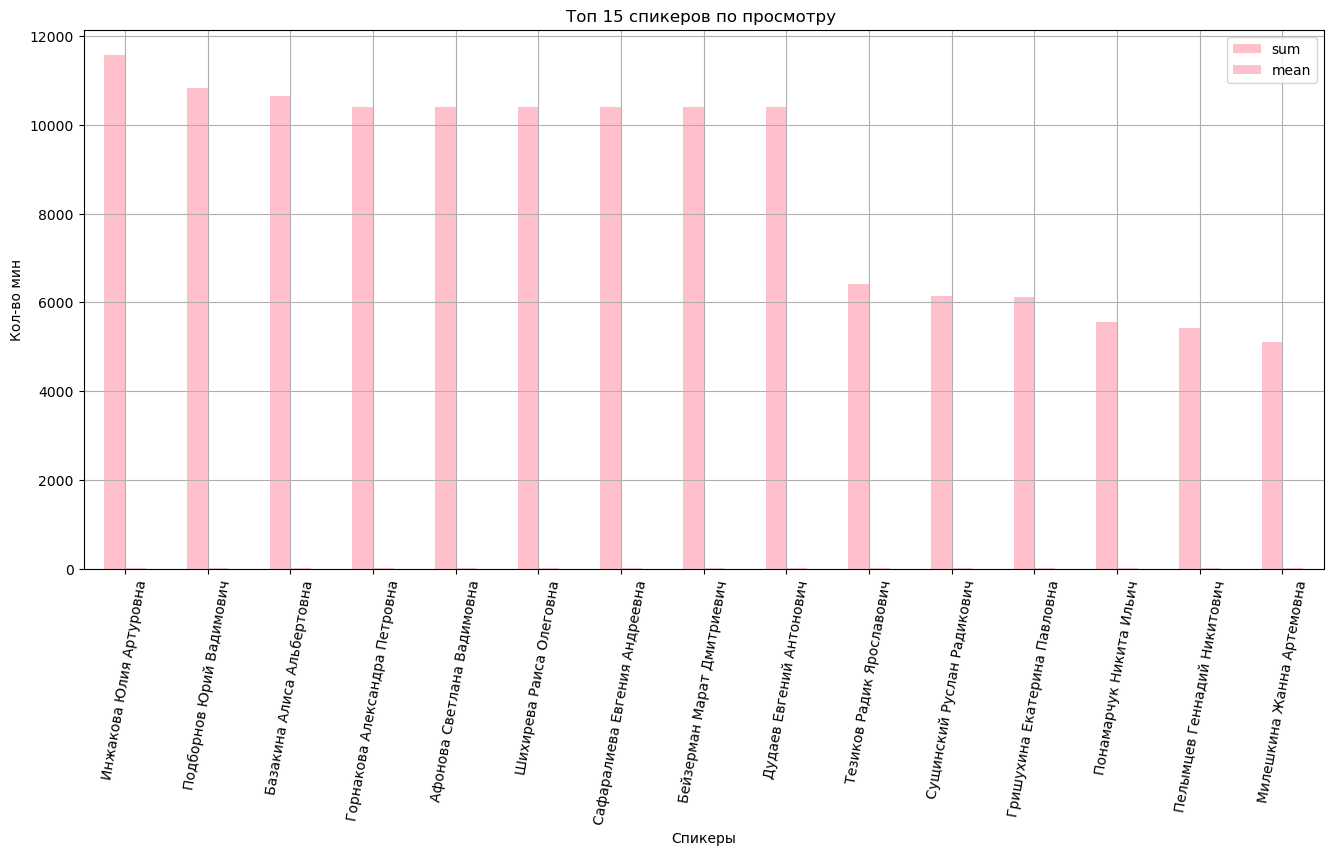

In [90]:
# построим столбчатую диаграмму 
r.plot(title = 'Топ 15 спикеров по просмотру ', kind = 'bar', grid=True, figsize = (16,7), color = ['pink'])
plt.ylabel('Кол-во мин')
plt.xticks(rotation=80)
plt.xlabel('Спикеры');

In [91]:
# топ 5 областей откуда смотрят пользователи
df_views_22.groupby('region')['u_id'].agg(['nunique'])\
                        .sort_values(by = 'nunique', ascending = False).reset_index().head(5)


region  nunique
0  санкт-петербург и область      507
1   москва и московская обл.      231
2            ростовская обл.       46
3         краснодарский край       25
4           воронежская обл.       24

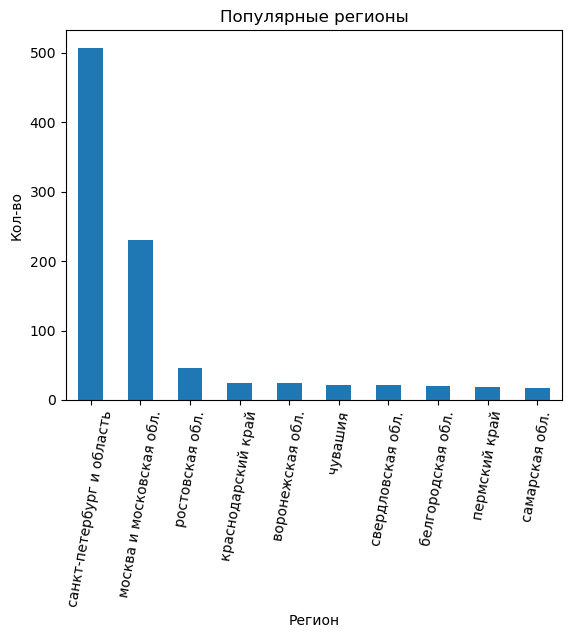

In [92]:
# построим график
df_views_22.groupby('region')['u_id'].nunique().sort_values(ascending = False).head(10).plot.bar()

plt.title('Популярные регионы')
plt.xticks(rotation=80)
plt.xlabel('Регион')
plt.ylabel('Кол-во');

In [93]:
# Наиболее популярные устройства
df_views_22.groupby('Устройство')['u_id'].agg(['nunique'])\
                        .sort_values(by = 'nunique', ascending = False).reset_index()


Устройство  nunique
0    Десктоп     1083
1  Мобильное      846
2    Планшет       39

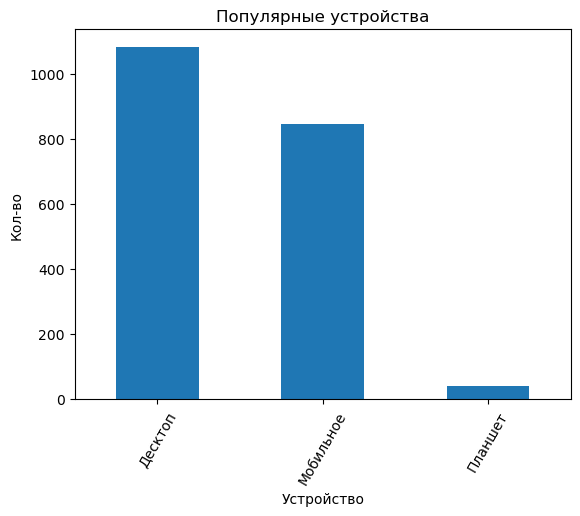

In [94]:
# построим график
df_views_22.groupby('Устройство')['u_id'].nunique().plot.bar()

plt.title('Популярные устройства')
plt.xticks(rotation=60)
plt.xlabel('Устройство')
plt.ylabel('Кол-во');

In [95]:
# Наиболее популярные специальности у пользователей на мероприятии 
df_views_22.groupby('specialization')['u_id'].agg(['nunique'])\
                        .sort_values(by = 'nunique', ascending = False).reset_index().head(10)


specialization  nunique
0                               другое      305
1     онкология: лекарственное лечение      190
2                       хирург онколог      173
3                        химиотерапевт      110
4  онкология: хирургия (абдоминальная)       60
5              патологическая анатомия       52
6            онкология: хирургия (рмж)       49
7                            онкология       46
8   лучевая диагностика: рентгенология       46
9       лучевая терапия (радиотерапия)       37

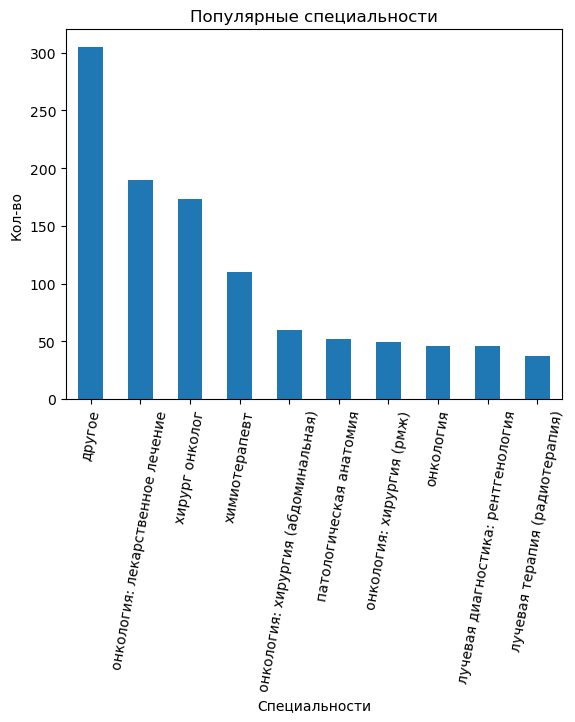

In [96]:
# построим график
df_views_22.groupby('specialization')['u_id'].nunique().sort_values(ascending = False).head(10).plot.bar()

plt.title('Популярные специальности')
plt.xticks(rotation=80)
plt.xlabel('Cпециальности')
plt.ylabel('Кол-во');

<font color='green'>**Вывод:**</font>

1) **На форуме 'Белые ночи 2022' присутствовало 1596 уникальных пользователей**
2) **Топ 5 популярных тем по посещаемости:**
- Дискуссия (1414 уникальный пользователя)
- Общая дискуссия участников сессии (525 уникальный пользователя)
- Тема 60 (409 уникальных пользователя)
- Тема 58 (268 уникальный пользователя)
- Тема 188 (248 уникальных пользователя)
3) **Топ 5 популярных тем по времени просмотра:**
- Тема 252 (суммарно - 72751 мин, среднее время просмотра - 22.5 мин)
- Тема 106 (суммарно - 43439 мин, среднее время просмотра - 16.6 мин)
- Тема 207 (суммарно - 12922 мин, среднее время просмотра - 14.2 мин)
- Общая дискуссия участников сессии (суммарно - 10369 мин, среднее время просмотра - 10 мин)
- Тема 388 (суммарно - 10357 мин, среднее время просмотра - 11.7 мин)
4) **Топ спикеров по посещаемости:**
- Подборнов Юрий Вадимович (508 уникальный пользователя)
- Тезиков Радик Ярославович (347 уникальный пользователя)
- Милешкина Жанна Артемовна (330 уникальный пользователя)
- Понамарчук Никита Ильич (312 уникальный пользователя)
- Крылова Анастасия Марселевна (277 уникальный пользователя)
5) **Топ спикеров по времени просмотра:**
- Инжакова Юлия Артуровна (суммарно - 11562 мин, среднее время просмотра - 23.3 мин)
- Подборнов Юрий Вадимович (суммарно - 10834 мин, среднее время просмотра - 12.3 мин)
- Базакина Алиса Альбертовна (суммарно - 10655 мин, среднее время просмотра - 22 мин)
- Горнакова Александра Петровна (суммарно - 10393 мин, среднее время просмотра - 23 мин)
- Афонова Светлана Вадимовна (суммарно - 10393 мин, среднее время просмотра - 23 мин)
6) **Топ 3 областей откуда смотрят пользователи:**
- Санкт-Петербург и область (507 уникальный пользователя)
- Москва и Московская область (231 уникальный пользователя)
- Ростовская обл. (46 уникальный пользователя)
7) **Наиболее популярные устройства с которых смотрят пользователи:**
- Десктоп (1083 уникальный пользователя)
- Мобильное (846 уникальный пользователя)
- Планшет (39 уникальный пользователя)
8) **Наиболее популярные специальности у пользователей:**
- Другое (305 уникальный пользователя)
- онкология: лекарственное лечение (190 уникальный пользователя)
- Хирург онколог (173 уникальный пользователя)
- Химиотерапевт (110 уникальный пользователя)
- онкология: хирургия (абдоминальная) (60 уникальный пользователя)

## Анализ Белых ночей 2023 года
<a id='section6_id'></a>

In [97]:
# сделаем срез по белым ночам 2023 года
df_views_23 = df_views.query("Мероприятие == 'Мероприятие 12'")

In [98]:
# посмотрим сколько уникальных пользователей было на мероприятии
df_views_23['u_id'].nunique()

1536

In [99]:
# посмотрим на кол-во записей с нулевым временем просмотра
df_views_23[df_views_23['Время просмотра доклада, мин'] == 0]

u_id    o_id               barcode  county  \
170270  19085  905502   0103202338431619085  Россия   
170290  19085  905502   0103202338431619085  Россия   
170337  20337  918817   1005202304231020337  Россия   
170440  15034  923688   0906202314152615034  Россия   
170475  15034  923688   0906202314152615034  Россия   
...       ...     ...                   ...     ...   
533430  13375  923200   0606202320132113375  Россия   
533431  13375  923200   0606202320132113375  Россия   
533432  13375  923200   0606202320132113375  Россия   
533434  13375  923200   0606202320132113375  Россия   
533435  21207  923741   1006202316511621207  Россия   

                           region                       city  \
170270   москва и московская обл.                     москва   
170290   москва и московская обл.                     москва   
170337  санкт-петербург и область  санкт-петербург и область   
170440            ростовская обл.             ростов-на-дону   
170475            ростовская обл.             ростов-на-дону   
...                           ...                        ...   
533430  санкт-петербург и область  санкт-петербург и область   
533431  санкт-петербург и область  санкт-петербург и область   
533432  санкт-петербург и область  санкт-петербург и область   
533434  санкт-петербург и область  санкт-петербург и область   
533435  санкт-петербург и область  санкт-петербург и область   

                                profession  \
170270  представитель медицинской компании   
170290  представитель медицинской компании   
170337                                врач   
170440                                врач   
170475                                врач   
...                                    ...   
533430                                врач   
533431                                врач   
533432                                врач   
533434                                врач   
533435                ординатор - аспирант   

                              specialization  Общее время просмотра, мин  \
170270      онкология: лекарственное лечение                           0   
170290      онкология: лекарственное лечение                           0   
170337  клиническая лабораторная диагностика                           0   
170440              лучевая диагностика: узд                           0   
170475              лучевая диагностика: узд                           0   
...                                      ...                         ...   
533430      онкология: лекарственное лечение                           0   
533431      онкология: лекарственное лечение                           0   
533432      онкология: лекарственное лечение                           0   
533434      онкология: лекарственное лечение                           0   
533435     онкология: хирургия (торакальная)                           0   

        Поток Устройство      Оп.сис        Броузер      Время начала_x  \
170270      1    Десктоп     Windows         Chrome 2023-07-04 12:11:00   
170290      1    Десктоп     Windows         Chrome 2023-07-04 13:42:00   
170337      1    Десктоп     Windows         Chrome 2023-07-04 09:45:00   
170440      1  Мобильное  iOS 15.7.3  Mobile Safari 2023-07-04 09:06:00   
170475      1  Мобильное  iOS 15.7.3  Mobile Safari 2023-07-04 09:43:00   
...       ...        ...         ...            ...                 ...   
533430      8    Десктоп     Windows         Chrome 2023-07-07 15:30:00   
533431      8    Десктоп     Windows         Chrome 2023-07-07 15:30:00   
533432      8    Десктоп     Windows         Chrome 2023-07-07 15:30:00   
533434      8    Десктоп     Windows         Chrome 2023-07-07 16:00:00   
533435      8  Мобильное     Android  Chrome Mobile 2023-07-07 15:31:00   

         Время окончания_x  Timestamp начала  Timestamp окончания  \
170270 2023-07-04 18:30:00      1.688462e+09         1.688485e+09   
170290 2023-07-04 18:30:00      1.688467e+09         1.688485e+09   
17033

In [100]:
# уберем таких пользователей
df_views_23 = df_views_23.query("`Время просмотра доклада, мин` != 0")

In [101]:
# топ 10 популярных тем по посещаемости
df_views_23.groupby('Название доклада')['u_id'].agg(['nunique', 'count'])\
                        .sort_values(by = 'nunique', ascending = False).head(10).reset_index()


Название доклада  nunique   count
0             Дискуссия     1422  121115
1      Перерыв в потоке     1197   17441
2  Приветственное слово      602    2122
3              Тема 753      563    2037
4              Тема 752      555    1999
5              Тема 751      553    1950
6              Тема 750      541    1839
7              Тема 749      532    1760
8              Тема 769      528    2655
9              Тема 768      524    2564

In [102]:
# топ 10 популярных тем по времени просмотра
df_views_23.groupby('Название доклада')['Время просмотра доклада, мин'].agg(['sum', 'mean', 'median'])\
                        .sort_values(by = 'sum', ascending = False).head(10).reset_index()

Название доклада     sum       mean  median
0         Дискуссия  680546   5.619007     5.0
1  Перерыв в потоке  456458  26.171550    30.0
2          Тема 801  297300  60.000000    60.0
3          Тема 800  290520  60.000000    60.0
4          Тема 927  244504  51.108696    70.0
5          Тема 815   53550  15.000000    15.0
6          Тема 769   39825  15.000000    15.0
7          Тема 768   38460  15.000000    15.0
8          Тема 767   37005  15.000000    15.0
9          Тема 766   35580  15.000000    15.0

In [103]:
# топ 10 спикеров по посещаемости
f = df_views_23.groupby('ФИО полностью').agg({'u_id' : 'nunique',
                                              'Название доклада' : 'nunique'})\
                        .sort_values(by = 'u_id', ascending = False).head(10).reset_index()
f.columns = ['Спикеры', 'Общая посещаемость', 'Кол-во выступлений']
f['Средняя посещаемость'] = f['Общая посещаемость']/f['Кол-во выступлений']
f

Спикеры  Общая посещаемость  Кол-во выступлений  \
0      Тезиков Радик Ярославович                 711                  12   
1      Милешкина Жанна Артемовна                 685                   4   
2   Гордон Константин Алексеевич                 659                   6   
3     Сущинский Руслан Радикович                 626                   6   
4     Бутогина Ксения Робертовна                 620                   5   
5      Горьковых Егор Филиппович                 611                  10   
6    Пелымцев Геннадий Никитович                 594                   9   
7    Васючкова Оксана Руслановна                 567                   1   
8     Матковский Максим Иванович                 564                   6   
9  Мусеева Александра Викторовна                 555                   2   

   Средняя посещаемость  
0             59.250000  
1            171.250000  
2            109.833333  
3            104.333333  
4            124.000000  
5             61.100000  
6             66.000000  
7            567.000000  
8             94.000000  
9            277.500000

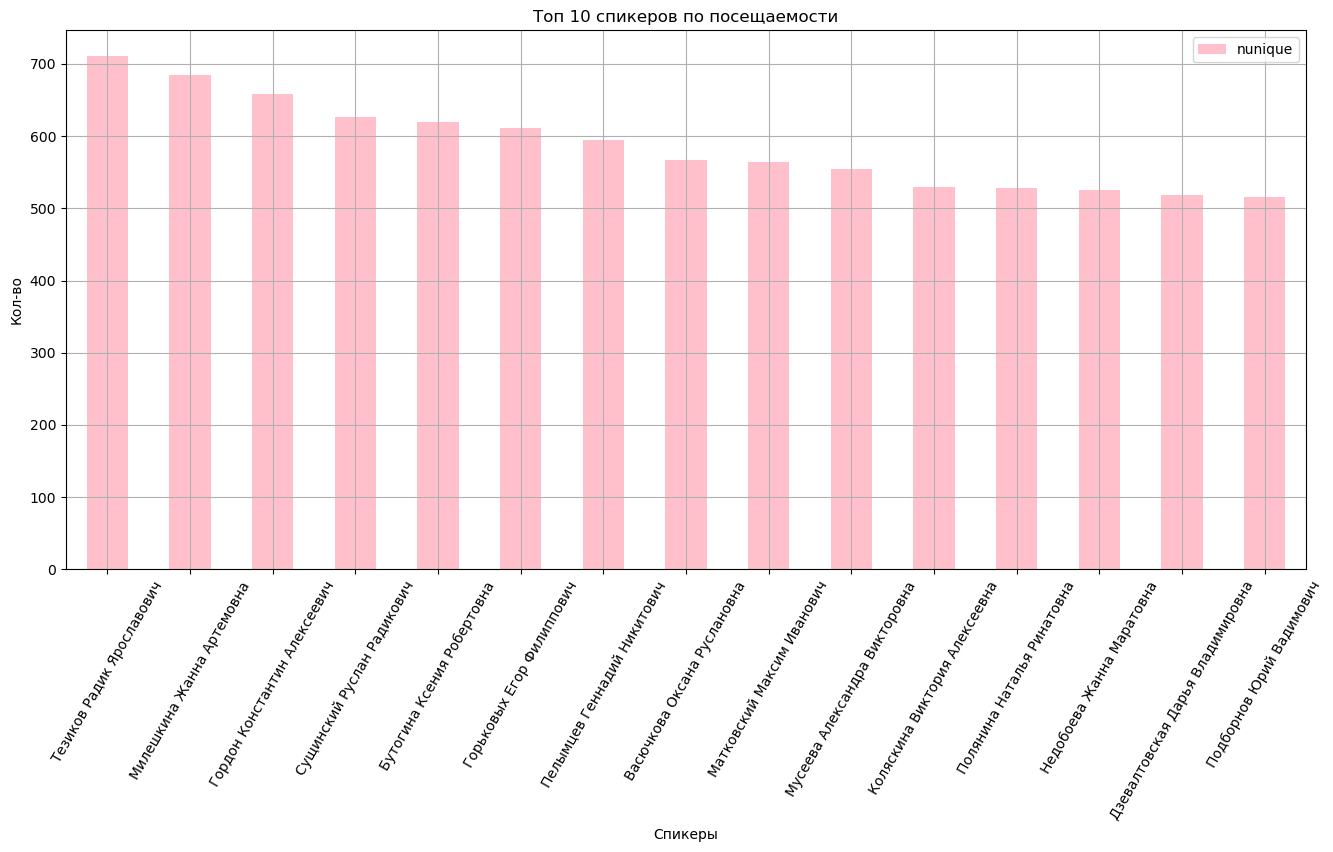

In [104]:
# построим столбчатую диаграмму 
b = df_views_23.groupby('ФИО полностью')['u_id'].agg(['nunique'])\
                        .sort_values(by = 'nunique', ascending = False).head(15)
b.plot(title = 'Топ 10 спикеров по посещаемости', kind = 'bar', grid=True, figsize = (16,7), color = ['pink'])
plt.ylabel('Кол-во')
plt.xticks(rotation=60)
plt.xlabel('Спикеры');

In [105]:
# топ 10 спикеров по времени просмотра
df_views_23.groupby('ФИО полностью')['Время просмотра доклада, мин'].agg(['sum', 'mean', 'median'])\
                        .sort_values(by = 'sum', ascending = False).reset_index().head(15)


ФИО полностью    sum       mean  median
0      Бутогина Ксения Робертовна  97088  22.636512    15.0
1     Пелымцев Геннадий Никитович  96841  12.974411    15.0
2      Матковский Максим Иванович  78467  33.865775    15.0
3       Недобоева Жанна Маратовна  66192  39.588517    60.0
4       Милешкина Жанна Артемовна  65954  14.881318    15.0
5   Сафин Станислав Станиславович  62915  52.692630    60.0
6       Писигин Сергей Филиппович  60207  56.585526    60.0
7       Тезиков Радик Ярославович  56589  13.951923    15.0
8        Подборнов Юрий Вадимович  52579  43.310544    60.0
9    Красняк Никита Станиславович  50665  51.541200    60.0
10    Васючкова Оксана Руслановна  49340  12.396985    10.0
11   Шарко Валентина Валентиновна  49057  55.937286    60.0
12    Лазутин Александр Романович  48420  60.000000    60.0
13  Аскалепова Эльвира Кирилловна  48420  60.000000    60.0
14       Конькова Жанна Романовна  48420  60.000000    60.0

In [106]:
# топ 5 областей откуда смотрят пользователи
df_views_23.groupby('region')['u_id'].agg(['nunique'])\
                        .sort_values(by = 'nunique', ascending = False).reset_index().head(5)


region  nunique
0  санкт-петербург и область      533
1   москва и московская обл.      234
2            ростовская обл.       36
3                   удмуртия       20
4          свердловская обл.       19

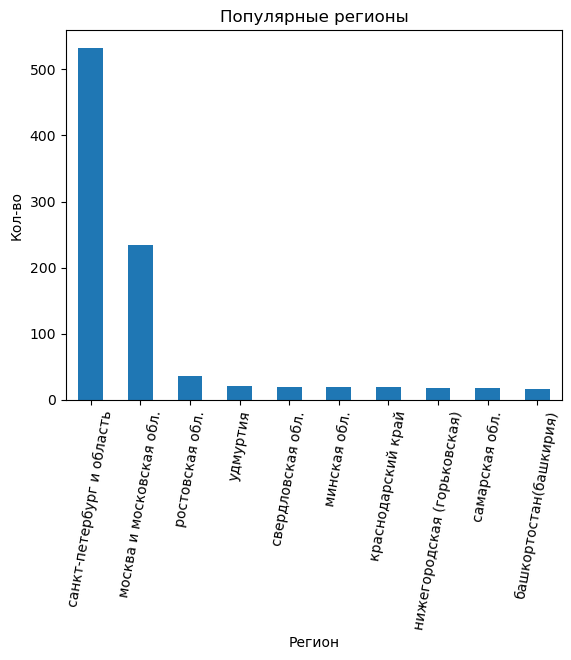

In [107]:
# построим график
df_views_23.groupby('region')['u_id'].nunique().sort_values(ascending = False).head(10).plot.bar()

plt.title('Популярные регионы')
plt.xticks(rotation=80)
plt.xlabel('Регион')
plt.ylabel('Кол-во');

In [108]:
# Наиболее популярные устройства
df_views_23.groupby('Устройство')['u_id'].agg(['nunique'])\
                        .sort_values(by = 'nunique', ascending = False).reset_index()


Устройство  nunique
0    Десктоп      914
1  Мобильное      863
2    Планшет       46

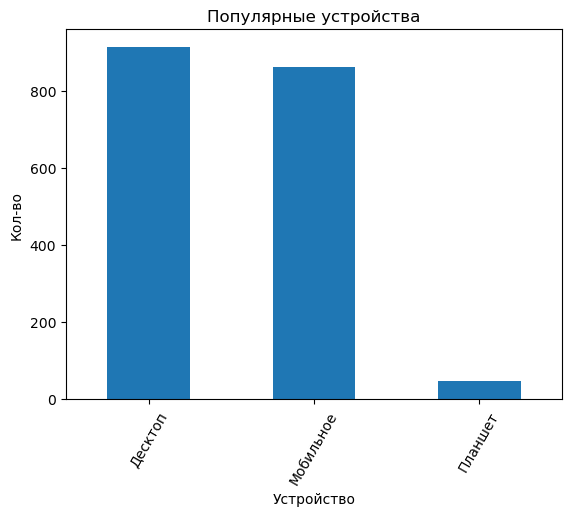

In [109]:
# построим график
df_views_23.groupby('Устройство')['u_id'].nunique().plot.bar()

plt.title('Популярные устройства')
plt.xticks(rotation=60)
plt.xlabel('Устройство')
plt.ylabel('Кол-во');

In [110]:
# Наиболее популярные специальности у пользователей на мероприятии 
df_views_23.groupby('specialization')['u_id'].agg(['nunique'])\
                        .sort_values(by = 'nunique', ascending = False).reset_index().head(10)


specialization  nunique
0                               другое      331
1     онкология: лекарственное лечение      204
2                       хирург онколог      162
3                        химиотерапевт       87
4            онкология: хирургия (рмж)       58
5  онкология: хирургия (абдоминальная)       57
6                            онкология       49
7              патологическая анатомия       38
8       лучевая терапия (радиотерапия)       35
9                             хирургия       34

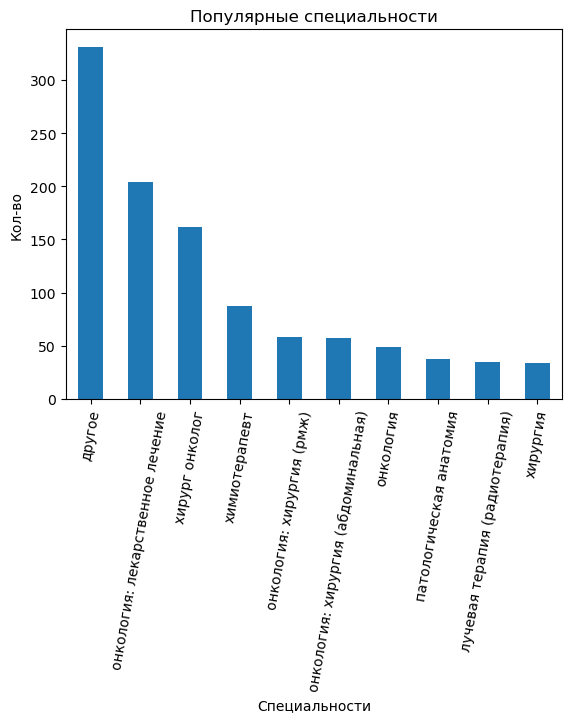

In [111]:
# построим график
df_views_23.groupby('specialization')['u_id'].nunique().sort_values(ascending = False).head(10).plot.bar()

plt.title('Популярные специальности')
plt.xticks(rotation=80)
plt.xlabel('Cпециальности')
plt.ylabel('Кол-во');

<font color='green'>**Вывод:**</font>

1) **На форуме 'Белые ночи 2023' присутствовало 1513 уникальных пользователей**
2) **Топ 5 популярных тем по посещаемости:**
- Дискуссия (1422 уникальный пользователя)
- Тема 753 (563 уникальный пользователя)
- Тема 752 (555 уникальный пользователя)
- Тема 751 (553 уникальных пользователя)
- Тема 750 (541 уникальных пользователя)
3) **Топ 5 популярных тем по времени просмотра:**
- Тема 801 (суммарно - 297300 мин, среднее время просмотра - 60 мин)
- Тема 800 (суммарно - 290520 мин, среднее время просмотра - 60 мин)
- Тема 927 (суммарно - 244504 мин, среднее время просмотра - 51.1 мин)
- Тема 815 (суммарно - 53550 мин, среднее время просмотра - 15 мин)
- Тема 769 (суммарно - 39825 мин, среднее время просмотра - 15 мин)
4) **Топ спикеров по посещаемости:**
- Тезиков Радик Ярославович (711 уникальный пользователя)
- Милешкина Жанна Артемовна (685 уникальный пользователя)
- Гордон Константин Алексеевич (659 уникальный пользователя)
- Сущинский Руслан Радикович (626 уникальный пользователя)
- Бутогина Ксения Робертовна (620 уникальный пользователя)
5) **Топ спикеров по времени просмотра:**
- Бутогина Ксения Робертовна (суммарно - 97462 мин, среднее время просмотра - 13 мин)
- Пелымцев Геннадий Никитович (суммарно - 97088 мин, среднее время просмотра - 22.6 мин)
- Матковский Максим Иванович (суммарно - 78852 мин, среднее время просмотра - 34 мин)
- Недобоева Жанна Маратовна (суммарно - 66468 мин, среднее время просмотра - 15 мин)
- Милешкина Жанна Артемовна (суммарно - 66192 мин, среднее время просмотра - 39.5 мин)
6) **Топ 3 областей откуда смотрят пользователи:**
- Санкт-Петербург и область (533 уникальный пользователя)
- Москва и Московская область (234 уникальный пользователя)
- Ростовская обл. (36 уникальный пользователя)
7) **Наиболее популярные устройства с которых смотрят пользователи:**
- Детскоп (914 уникальный пользователя)
- Мобильное (863 уникальный пользователя)
- Планшет (46 уникальный пользователя)
8) **Наиболее популярные специальности у пользователей:**
- Другое (331 уникальный пользователя)
- онкология: лекарственное лечение (204 уникальный пользователя)
- Хирург онколог (162 уникальный пользователя)
- Химиотерапевт (87 уникальный пользователя)
- онкология: хирургия (абдоминальная) (58 уникальный пользователя)
- онкология: хирургия (рмж) (57 уникальный пользователя)

# Все мероприятия с расписанием
<a id='section7_id'></a>

In [112]:
# соединим два датафрейма, расписания за 2022 и 2023 года и расписания небольших мероприятий
df22_23_small = pd.concat([df22_23, df_small], ignore_index=True)

In [113]:
# преобразование столбцов в нужный тип данных
df22_23_small['Время начала'] = df22_23_small['Время начала'].astype(str)
df22_23_small['Время окончания'] = df22_23_small['Время окончания'].astype(str)
df22_23_small['Дата'] = df22_23_small['Дата'].astype(str)
df22_23_small['Время начала_1'] = df22_23_small['Время начала_1'].astype(str)
df22_23_small['Время окончания_1'] = df22_23_small['Время окончания_1'].astype(str)

In [114]:
# преобразование столбцов в нужный тип данных
df22_23_small['Время начала'] = pd.to_datetime(df22_23_small['Время начала']).dt.time
df22_23_small['Время окончания'] = pd.to_datetime(df22_23_small['Время окончания']).dt.time
df22_23_small['Дата'] = pd.to_datetime(df22_23_small['Дата']).dt.date
df22_23_small['Дата'] = pd.to_datetime(df22_23_small['Дата'])
df22_23_small['Время начала_1'] = pd.to_datetime(df22_23_small['Время начала_1'])
df22_23_small['Время окончания_1'] = pd.to_datetime(df22_23_small['Время окончания_1'])

In [115]:
df22_23_small

Время начала Время окончания Продолжительность       Дата  Поток  \
0        10:00:00        10:20:00          00:20:00 2022-06-27      1   
1        10:20:00        10:25:00          00:05:00 2022-06-27      1   
2        10:25:00        10:45:00          00:20:00 2022-06-27      1   
3        10:45:00        10:50:00          00:05:00 2022-06-27      1   
4        10:50:00        11:10:00          00:20:00 2022-06-27      1   
...           ...             ...               ...        ...    ...   
2853     14:55:00        15:10:00          00:15:00 2023-01-23      1   
2854     15:10:00        15:20:00          00:10:00 2023-01-23      1   
2855     15:20:00        15:30:00          00:10:00 2023-01-23      1   
2856     15:30:00        15:40:00          00:10:00 2023-01-23      1   
2857     15:40:00        16:00:00          00:10:00 2023-01-23      1   

     Название доклада                    ФИО полностью  \
0             Тема 54       Самборский Илья Филиппович   
1           Дискуссия                              NaN   
2             Тема 56     Шашина Марина Константиновна   
3           Дискуссия                              NaN   
4             Тема 57  Кабылбекова Ангелина Руслановна   
...               ...                              ...   
2853          Тема 49    Бабочкина Елизавета Сергеевна   
2854          Тема 50         Джин Геннадий Степанович   
2855          Тема 51        Самедов Валерий Дамирович   
2856          Тема 52     Растегаев Роман Валентинович   
2857          Тема 53          Монина Галина Андреевна   

                                       Учреждение/Организация  \
0     ФГБУ «НМИЦ онкологии им. Н.Н. Петрова» Минздрава России   
1                                                         NaN   
2     ФГБУ «НМИЦ онкологии им. Н.Н. Блохина» Минздрава России   
3                                                         NaN   
4     ФГБУ «НМИЦ онкологии им. Н.Н. Петрова» Минздрава России   
...                                                       ...   
2853                                                      NaN   
2854                                                      NaN   
2855                                                      NaN   
2856                                                      NaN   
2857                                                      NaN   

                Город      Время начала_1   Время окончания_1  
0     Санкт-Петербург 2022-06-27 10:00:00 2022-06-27 10:20:00  
1                 NaN 2022-06-27 10:20:00 2022-06-27 10:25:00  
2              Москва 2022-06-27 10:25:00 2022-06-27 10:45:00  
3                 NaN 2022-06-27 10:45:00 2022-06-27 10:50:00  
4     Санкт-Петербург 2022-06-27 10:50:00 2022-06-27 11:10:00  
...               ...                 ...                 ...  
2853              NaN 2023-01-23 14:55:00 2023-01-23 15:10:00  
2854              NaN 2023-01-23 15:10:00 2023-01-23 15:20:00  
2855              NaN 2023-01-23 15:20:00 2023-01-23 15:30:00  
2856              NaN 2023-01-23 15:30:00 2023-01-23 15:40:00  
2857              NaN 2023-01-23 15:40:00 2023-01-23 16:00:00  

[2858 rows x 11 columns]

In [116]:
# посмотрим на дубликаты
df22_23_small[df22_23_small.duplicated()]

Empty DataFrame
Columns: [Время начала, Время окончания, Продолжительность, Дата, Поток, Название доклада, ФИО полностью, Учреждение/Организация, Город, Время начала_1, Время окончания_1]
Index: []

In [117]:
df22_23_small.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2858 entries, 0 to 2857
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Время начала            2858 non-null   object        
 1   Время окончания         2858 non-null   object        
 2   Продолжительность       2858 non-null   object        
 3   Дата                    2858 non-null   datetime64[ns]
 4   Поток                   2858 non-null   int64         
 5   Название доклада        2843 non-null   object        
 6   ФИО полностью           1623 non-null   object        
 7   Учреждение/Организация  1535 non-null   object        
 8   Город                   1535 non-null   object        
 9   Время начала_1          2858 non-null   datetime64[ns]
 10  Время окончания_1       2858 non-null   datetime64[ns]
dtypes: datetime64[ns](3), int64(1), object(7)
memory usage: 245.7+ KB


In [118]:
# соединим два датафрейма, мереприятия и расписание
df_views_all = pd.merge(df_ev, df22_23_small, on= ['Дата','Поток'])

In [119]:
# соединим два датафрейма, мереприятия и расписание рубрик
df_views_all = pd.merge(df_views_all, df_rub,\
                      on= ['Дата','Поток', 'Время начала_y'], how = 'left')

In [120]:
# отфильтруем по времени начала и окончания
df_views_all = df_views_all.query('(`Время начала_x` >= `Время начала_1` & `Время окончания_x` <= `Время окончания_1`)|(`Время окончания_x` >= `Время начала_1` & `Время окончания_x` <= `Время окончания_1`)|(`Время начала_x` <= `Время начала_1` & `Время окончания_x` >= `Время окончания_1`)')\
                        .reset_index(drop=True)

In [121]:
df_ev.shape

(133280, 27)

In [122]:
df22_23_small.shape

(2858, 11)

In [123]:
df_views_all.shape

(516393, 41)

In [124]:
# посмотрим на дубликаты
df_views_all.duplicated().sum()

161

In [125]:
df_views_all.shape

(516393, 41)

In [126]:
# посмотрим на дубликаты
df_views_all[df_views_all.duplicated()]

u_id    o_id                barcode    county  \
106990   9892  506914   230320221222339904.0    Россия   
107023  15560  531952  1506202234202115584.0    Россия   
107058  15326  531406  1406202254041815296.0    Россия   
107098   9975  527969   260420220928269984.0    Россия   
107182  15445  531644  1506202235041115392.0    Россия   
...       ...     ...                    ...       ...   
115005   4384  531565   140620222250134384.0  Беларусь   
115007   4384  531565   140620222250134384.0  Беларусь   
115054   4382  530181    20620221920064384.0    Россия   
115076  15512  531861  1506202248151715584.0    Россия   
115079  10462  532584  2706202206355510272.0    Россия   

                                 region                       city  \
106990                  ростовская обл.             ростов-на-дону   
107023        санкт-петербург и область  санкт-петербург и область   
107058                   самарская обл.                     самара   
107098        санкт-петербург и область  санкт-петербург и область   
107182                          чувашия                  чебоксары   
...                                 ...                        ...   
115005                     минская обл.                      минск   
115007                     минская обл.                      минск   
115054  карачаево-черкесская республика                   черкесск   
115076        санкт-петербург и область  санкт-петербург и область   
115079                свердловская обл.               екатеринбург   

                       profession  \
106990                       врач   
107023       ординатор - аспирант   
107058                       врач   
107098  руководящее звено клиники   
107182                       врач   
...                           ...   
115005                       врач   
115007                       врач   
115054                       врач   
115076                     другое   
115079                       врач   

                                         specialization  \
106990                                           другое   
107023                                онкология детская   
107058  лучевая диагностика: радионуклидная диагностика   
107098                онкология: хирургия (торакальная)   
107182                                           другое   
...                                                 ...   
115005                                     патоморфолог   
115007                                     патоморфолог   
115054                                   хирург онколог   
115076                   лучевая терапия (радиотерапия)   
115079                        онкология: хирургия (рмж)   

        Общее время просмотра, мин  Поток Устройство     Оп.сис  \
106990                        1660      4    Десктоп    Windows   
107023                          53      4  Мобильное   iOS 15.5   
107058                         451      4    Десктоп  Windows 7   
107098                         488      4    Десктоп    Windows   
107182                         399      4    Десктоп    Windows   
...                            ...    ...        ...        ...   
115005                         112      4    Десктоп  Windows 7   
115007                         112      4    Десктоп  Windows 7   
115054                         137      4    Десктоп    Windows   
115076                          92      4    Десктоп      Linux   
115079                           6      4  Мобильное   iOS 15.3   

              Броузер      Время начала_x   Время окончания_x  \
106990         Chrome 2022-06-28 10:55:36 2022-06-28 15:26:07   
107023  Mobile Safari 2022-06-28 15:01:04 2022-06-28 15:02:40   
107058         Chrome 2022-06-28 13:18:28 2022-06-28 16:18:31   
107098         Chrome 2022-06-28 08:49:26 2022-06-28 16:56:57   
107182         Chrome 2022-06-28 14:46:05 2022-06-28 15:31:12   
...               ...                 ...                 ...   
115005         Chrome 2022-06-28 15:06:58 2022-06-28 15:0

In [127]:
df_views_all = df_views_all.drop_duplicates()
df_views_all.duplicated().sum()

0

In [128]:
# удалим столбцы
df_views_all = df_views_all.drop(['Год', 'Время окончания_y_y'], axis= 1)

In [129]:
# т.к. рубрики только для форумов, заполним пропуски для малых мероприятий на 'не определенно'
df_views_all['Сессия'] = df_views_all['Сессия'].fillna('Не определенно')
df_views_all['Код классификатора'] = df_views_all['Код классификатора'].fillna('Не определенно')
df_views_all['Направление'] = df_views_all['Направление'].fillna('Не определенно')

In [130]:
df_views_all.head()

u_id    o_id               barcode  county         region    city  \
0  16573  626199   0809202204421616573  Россия  амурская обл.     NaN   
1  16573  626199   0809202204421616573  Россия  амурская обл.     NaN   
2  16573  626199   0809202204421616573  Россия  амурская обл.     NaN   
3  16573  626199   0809202204421616573  Россия  амурская обл.     NaN   
4   1396  619071    250820222020141396  Россия       удмуртия  ижевск   

  profession             specialization  Общее время просмотра, мин  Поток  \
0       врач  онкология: хирургия (огш)                          52      1   
1       врач  онкология: хирургия (огш)                          52      1   
2       врач  онкология: хирургия (огш)                          52      1   
3       врач  онкология: хирургия (огш)                          52      1   
4       врач                     другое                          60      1   

  Устройство   Оп.сис Броузер      Время начала_x   Время окончания_x  \
0    Десктоп  Windows  Chrome 2022-09-15 09:54:57 2022-09-15 10:09:45   
1    Десктоп  Windows  Chrome 2022-09-15 10:10:06 2022-09-15 10:14:57   
2    Десктоп  Windows  Chrome 2022-09-15 10:14:59 2022-09-15 10:31:41   
3    Десктоп  Windows  Chrome 2022-09-15 10:31:44 2022-09-15 10:41:28   
4    Десктоп  Windows  Chrome 2022-09-15 09:43:51 2022-09-15 10:43:30   

   Timestamp начала  Timestamp окончания Время просмотра, мин  Кол-во кликов  \
0      1.663225e+09         1.663226e+09                   15            NaN   
1      1.663226e+09         1.663226e+09                    5            NaN   
2      1.663226e+09         1.663227e+09                   17            NaN   
3      1.663227e+09         1.663228e+09                   10            NaN   
4      1.663224e+09         1.663228e+09                   60            NaN   

  ID открытой сессии ID закрытой сессии              IP  \
0                NaN     bquNyVcL7eCLeE  212.124.21.110   
1                NaN     bquNyVcL7eCLeE  212.124.21.110   
2                NaN     bquNyVcL7eCLeE  212.124.21.110   
3                NaN     bquNyVcL7eCLeE  212.124.21.110   
4                NaN     7XeM2Zg35nnKkW    92.55.34.158   

                  server_session_id     Статус открытия Статус закрытия  \
0  vIsrJYwqtiP3UwjQ3gCiHPl6OS1eFpnu   PLAY_RESTART_STOP   DESTROY_PAUSE   
1  vIsrJYwqtiP3UwjQ3gCiHPl6OS1eFpnu  PLAY_RESTART_PAUSE   DESTROY_PAUSE   
2  vIsrJYwqtiP3UwjQ3gCiHPl6OS1eFpnu  PLAY_RESTART_PAUSE   DESTROY_PAUSE   
3  vIsrJYwqtiP3UwjQ3gCiHPl6OS1eFpnu  PLAY_RESTART_PAUSE    DESTROY_STOP   
4  kDx3zFTook3oTBx4P7Nkkd1acekpAszw  PLAY_RESTART_SOKET             NaN   

     Мероприятие       Дата Время начала_y Время окончания_y_x  \
0  Мероприятие 1 2022-09-15       10:00:00            11:15:00   
1  Мероприятие 1 2022-09-15       10:00:00            11:15:00   
2  Мероприятие 1 2022-09-15       10:00:00            11:15:00   
3  Мероприятие 1 2022-09-15       10:00:00            11:15:00   
4  Мероприятие 1 2022-09-15       10:00:00            11:15:00   

  Продолжительность Название доклада          ФИО полностью  \
0          00:15:00           Тема 1  Ямаева Анна Даниловна   
1          00:15:00           Тема 1  Ямаева Анна Даниловна   
2          00:15:00           Тема 1  Ямаева Анна Даниловна   
3          00:15:00           Тема 1  Ямаева Анна Даниловна   
4          00:15:00           Тема 1  Ямаева Анна Даниловна   

  Учреждение/Организация Город      Время начала_1   Время окончания_1  \
0                    NaN   NaN 2022-09-15 10:00:00 2022-09-15 11:15:00   
1                    NaN   NaN 2022-09-15 10:00:00 2022-09-15 11:15:00   
2                    NaN   NaN 2022-09-15 10:00:00 2022-09-15 11:15:00   
3                    NaN   NaN 2022-09-15 10:00:00 2022-09-15 11:15:00   
4                    NaN   NaN 2022-09-15 10:00:00 2022-09-15 11:15:00   

           Сессия Код классификатора     Направление  
0  Не определенно     Не определенно  Не определенно  
1  Не определенно     Не определенно  Н

In [131]:
# создадим функцию для подсчета времени просмотра доклада
def calculate_duration(row):

    if row['Время начала_1'] >= row['Время начала_x'] and row['Время окончания_1'] <= row['Время окончания_x']:
        duration = row['Время окончания_1'] - row['Время начала_1']
    elif row['Время начала_1'] < row['Время начала_x'] and row['Время окончания_1'] < row['Время начала_x']:
        duration = row['Время окончания_1'] - row['Время начала_x']
    elif row['Время начала_1'] < row['Время начала_x'] and row['Время окончания_1'] > row['Время окончания_x']:
        duration = row['Время окончания_x'] - row['Время начала_x']   
    elif row['Время начала_1'] < row['Время окончания_x'] and row['Время окончания_1'] > row['Время окончания_x']:
        duration = row['Время окончания_x'] - row['Время начала_1']
    else:
        duration = pd.NaT
    
    return duration



# Применяем функцию к каждой строке и добавляем новый столбец в датафрейм
df_views_all['Время просмотра доклада, мин'] = df_views_all.apply(calculate_duration, axis=1)

In [132]:
df_views_all['Время просмотра доклада, мин'] = df_views_all['Время просмотра доклада, мин'].fillna('0')

In [133]:
df_views_all['Время просмотра доклада, мин'] = df_views_all['Время просмотра доклада, мин'].dt.total_seconds().div(60).astype(int)

In [134]:
df_views_all.head()

u_id    o_id               barcode  county         region    city  \
0  16573  626199   0809202204421616573  Россия  амурская обл.     NaN   
1  16573  626199   0809202204421616573  Россия  амурская обл.     NaN   
2  16573  626199   0809202204421616573  Россия  амурская обл.     NaN   
3  16573  626199   0809202204421616573  Россия  амурская обл.     NaN   
4   1396  619071    250820222020141396  Россия       удмуртия  ижевск   

  profession             specialization  Общее время просмотра, мин  Поток  \
0       врач  онкология: хирургия (огш)                          52      1   
1       врач  онкология: хирургия (огш)                          52      1   
2       врач  онкология: хирургия (огш)                          52      1   
3       врач  онкология: хирургия (огш)                          52      1   
4       врач                     другое                          60      1   

  Устройство   Оп.сис Броузер      Время начала_x   Время окончания_x  \
0    Десктоп  Windows  Chrome 2022-09-15 09:54:57 2022-09-15 10:09:45   
1    Десктоп  Windows  Chrome 2022-09-15 10:10:06 2022-09-15 10:14:57   
2    Десктоп  Windows  Chrome 2022-09-15 10:14:59 2022-09-15 10:31:41   
3    Десктоп  Windows  Chrome 2022-09-15 10:31:44 2022-09-15 10:41:28   
4    Десктоп  Windows  Chrome 2022-09-15 09:43:51 2022-09-15 10:43:30   

   Timestamp начала  Timestamp окончания Время просмотра, мин  Кол-во кликов  \
0      1.663225e+09         1.663226e+09                   15            NaN   
1      1.663226e+09         1.663226e+09                    5            NaN   
2      1.663226e+09         1.663227e+09                   17            NaN   
3      1.663227e+09         1.663228e+09                   10            NaN   
4      1.663224e+09         1.663228e+09                   60            NaN   

  ID открытой сессии ID закрытой сессии              IP  \
0                NaN     bquNyVcL7eCLeE  212.124.21.110   
1                NaN     bquNyVcL7eCLeE  212.124.21.110   
2                NaN     bquNyVcL7eCLeE  212.124.21.110   
3                NaN     bquNyVcL7eCLeE  212.124.21.110   
4                NaN     7XeM2Zg35nnKkW    92.55.34.158   

                  server_session_id     Статус открытия Статус закрытия  \
0  vIsrJYwqtiP3UwjQ3gCiHPl6OS1eFpnu   PLAY_RESTART_STOP   DESTROY_PAUSE   
1  vIsrJYwqtiP3UwjQ3gCiHPl6OS1eFpnu  PLAY_RESTART_PAUSE   DESTROY_PAUSE   
2  vIsrJYwqtiP3UwjQ3gCiHPl6OS1eFpnu  PLAY_RESTART_PAUSE   DESTROY_PAUSE   
3  vIsrJYwqtiP3UwjQ3gCiHPl6OS1eFpnu  PLAY_RESTART_PAUSE    DESTROY_STOP   
4  kDx3zFTook3oTBx4P7Nkkd1acekpAszw  PLAY_RESTART_SOKET             NaN   

     Мероприятие       Дата Время начала_y Время окончания_y_x  \
0  Мероприятие 1 2022-09-15       10:00:00            11:15:00   
1  Мероприятие 1 2022-09-15       10:00:00            11:15:00   
2  Мероприятие 1 2022-09-15       10:00:00            11:15:00   
3  Мероприятие 1 2022-09-15       10:00:00            11:15:00   
4  Мероприятие 1 2022-09-15       10:00:00            11:15:00   

  Продолжительность Название доклада          ФИО полностью  \
0          00:15:00           Тема 1  Ямаева Анна Даниловна   
1          00:15:00           Тема 1  Ямаева Анна Даниловна   
2          00:15:00           Тема 1  Ямаева Анна Даниловна   
3          00:15:00           Тема 1  Ямаева Анна Даниловна   
4          00:15:00           Тема 1  Ямаева Анна Даниловна   

  Учреждение/Организация Город      Время начала_1   Время окончания_1  \
0                    NaN   NaN 2022-09-15 10:00:00 2022-09-15 11:15:00   
1                    NaN   NaN 2022-09-15 10:00:00 2022-09-15 11:15:00   
2                    NaN   NaN 2022-09-15 10:00:00 2022-09-15 11:15:00   
3                    NaN   NaN 2022-09-15 10:00:00 2022-09-15 11:15:00   
4                    NaN   NaN 2022-09-15 10:00:00 2022-09-15 11:15:00   

           Сессия Код классификатора     Направление  \
0  Не определенно     Не определенно  Не определенно   
1  Не определенно     Не определенно 

In [135]:
intersecting_sessions = df_views_all[(df_views_all.duplicated(subset=['u_id', 'o_id', 'Время начала_x', 'Время окончания_x'], keep=False))]

In [136]:
intersecting_sessions

u_id    o_id               barcode  county  \
94       9398  627120    160920221012159398  Россия   
95       9398  627120    160920221012159398  Россия   
96       9398  627120    160920221012159398  Россия   
97       9398  627120    160920221012159398  Россия   
99       1396  619071    250820222020141396  Россия   
...       ...     ...                   ...     ...   
516387  13375  923200   0606202320132113375  Россия   
516388  13375  923200   0606202320132113375  Россия   
516389  13375  923200   0606202320132113375  Россия   
516391  13375  923200   0606202320132113375  Россия   
516392  21207  923741   1006202316511621207  Россия   

                           region                       city  \
94                       калмыкия                     элиста   
95                       калмыкия                     элиста   
96                       калмыкия                     элиста   
97                       калмыкия                     элиста   
99                       удмуртия                     ижевск   
...                           ...                        ...   
516387  санкт-петербург и область  санкт-петербург и область   
516388  санкт-петербург и область  санкт-петербург и область   
516389  санкт-петербург и область  санкт-петербург и область   
516391  санкт-петербург и область  санкт-петербург и область   
516392  санкт-петербург и область  санкт-петербург и область   

                  profession                     specialization  \
94                      врач   онкология: лекарственное лечение   
95                      врач   онкология: лекарственное лечение   
96                      врач   онкология: лекарственное лечение   
97                      врач   онкология: лекарственное лечение   
99                      врач                             другое   
...                      ...                                ...   
516387                  врач   онкология: лекарственное лечение   
516388                  врач   онкология: лекарственное лечение   
516389                  врач   онкология: лекарственное лечение   
516391                  врач   онкология: лекарственное лечение   
516392  ординатор - аспирант  онкология: хирургия (торакальная)   

        Общее время просмотра, мин  Поток Устройство   Оп.сис        Броузер  \
94                             198      1    Десктоп  Windows         Chrome   
95                             198      1    Десктоп  Windows         Chrome   
96                             198      1    Десктоп  Windows         Chrome   
97                             198      1    Десктоп  Windows         Chrome   
99                             198      1    Десктоп  Windows         Chrome   
...                            ...    ...        ...      ...            ...   
516387                           0      8    Десктоп  Windows         Chrome   
516388                           0      8    Десктоп  Windows         Chrome   
516389                           0      8    Десктоп  Windows         Chrome   
516391                           0      8    Десктоп  Windows         Chrome   
516392                           0      8  Мобильное  Android  Chrome Mobile   

            Время начала_x   Время окончания_x  Timestamp начала  \
94     2022-09-16 10:56:18 2022-09-16 13:27:39      1.663315e+09   
95     2022-09-16 10:56:18 2022-09-16 13:27:39      1.663315e+09   
96     2022-09-16 10:56:18 2022-09-16 13:27:39      1.663315e+09   
97     2022-09-16 10:56:18 2022-09-16 13:27:39      1.663315e+09   
99     2022-09-16 10:44:11 2022-09-16 14:02:26      1.663314e+09   
...                    ...                 ...               ...   
516387 2023-07-07 15:29:00 2023-07-07 15:30:00      1.688733e+09   
516388 2023-07-07 15:29:00 2023-07-07 15:30:00      1.688733e+09   
516389 2023-07-07 15:29:00 2023-07-07 15:30:00      1.688733e+09   
516391 2023-07-07 16:00:00 2023-07-07 16:00:00      1.688735e+09   
516392 2023-07-07 15:31:00 2023-07-07 15:31:00      1.688733e+09 

In [137]:
df_views_all.shape

(516232, 40)

In [138]:
df_views_all['Мероприятие'].unique()

array(['Мероприятие 1', 'Мероприятие 2', 'Мероприятие 3', 'Мероприятие 4',
       'Мероприятие 5', 'Мероприятие 6', 'Мероприятие 11',
       'Мероприятие 12'], dtype=object)

In [139]:
# посмотрим на кол-во записей с нулевым временем просмотра
df_views_all[df_views_all['Время просмотра доклада, мин'] == 0]

u_id    o_id               barcode    county  \
27      15517  626185   0809202216164915517  Беларусь   
28      15517  626185   0809202216164915517  Беларусь   
30       4104  626315    090920221233164104    Россия   
39      16582  626259   0909202222130616582    Россия   
46      13702  626864   1409202212052313702    Россия   
...       ...     ...                   ...       ...   
516387  13375  923200   0606202320132113375    Россия   
516388  13375  923200   0606202320132113375    Россия   
516389  13375  923200   0606202320132113375    Россия   
516391  13375  923200   0606202320132113375    Россия   
516392  21207  923741   1006202316511621207    Россия   

                           region                       city  \
27               гродненская обл.                     гродно   
28               гродненская обл.                     гродно   
30               кемеровская обл.                   кемерово   
39         башкортостан(башкирия)                        уфа   
46             кабардино-балкария                    нальчик   
...                           ...                        ...   
516387  санкт-петербург и область  санкт-петербург и область   
516388  санкт-петербург и область  санкт-петербург и область   
516389  санкт-петербург и область  санкт-петербург и область   
516391  санкт-петербург и область  санкт-петербург и область   
516392  санкт-петербург и область  санкт-петербург и область   

                       profession                     specialization  \
27                           врач            патологическая анатомия   
28                           врач            патологическая анатомия   
30                           врач                     хирург онколог   
39                           врач   онкология: лекарственное лечение   
46      студент медицинского вуза                           хирургия   
...                           ...                                ...   
516387                       врач   онкология: лекарственное лечение   
516388                       врач   онкология: лекарственное лечение   
516389                       врач   онкология: лекарственное лечение   
516391                       врач   онкология: лекарственное лечение   
516392       ординатор - аспирант  онкология: хирургия (торакальная)   

        Общее время просмотра, мин  Поток Устройство      Оп.сис  \
27                               2      1    Десктоп     Windows   
28                               2      1    Десктоп     Windows   
30                              59      1  Мобильное     Android   
39                              28      1  Мобильное  iOS 15.6.1   
46                              13      1  Мобильное  iOS 15.6.1   
...                            ...    ...        ...         ...   
516387                           0      8    Десктоп     Windows   
516388                           0      8    Десктоп     Windows   
516389                           0      8    Десктоп     Windows   
516391                           0      8    Десктоп     Windows   
516392                           0      8  Мобильное     Android   

              Броузер      Время начала_x   Время окончания_x  \
27             Chrome 2022-09-15 10:00:04 2022-09-15 10:00:20   
28             Chrome 2022-09-15 10:00:22 2022-09-15 10:00:32   
30             Chrome 2022-09-15 10:00:52 2022-09-15 10:01:37   
39      Mobile Safari 2022-09-15 10:12:39 2022-09-15 10:13:23   
46      Mobile Safari 2022-09-15 10:10:04 2022-09-15 10:10:29   
...               ...                 ...                 ...   
516387         Chrome 2023-07-07 15:29:00 2023-07-07 15:30:00   
516388         Chrome 2023-07-07 15:29:00 2023-07-07 15:30:00   
516389         Chrome 2023-07-07 15:29:00 2023-07-07 15:30:00   
516391         Chrome 2023-07-07 16:00:00 2023-07-07 16:00:00   
516392  Chrome Mobile 2023-07-07 15:31:00 2023-07-07 15:31:00   

        Timestamp начала  Timestamp окончания Время просмотра, мин  \
27          1.663225e+

In [140]:
# удалим такие строки 
df_views_all = df_views_all.query("`Время просмотра доклада, мин` != 0")

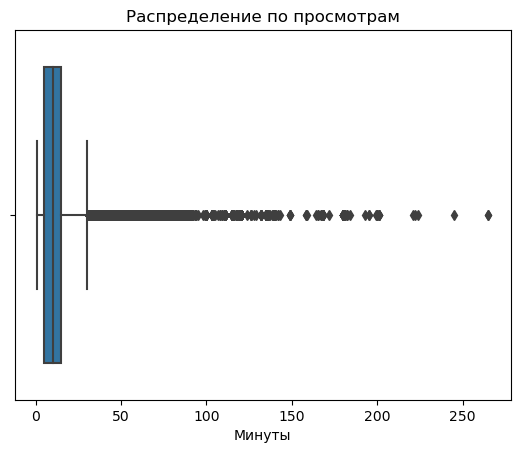

In [141]:
# посмотрим на распределение просмотров
sns.boxplot(data=df_views_all, x='Время просмотра доклада, мин')
plt.title('Распределение по просмотрам')
plt.xlabel('Минуты')
plt.show()

In [142]:
len(df_views_all.query('`Время просмотра доклада, мин` > 300'))

0

In [143]:
# посмотрим на просмотры больше 150 мин
df_views_all.query('`Время просмотра доклада, мин`> 150 ')

u_id    o_id                barcode      county  \
1620    18959  672433    2301202352590818959      Россия   
1954      644  665030      18012023162312644      Россия   
2199     2610  664368     130120231244262610     Молдова   
2741     1837  665333     190120231754541837      Россия   
3052     9592  665319     190120231647419592      Россия   
3870     2925  672383     230120230827252925      Россия   
3872     1335  672370     220120232224121335      Россия   
3895     4548  674433     230120230012144548    Германия   
3898    17972  672340    2101202309542217972      Россия   
3963    17792  664170    0901202320243417792      Россия   
4029     9547  672304     200120231628289547      Россия   
4146    18338  664384    1301202312171518338      Россия   
4157    14454  664869    1801202304251314454      Россия   
4167     1859  672343     210120231156131859      Россия   
4215     9750  672358     220120231335449750         NaN   
4323    15550  664424    1401202316481315550      Россия   
4340    18308  664242    1001202354031918308      Россия   
4353     2368  664679     170120231544182368      Россия   
4474     3180  673109     230120231035143180      Россия   
124813  11070  530080   106202220240911072.0  Узбекистан   
124814  11070  530080   106202220240911072.0  Узбекистан   
124919  15514  531864  1506202246181715456.0      Россия   
124920  15514  531864  1506202246181715456.0      Россия   
125119    745  507679     1042022175934745.0      Россия   
125120    745  507679     1042022175934745.0      Россия   
125214  14860  530319   606202235060914816.0      Россия   
125215  14860  530319   606202235060914816.0      Россия   
125386   1230  532359   250620221123521216.0      Россия   
125387   1230  532359   250620221123521216.0      Россия   
125392   3457  531141   140620221225353456.0      Россия   
125393   3457  531141   140620221225353456.0      Россия   
125529  15170  531000    1306202253111515170      Россия   
125530  15170  531000    1306202253111515170      Россия   
125539   3178  531279     140620221435133178      Россия   
125540   3178  531279     140620221435133178      Россия   
131715  10027  507482   104202231040910032.0      Россия   
131716  10027  507482   104202231040910032.0      Россия   
131717  10027  507482   104202231040910032.0      Россия   
131718  10027  507482   104202231040910032.0      Россия   
131719  10027  507482   104202231040910032.0      Россия   
131720  10027  507482   104202231040910032.0      Россия   
131721  10027  507482   104202231040910032.0      Россия   
131996  14024  508202  1104202239251513984.0      Россия   
131997  14024  508202  1104202239251513984.0      Россия   
131998  14024  508202  1104202239251513984.0      Россия   
131999  14024  508202  1104202239251513984.0      Россия   
132000  14024  508202  1104202239251513984.0      Россия   
132001  14024  508202  1104202239251513984.0      Россия   
132002  14024  508202  1104202239251513984.0      Россия   
133054   1505  528836   240520221042501504.0      Россия   
133055   1505  528836   240520221042501504.0      Россия   
133056   1505  528836   240520221042501504.0      Россия   
133057   1505  528836   240520221042501504.0      Россия   
133058   1505  528836   240520221042501504.0      Россия   
133059   1505  528836   240520221042501504.0      Россия   
133060   1505  528836   240520221042501504.0      Россия   

                           region                       city  \
1620               иркутская обл.                    иркутск   
1954     москва и московская обл.                     москва   
2199                      молдова                  тирасполь   
2741    санкт-петербург и область  санкт-петербург и область   
3052               иркутская обл.                    иркутск   
3870    санкт-петербург и область  санкт-петербург и область   
3872    санкт-петербург и область                 всеволожск   
3895                          NaN                        NaN   
3898        

# Исследовательский анализ данных

In [144]:
# посмотрим количество пользователей на мероприятиях
df_views_all.groupby('Мероприятие')['u_id'].agg(['count', 'nunique']).reset_index()\
                        .sort_values(by = 'nunique', ascending = False)

Мероприятие   count  nunique
1  Мероприятие 11  100031     1592
2  Мероприятие 12  330111     1510
6   Мероприятие 5    2152      214
0   Мероприятие 1     268       80
5   Мероприятие 4     521       58
3   Мероприятие 2     249       25
7   Мероприятие 6      64       17
4   Мероприятие 3      21       12

In [145]:
# построим график
px.bar(df_views_all.groupby('Мероприятие')['u_id'].nunique()\
         .reset_index().sort_values(by='u_id', ascending = True),\
                     x="u_id", y="Мероприятие", text_auto=True, title = 'Количество уникальных пользователей на мероприятиях',\
                     labels = {'u_id': 'Кол-во уникальных пользователей'})

In [146]:
df_views_all

u_id    o_id               barcode  county  \
0       16573  626199   0809202204421616573  Россия   
1       16573  626199   0809202204421616573  Россия   
2       16573  626199   0809202204421616573  Россия   
3       16573  626199   0809202204421616573  Россия   
4        1396  619071    250820222020141396  Россия   
...       ...     ...                   ...     ...   
516382  15274  926327   3006202337101415274  Россия   
516383  15274  926327   3006202337101415274  Россия   
516384   1563  913996    110420231710411563  Россия   
516385   1563  913996    110420231710411563  Россия   
516390  13375  923200   0606202320132113375  Россия   

                           region                       city  \
0                   амурская обл.                        NaN   
1                   амурская обл.                        NaN   
2                   амурская обл.                        NaN   
3                   амурская обл.                        NaN   
4                        удмуртия                     ижевск   
...                           ...                        ...   
516382  санкт-петербург и область  санкт-петербург и область   
516383  санкт-петербург и область  санкт-петербург и область   
516384   москва и московская обл.                     москва   
516385   москва и московская обл.                     москва   
516390  санкт-петербург и область  санкт-петербург и область   

                 profession                    specialization  \
0                      врач         онкология: хирургия (огш)   
1                      врач         онкология: хирургия (огш)   
2                      врач         онкология: хирургия (огш)   
3                      врач         онкология: хирургия (огш)   
4                      врач                            другое   
...                     ...                               ...   
516382  средний медперсонал               средний медперсонал   
516383  средний медперсонал               средний медперсонал   
516384                 врач                    хирург онколог   
516385                 врач                    хирург онколог   
516390                 врач  онкология: лекарственное лечение   

        Общее время просмотра, мин  Поток Устройство      Оп.сис  \
0                               52      1    Десктоп     Windows   
1                               52      1    Десктоп     Windows   
2                               52      1    Десктоп     Windows   
3                               52      1    Десктоп     Windows   
4                               60      1    Десктоп     Windows   
...                            ...    ...        ...         ...   
516382                           0      8  Мобильное     Android   
516383                           0      8  Мобильное     Android   
516384                           0      8  Мобильное  iOS 16.5.1   
516385                           0      8  Мобильное  iOS 16.5.1   
516390                           0      8    Десктоп     Windows   

              Броузер      Время начала_x   Время окончания_x  \
0              Chrome 2022-09-15 09:54:57 2022-09-15 10:09:45   
1              Chrome 2022-09-15 10:10:06 2022-09-15 10:14:57   
2              Chrome 2022-09-15 10:14:59 2022-09-15 10:31:41   
3              Chrome 2022-09-15 10:31:44 2022-09-15 10:41:28   
4              Chrome 2022-09-15 09:43:51 2022-09-15 10:43:30   
...               ...                 ...                 ...   
516382  Chrome Mobile 2023-07-07 15:27:00 2023-07-07 15:28:00   
516383  Chrome Mobile 2023-07-07 15:27:00 2023-07-07 15:28:00   
516384  Mobile Safari 2023-07-07 15:29:00 2023-07-07 15:34:00   
516385  Mobile Safari 2023-07-07 15:34:00 2023-07-07 15:35:00   
516390         Chrome 2023-07-07 15:30:00 2023-07-07 15:38:00   

        Timestamp начала  Timestamp окончания Время просмотра, мин  \
0           1.663225e+09         1.663226e+09                   15   
1           1.663226e+09         1.663226e+09               

**Почти 31 тысяча строк с нулевым просмотром, это связанно из-за неподтверждения просмотра трансляции, после которой трансляция прерывается**

In [147]:
# топ 10 популярных тем по просмотру
df_views_all.groupby('Название доклада')['Время просмотра доклада, мин'].agg(['sum', 'mean','median'])\
                        .sort_values(by = 'mean', ascending = False).head(10).reset_index()


Название доклада     sum       mean  median
0         Тема 800  581040  60.000000    60.0
1         Тема 801  297300  60.000000    60.0
2         Тема 927  358136  50.641403    70.0
3        Тема 1017    4963  41.705882    14.0
4        Тема 1019    3051  35.068966     8.0
5         Тема 754    9780  30.000000    30.0
6         Тема 993    2040  30.000000    30.0
7         Тема 991    2139  28.905405    30.0
8         Тема 321   14644  28.601562    10.0
9         Тема 857     150  25.000000    25.0

In [148]:
df_views_all[df_views_all.duplicated()]

Empty DataFrame
Columns: [u_id, o_id, barcode, county, region, city, profession, specialization, Общее время просмотра, мин, Поток, Устройство, Оп.сис, Броузер, Время начала_x, Время окончания_x, Timestamp начала, Timestamp окончания, Время просмотра, мин, Кол-во кликов, ID открытой сессии, ID закрытой сессии, IP, server_session_id, Статус открытия, Статус закрытия, Мероприятие, Дата, Время начала_y, Время окончания_y_x, Продолжительность, Название доклада, ФИО полностью, Учреждение/Организация, Город, Время начала_1, Время окончания_1, Сессия, Код классификатора, Направление, Время просмотра доклада, мин]
Index: []

In [149]:
# топ 10 популярных тем по посещаемости
df_views_all.groupby('Название доклада')['u_id'].agg(['nunique', 'count'])\
                        .sort_values(by = 'nunique', ascending = False).head(10).reset_index()


Название доклада  nunique   count
0                          Дискуссия     2373  154711
1                   Перерыв в потоке     2016   23875
2  Общая дискуссия участников сессии      761    1588
3               Приветственное слово      711    2489
4                           Тема 753      563    2037
5                           Тема 752      555    1999
6                           Тема 751      553    1950
7                           Тема 750      541    1839
8                           Тема 749      532    1760
9                           Тема 769      528    2655

In [150]:
# построим график
px.bar(df_views_all.groupby('Название доклада')['u_id'].nunique()\
         .reset_index().sort_values(by='u_id', ascending = True).tail(10),\
                     x="u_id", y="Название доклада", text_auto=True, title = 'Топ 10 популярных тем по посещению',\
                     labels = {'u_id': 'Кол-во уникальных пользователей'})

In [151]:
# топ 10 спикеров по посещаемости
al = df_views_all.groupby('ФИО полностью').agg({'u_id' : 'nunique',
                                              'Название доклада' : 'nunique'})\
                        .sort_values(by = 'u_id', ascending = False).head(10).reset_index()
al.columns = ['Спикеры', 'Общая посещаемость', 'Кол-во выступлений']
al['Средняя посещаемость'] = al['Общая посещаемость']/al['Кол-во выступлений']
al

Спикеры  Общая посещаемость  Кол-во выступлений  \
0      Тезиков Радик Ярославович                 969                  22   
1      Милешкина Жанна Артемовна                 925                   9   
2       Подборнов Юрий Вадимович                 915                  14   
3   Гордон Константин Алексеевич                 804                  10   
4     Бутогина Ксения Робертовна                 797                  11   
5      Горьковых Егор Филиппович                 794                  13   
6     Сущинский Руслан Радикович                 794                  12   
7    Пелымцев Геннадий Никитович                 778                  16   
8  Мусеева Александра Викторовна                 723                   5   
9     Матковский Максим Иванович                 722                   8   

   Средняя посещаемость  
0             44.045455  
1            102.777778  
2             65.357143  
3             80.400000  
4             72.454545  
5             61.076923  
6             66.166667  
7             48.625000  
8            144.600000  
9             90.250000

In [152]:
# построим график
px.bar(df_views_all.groupby('ФИО полностью')['u_id'].nunique()\
         .reset_index().sort_values(by='u_id', ascending = False).head(10),\
                     x="ФИО полностью", y="u_id", text_auto=True, title = 'Топ 10 популярных спикеров по посещению',\
                     labels = {'u_id': 'Кол-во уникальных пользователей'})

In [153]:
# топ 10 популярных спикеров по просмотру
df_views_all.groupby('ФИО полностью')['Время просмотра доклада, мин'].agg(['sum', 'mean','median'])\
                        .sort_values(by = 'sum', ascending = False).head(15).reset_index()


ФИО полностью     sum       mean  median
0        Подборнов Юрий Вадимович  113604  37.617219    60.0
1    Красняк Никита Станиславович  106117  44.662037    60.0
2     Пелымцев Геннадий Никитович  103721  13.120936    15.0
3      Бутогина Ксения Робертовна  101098  21.583689    15.0
4   Аскалепова Эльвира Кирилловна   99394  53.466380    60.0
5    Шарко Валентина Валентиновна   97477  57.884204    60.0
6        Конькова Жанна Романовна   97220  58.743202    60.0
7     Лазутин Александр Романович   96840  60.000000    60.0
8      Матковский Максим Иванович   81023  31.319289    15.0
9       Милешкина Жанна Артемовна   71053  14.589938    15.0
10      Недобоева Жанна Маратовна   67214  37.654902    60.0
11     Самборский Илья Филиппович   66488  14.416305    15.0
12      Тезиков Радик Ярославович   66075  13.517799    15.0
13  Сафин Станислав Станиславович   63598  49.880784    60.0
14      Писигин Сергей Филиппович   61439  51.716330    60.0

In [154]:
#  посмотрим популярные устройства у пользователей
px.pie(df_views_all.groupby('Устройство')['u_id'].nunique()\
         .reset_index().sort_values(by='u_id', ascending = False),\
                     values='u_id', names='Устройство', title='Популярные устройства',)

In [155]:
# посмотрим популярные регионы
px.bar(df_views_all.groupby('region')['u_id'].nunique()\
         .reset_index().sort_values(by='u_id', ascending = False).head(10),\
                     x="region", y="u_id", text_auto=True, title = 'Популярные регионы')

In [156]:
# построим график
px.bar(df_views_all.groupby('Мероприятие')['u_id'].nunique()\
         .reset_index().sort_values(by='u_id', ascending = True),\
                     x="u_id", y="Мероприятие", text_auto=True, title = 'Количество уникальных пользователей на мероприятиях',\
                     labels = {'u_id': 'Кол-во уникальных пользователей'})

In [157]:
# посмотрим популярные профессии
px.bar(df_views_all.groupby('profession')['u_id'].nunique()\
         .reset_index().sort_values(by='u_id', ascending = False).head(10),\
                     x="profession", y="u_id", text_auto=True, title = 'Популярные профессии')

In [158]:
# посмотрим на популярные направления
px.bar(df_views_all.groupby(['Направление'])['u_id'].nunique().sort_values(ascending = False)\
       .reset_index(),x="Направление", y="u_id", text_auto=True, title = 'Популярные направления')

<font color='green'>**Вывод:**</font>

1) **Количество уникальных пользователей на мероприятиях:**
- Мероприятие 11 (1592 уникальный пользователя)
- Мероприятие 12 (1510 уникальный пользователя)
- Мероприятие 5 (214 уникальный пользователя)
- Мероприятие 1 (80 уникальный пользователя)
- Мероприятие 4 (58 уникальный пользователя)
- Мероприятие 2 (25 уникальный пользователя)
- Мероприятие 6 (17 уникальный пользователя) 
- Мероприятие 3 (12 уникальный пользователя) 
2) **Топ 5 популярных тем по посещаемости:**
- Дискуссия (2373 уникальный пользователя)
- Общая дискуссия участников сессии (761 уникальный пользователя)
- Тема 753 (563 уникальный пользователя)
- Тема 752 (555 уникальных пользователя)
- Тема 751 (553 уникальных пользователя)
3) **Топ 5 популярных тем по просмотру:**
- Тема 800 (суммарное время 581040 мин, среднее время 60 мин)
- Тема 801 (суммарное время 358136 мин, среднее время 50.6 мин)
- Тема 927 (суммарное время 297300 мин, среднее время 60 мин)
- Тема 1017 (суммарное время 86878 мин, среднее время 16.6 мин)
- Тема 1019 (суммарное время 72751 мин, среднее время 22.6 мин)
4) **Топ спикеров по посещаемости:**
- Тезиков Радик Ярославович (969 уникальный пользователя)
- Милешкина Жанна Артемовна (925 уникальный пользователя)
- Подборнов Юрий Вадимович (915 уникальный пользователя)
- Гордон Константин Алексеевич (804 уникальный пользователя)
- Бутогина Ксения Робертовна	 (797 уникальный пользователя)
5) **Топ спикеров по времени просмотра:**
- Подборнов Юрий Вадимович (суммарное время 119145 мин, среднее время 34.5 мин)
- Красняк Никита Станиславович (суммарное время 106001 мин, среднее время 44.8 мин)
- Пелымцев Геннадий Никитович (суммарное время 104342 мин, среднее время 13.2 мин)
- Бутогина Ксения Робертовна (суммарное время 101098 мин, среднее время 21.6 мин)
- Аскалепова Эльвира Кирилловна (суммарное время 99394 мин, среднее время 53.5 мин)
6) **Топ 3 областей откуда смотрят пользователи:**
- Санкт-Петербург и область (886 уникальный пользователя)
- Москва и Московская область (443 уникальный пользователя)
- Ростовская обл. (76 уникальный пользователя)
7) **Наиболее популярные устройства с которых смотрят пользователи:**
- Детскоп (1855 уникальный пользователя)
- Мобильное (1663 уникальный пользователя)
- Планшет (85 уникальный пользователя)
8) **Наиболее популярные профессии у пользователей:**
- Врач (1692 уникальный пользователя)
- Ординатор - аспирант (272 уникальный пользователя)
- Другое (172 уникальный пользователя)
- Представитель медецинской компании (120 уникальный пользователя)
- Исследователь (116 уникальный пользователя)
- Руководящее звено клиники (81 уникальный пользователя)
9) **Наиболее популярные направления пользователей:**
- Не определенно (2832 уникальный пользователя)
- Хирургия (1333 уникальный пользователя)
- Мультицисциплинарное (1281 уникальный пользователя)
- Лекарственная терапия (1192 уникальный пользователя)
- Молочная железа (1086 уникальный пользователя)
- Оргздрав (632 уникальный пользователя)

# Построение дашборда в DASH
<a id='section8_id'></a>

In [160]:
!pip install jupyter-dash

In [162]:
external_stylesheets = ['https://codepen.io/chriddyp/pen/bWLwgP.css']
app = Dash(__name__, external_stylesheets=external_stylesheets)

app.layout = html.Div([
    html.H1(children = 'Анализ трансляций НМИЦ онкологии им Н.Н. Петрова',
            style={'textAlign': 'center', 'color': 'white', 'fontSize': 50,
                  'background-image': 'url(https://upload.wikimedia.org/wikipedia/commons/2/22/North_Star_-_invitation_background.png)'}),
    dcc.Tabs(id='tabs', value='tab-1', children=[
        dcc.Tab(label='Все мероприятия', value='tab-1'),
    ]),
    html.Div(id='tabs-content')
])
    
@callback(Output('tabs-content', 'children'),
              Input('tabs', 'value'))
def render_content(tab):
    if tab == 'tab-1':
        return html.Div([
            html.Br(),
            html.Label('Временной период'),
            
            html.Div(
    dcc.DatePickerRange(
        id='date-picker',
        min_date_allowed=df_views_all['Время начала_x'].min(),
        max_date_allowed=df_views_all['Время окончания_x'].max(),
        initial_visible_month=df_views_all['Время начала_x'].min(),
        start_date=df_views_all['Время начала_x'].min(),
        end_date=df_views_all['Время окончания_x'].max()
    ), style={'width': '49%', 'display':  'flex'}),
            
            html.Br(),
            html.Br(),
            html.Label('Название мероприятий'),
            
            html.Div(
           dcc.Dropdown(
        id="events-dropdown",
        options=df_views_all['Мероприятие'].unique(),
        value= df_views_all['Мероприятие'].unique(),
        clearable=True,
        multi=True
    ), style={'width': '70%', 'display': 'flex'}),
            
             html.Div([
   dcc.Graph(
       id='date-bar',
       figure= {}) ]),
            
            html.Div([
   dcc.Graph(
       id='event-barh',
       figure= {}) ]),  

    html.Div([
   dcc.Graph(
       id='event_1-barh',
       figure= {}) ]),
            
                     html.Div([
   dcc.Graph(
       id='event_4-barh',
       figure= {}) ]),
            
            html.Div([
   dcc.Graph(
       id='event_5-barh',
       figure= {}) ]),
            
            html.Div([
   dcc.Graph(
       id='event_6-barh',
       figure= {}) ]),
            
            html.Div([
   dcc.Graph(id='event_2-barh', style={'display': 'inline-block', 'width': '50%'}, figure= {}),
   dcc.Graph(id='event_3-barh', style={'display': 'inline-block', 'width': '50%'}, figure= {})]),
            
            
            html.Div([
   dcc.Graph(id='event_7-barh', style={'display': 'inline-block', 'width': '50%'}, figure= {}),
   dcc.Graph(id='event_8-barh', style={'display': 'inline-block', 'width': '50%'}, figure= {})])
            
            
            
        ])
    

@app.callback(
    Output("date-bar", "figure"), [
    Input("events-dropdown", "value"),
    Input("date-picker", "start_date"),
    Input("date-picker", "end_date")]
)
def update_date_bar_chart(event,start_date, end_date):
    df_tmp = df_views_all # replace with your own data source
    mask = (df_tmp['Мероприятие'].isin(event)) & (df_tmp['Время начала_x'] >= start_date) & (df_tmp['Время окончания_x']<=end_date)
    fig_tmp = px.bar(df_tmp[mask].groupby('Дата')['u_id'].nunique().reset_index(), x="Дата", y="u_id",\
                     title = 'Участники по дням', labels = {'u_id': 'Кол-во уникальных пользователей'}, text_auto=True)
    return fig_tmp

@app.callback(
    Output("event-barh", "figure"), [
    Input("events-dropdown", "value"),
    Input("date-picker", "start_date"),
    Input("date-picker", "end_date")]
)
def update_event_bar_chart(event,start_date, end_date):
    df_tmp = df_views_all # replace with your own data source
    mask = (df_tmp['Мероприятие'].isin(event)) & (df_tmp['Время начала_x'] >= start_date) & (df_tmp['Время окончания_x']<=end_date)
    fig_tmp = px.bar(df_tmp[mask].groupby('Мероприятие')['u_id'].nunique().reset_index()\
            .sort_values(by='u_id', ascending = True), x="u_id", y="Мероприятие", title = 'Топ мероприятий по посещению',\
                    labels = {'u_id': 'Кол-во уникальных пользователей'}, text_auto=True)
    return fig_tmp

@app.callback(
    Output("event_1-barh", "figure"), [
    Input("events-dropdown", "value"),
    Input("date-picker", "start_date"),
    Input("date-picker", "end_date")]
)
def update_event_1_bar_chart(event,start_date, end_date):
    df_tmp = df_views_all # replace with your own data source
    mask = (df_tmp['Мероприятие'].isin(event)) & (df_tmp['Время начала_x'] >= start_date) & (df_tmp['Время окончания_x']<=end_date)
    fig_tmp = px.bar(df_tmp[mask].groupby('Название доклада')['u_id'].nunique()\
         .reset_index().sort_values(by='u_id', ascending = True).tail(10),\
                     x="u_id", y="Название доклада", title = 'Топ 10 докладов по посещению',\
                    labels = {'u_id': 'Кол-во уникальных пользователей'}, text_auto=True)
    
    return fig_tmp

@app.callback(
    Output("event_2-barh", "figure"), [
    Input("events-dropdown", "value"),
    Input("date-picker", "start_date"),
    Input("date-picker", "end_date")]
)
def update_event_2_bar_chart(event,start_date, end_date):
    df_tmp = df_views_all # replace with your own data source
    mask = (df_tmp['Мероприятие'].isin(event)) & (df_tmp['Время начала_x'] >= start_date) & (df_tmp['Время окончания_x']<=end_date)
    fig_tmp = px.pie(df_tmp[mask].groupby('Устройство')['u_id'].nunique()\
         .reset_index().sort_values(by='u_id', ascending = False).head(10),\
                     values='u_id', names='Устройство', title='Популярные устройства',)
    return fig_tmp

@app.callback(
    Output("event_3-barh", "figure"), [
    Input("events-dropdown", "value"),
    Input("date-picker", "start_date"),
    Input("date-picker", "end_date")]
)
def update_event_3_bar_chart(event,start_date, end_date):
    df_tmp = df_views_all # replace with your own data source
    mask = (df_tmp['Мероприятие'].isin(event)) & (df_tmp['Время начала_x'] >= start_date) & (df_tmp['Время окончания_x']<=end_date)
    fig_tmp = px.bar(df_tmp[mask].groupby('region')['u_id'].nunique()\
         .reset_index().sort_values(by='u_id', ascending = False).head(10),\
                     x="region", y="u_id", text_auto=True, title = 'Популярные регионы')
    return fig_tmp

@app.callback(
    Output("event_4-barh", "figure"), [
    Input("events-dropdown", "value"),
    Input("date-picker", "start_date"),
    Input("date-picker", "end_date")]
)
def update_event_4_bar_chart(event,start_date, end_date):
    df_tmp = df_views_all # replace with your own data source
    mask = (df_tmp['Мероприятие'].isin(event)) & (df_tmp['Время начала_x'] >= start_date) & (df_tmp['Время окончания_x']<=end_date)
    fig_tmp = px.bar(df_tmp[mask].groupby('Название доклада')['Время просмотра доклада, мин'].mean()\
         .reset_index().sort_values(by='Время просмотра доклада, мин', ascending = True).tail(10),\
                     x="Время просмотра доклада, мин", y="Название доклада",\
                     title = 'Топ 10 популярных докладов по среднему времени просмотра', text_auto=True)
    return fig_tmp

@app.callback(
    Output("event_5-barh", "figure"), [
    Input("events-dropdown", "value"),
    Input("date-picker", "start_date"),
    Input("date-picker", "end_date")]
)
def update_event_5_bar_chart(event,start_date, end_date):
    df_tmp = df_views_all # replace with your own data source
    mask = (df_tmp['Мероприятие'].isin(event)) & (df_tmp['Время начала_x'] >= start_date) & (df_tmp['Время окончания_x']<=end_date)
    fig_tmp = px.bar(df_tmp[mask].groupby('ФИО полностью')['u_id'].nunique()\
         .reset_index().sort_values(by='u_id', ascending = True).tail(10),\
                     x="u_id", y="ФИО полностью", title = 'Топ 10 популярных спикеров по посещению',\
                     labels = {'u_id': 'Кол-во уникальных пользователей'}, text_auto=True)
    return fig_tmp 

@app.callback(
    Output("event_6-barh", "figure"), [
    Input("events-dropdown", "value"),
    Input("date-picker", "start_date"),
    Input("date-picker", "end_date")]
)
def update_event_6_bar_chart(event,start_date, end_date):
    df_tmp = df_views_all # replace with your own data source
    mask = (df_tmp['Мероприятие'].isin(event)) & (df_tmp['Время начала_x'] >= start_date) & (df_tmp['Время окончания_x']<=end_date)
    fig_tmp = px.bar(df_tmp[mask].groupby('ФИО полностью')['Время просмотра доклада, мин'].mean()\
         .reset_index().sort_values(by='Время просмотра доклада, мин', ascending = True).tail(10),\
                     x="Время просмотра доклада, мин", y="ФИО полностью", orientation='h',\
                     title = 'Топ 10 популярных спикеров по среднему времени просмотра', text_auto=True)
    return fig_tmp

@app.callback(
    Output("event_7-barh", "figure"), [
    Input("events-dropdown", "value"),
    Input("date-picker", "start_date"),
    Input("date-picker", "end_date")]
)
def update_event_7_bar_chart(event,start_date, end_date):
    df_tmp = df_views_all # replace with your own data source
    mask = (df_tmp['Мероприятие'].isin(event)) & (df_tmp['Время начала_x'] >= start_date) & (df_tmp['Время окончания_x']<=end_date)
    fig_tmp = px.bar(df_tmp[mask].groupby('profession')['u_id'].nunique()\
         .reset_index().sort_values(by='u_id', ascending = False).head(10),\
                     x="profession", y="u_id",\
                     title = 'Топ 10 популярных профессий', text_auto=True)
    return fig_tmp

@app.callback(
    Output("event_8-barh", "figure"), [
    Input("events-dropdown", "value"),
    Input("date-picker", "start_date"),
    Input("date-picker", "end_date")]
)
def update_event_8_bar_chart(event,start_date, end_date):
    df_tmp = df_views_all # replace with your own data source
    mask = (df_tmp['Мероприятие'].isin(event)) & (df_tmp['Время начала_x'] >= start_date) & (df_tmp['Время окончания_x']<=end_date)
    fig_tmp = px.bar(df_tmp[mask].groupby('Направление')['u_id'].nunique()\
         .reset_index().sort_values(by='u_id', ascending = False).head(10),\
                     x="Направление", y="u_id",\
                     title = 'Топ 10 популярных направлений', text_auto=True)
    return fig_tmp

    
app.run(jupyter_mode="external") # Run the Dash app

Dash app running on http://127.0.0.1:8050/


# Рекомендательная система
<a id='section9_id'></a>

В данной работе единицами рекомендаций будут являвляться доклады

Можно выделить два основных типа рекомендательных систем.

**Content-based**

* Пользователю рекомендуются доклады, похожие на те, которые он уже посмотрел.
* Похожести оцениваются по признакам содержимого объектов.
* Сильная зависимость от предметной области, полезность рекомендаций ограничена.

Коллаборативная фильтрация (**Collaborative Filtering**)

* Для рекомендации используется история времени просмотра доклада как самого пользователя, так и других пользователей.
* Более универсальный подход, часто дает лучший результат.
* Есть свои проблемы (например, холодный старт).

В большинстве случаев алгоритмы коллаборативной фильтрации (CF) показывают лучший результат, чем content-based системы. В данной работе будут рассматриваться  типа CF: **Model-Based Collaborative filtering**.

In [163]:
# создадим датафрейм для дальнейшей работы
df_recom = df_views_all[['u_id', 'Название доклада', 'Время просмотра доклада, мин']]

In [164]:
df_recom

u_id  Название доклада  Время просмотра доклада, мин
0       16573            Тема 1                             9
1       16573            Тема 1                             4
2       16573            Тема 1                            16
3       16573            Тема 1                             9
4        1396            Тема 1                            43
...       ...               ...                           ...
516382  15274         Тема 1321                             1
516383  15274         Дискуссия                             1
516384   1563  Перерыв в потоке                             4
516385   1563  Перерыв в потоке                             1
516390  13375  Перерыв в потоке                             8

[433417 rows x 3 columns]

**Для каждого уникального доклада создадим id**

In [165]:
names = pd.unique(df_recom['Название доклада'].values.ravel())

In [166]:
names = pd.Series(np.arange(len(names)), names)

In [167]:
names

Тема 1          0
Тема 2          1
Тема 3          2
Тема 4          3
Тема 5          4
             ... 
Тема 1321    1391
Тема 1317    1392
Тема 1318    1393
Тема 1315    1394
Тема 1310    1395
Length: 1396, dtype: int32

In [168]:
df_recom[['id_Название доклада']] = df_recom[['Название доклада']].applymap(names.get)

In [169]:
df_recom

u_id  Название доклада  Время просмотра доклада, мин  \
0       16573            Тема 1                             9   
1       16573            Тема 1                             4   
2       16573            Тема 1                            16   
3       16573            Тема 1                             9   
4        1396            Тема 1                            43   
...       ...               ...                           ...   
516382  15274         Тема 1321                             1   
516383  15274         Дискуссия                             1   
516384   1563  Перерыв в потоке                             4   
516385   1563  Перерыв в потоке                             1   
516390  13375  Перерыв в потоке                             8   

        id_Название доклада  
0                         0  
1                         0  
2                         0  
3                         0  
4                         0  
...                     ...  
516382                 1391  
516383                   53  
516384                   59  
516385                   59  
516390                   59  

[433417 rows x 4 columns]

In [170]:
# кол-во уникальный пользователей
df_recom['u_id'].unique().shape[0]

2853

In [171]:
# кол-во уникальный докладов
df_recom['id_Название доклада'].unique().shape[0]

1396

In [172]:
# для каждой id доклада подцепим ее название
movie_map = {}
for _, rec in df_recom.iterrows():
    movie_map[rec['id_Название доклада']] = rec['Название доклада']
movie_map

{0: 'Тема 1',
 1: 'Тема 2',
 2: 'Тема 3',
 3: 'Тема 4',
 4: 'Тема 5',
 5: 'Тема 6',
 6: 'Тема 32',
 7: 'Тема 33',
 8: 'Тема 34',
 9: 'Тема 35',
 10: 'Тема 36',
 11: 'Тема 37',
 12: 'Тема 38',
 13: 'Тема 39',
 14: 'Тема 40',
 15: 'Тема 41',
 16: 'Тема 42',
 17: 'Тема 43',
 18: 'Тема 44',
 19: 'Тема 45',
 20: 'Тема 46',
 21: 'Тема 15',
 22: 'Тема 16',
 23: 'Тема 17',
 24: 'Тема 18',
 25: 'Тема 19',
 26: 'Тема 20',
 27: 'Тема 21',
 28: 'Тема 22',
 29: 'Тема 23',
 30: 'Тема 24',
 31: 'Тема 25',
 32: 'Тема 26',
 33: 'Тема 27',
 34: 'Тема 28',
 35: 'Тема 30',
 36: 'Тема 31',
 37: 'Тема 29',
 38: 'Тема 7',
 39: 'Тема 47',
 40: 'Тема 48',
 41: 'Тема 49',
 42: 'Тема 50',
 43: 'Тема 51',
 44: 'Тема 52',
 45: 'Тема 53',
 46: 'Тема 9',
 47: 'Тема 10',
 48: 'Тема 11',
 49: 'Тема 12',
 50: 'Тема 13',
 51: 'Тема 8',
 52: 'Тема 422',
 53: 'Дискуссия',
 54: 'Тема 423',
 55: 'Тема 424',
 56: 'Тема 425',
 57: 'Тема 426',
 58: 'Тема 427',
 59: 'Перерыв в потоке',
 60: 'Тема 429',
 61: 'Тема 430',
 62: 'Те

# Подготовка данных

In [173]:
# создадим матрицу взаимодействия
df_matrix = pd.pivot_table(df_recom, index="u_id", columns="id_Название доклада", values="Время просмотра доклада, мин", fill_value=0)
df_matrix.head()

id_Название доклада  0     1     2     3     4     5     6     7     8     \
u_id                                                                        
160                   0.0   0.0   0.0   0.0   0.0   0.0     0   0.0     0   
164                   0.0   0.0   0.0   0.0   0.0   0.0     0   0.0     0   
183                   0.0   0.0   0.0   0.0   0.0   0.0     0   0.0     0   
230                   0.0   0.0   0.0   0.0   0.0   0.0     0   0.0     0   
243                   0.0   0.0   0.0   0.0   0.0   0.0     0   0.0     0   

id_Название доклада  9     10    11    12    13    14    15    16    17    \
u_id                                                                        
160                     0   0.0     0   0.0   0.0     0     0   0.0   0.0   
164                     0   0.0     0   0.0   0.0     0     0   0.0   0.0   
183                     0   0.0     0   0.0   0.0     0     0   0.0   0.0   
230                     0   0.0     0   0.0   0.0     0     0   0.0   0.0   
243                     0   0.0     0   0.0   0.0     0     0   0.0   0.0   

id_Название доклада  18    19    20    21    22    23    24    25    26    \
u_id                                                                        
160                     0   0.0     0   0.0     0   0.0   0.0   0.0   0.0   
164                     0   0.0     0   0.0     0   0.0   0.0   0.0   0.0   
183                     0   0.0     0   0.0     0   0.0   0.0   0.0   0.0   
230                     0   0.0     0   0.0     0   0.0   0.0   0.0   0.0   
243                     0   0.0     0   0.0     0   0.0   0.0   0.0   0.0   

id_Название доклада  27    28    29    30    31    32    33    34    35    \
u_id                                                                        
160                   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
164                   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
183                   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
230                   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
243                   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   

id_Название доклада  36    37    38    39    40    41    42    43    44    \
u_id                                                                        
160                   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
164                   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
183                   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
230                   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
243                   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   

id_Название доклада  45    46    47    48    49    50    51    52        53    \
u_id                                                                            
160                   0.0   0.0   0.0   0.0   0.0   0.0     0   0.0  5.843284   
164                   0.0   0.0   0.0   0.0   0.0   0.0     0   0.0  5.644330   
183                   0.0   0.0   0.0   0.0   0.0   0.0     0   0.0  4.923077   
230                   0.0   0.0   0.0   0.0   0.0   0.0     0   0.0  7.210526   
243                   0.0   0.0   0.0   0.0   0.0   0.0     0   0.0  5.393939   

id_Название доклада  54    55    56    57    58         59    60    61    \
u_id                                                                       
160                   0.0     0     0   0.0     0  23.235294   0.0   0.0   
164                   0.0     0     0   0.0     0  29.523810   0.0   0.0   
183                   0.0     0     0   0.0     0  14.000000   0.0   0.0   
230                   0.0     0     0   0.0     0  24.500000   0.0   0.0   
243                   0.0     0     0   0.0     0  20.105263   0.0   0.0   

id_Название доклада  62    63    64    65    66    67    68    69    70    \
u_id                                                                        
160                   0.0   0.0   0.0   0.0  

In [174]:
col2movie_id = {k: v for k, v in enumerate(df_matrix.columns.tolist())}

## SVD

In [175]:
%pip install --upgrade scipy

Note: you may need to restart the kernel to use updated packages.


Model-based Collaborative Filtering основана на разложении матрицы. В данной работе используется метод разложения, который называется **singular value decomposition** (SVD, cингулярное разложение). Смысл этого разложения в том, что исходную матрицу $X$ мы разбиваем на произведение ортогональных матриц $U$ и $V^T$ и диагональной матрицы $S$.

$$ X = UV^TS $$

В нашем случае $X$ – разреженная (состоящая преимущественно из нулей) user-item матрица. Разложив её на компоненты, мы можем их вновь перемножить и получить "восстановленную" матрицу $\hat{X}$. Матрица $\hat{X}$ и будет являться нашим предсказанием – метод SVD сделал сам за нас всё работу и заполнил пропуски в исходной матрице $X$

$$ UV^TS \approx \hat{X}$$

In [176]:
# к матрице взаимодействия применяем svd разложение
u, s, vt = scipy.sparse.linalg.svds(df_matrix.values, k=15)

параметр **k = 15** означает, что каждый пользователей и каждый доклад будут описаны вектором размерности 15

Получим три матрицы

In [177]:
#матрица пользоваталей
u.shape

(2853, 15)

In [178]:
# матрица взаимодействия
s.shape

(15,)

In [179]:
# транспонированная матрица докладов
vt.shape

(15, 1396)

посмотрим какие доклады похожи друг на друга в нашей рекомендательной системе

In [180]:
t = pdist(vt.transpose())

In [181]:
df_dist = squareform(t)

In [182]:
# получаем матрицу расстояний между векторами докладов
df_dist.shape

(1396, 1396)

In [183]:
# сортиврока матрицы, получаем матрицу наиболее близких значений
sort_idx = np.argsort(df_dist)

In [184]:
sort_idx

array([[   0,    5,    2, ...,   38,  514,  822],
       [   1,    3,    2, ...,   38,  514,  822],
       [   2,    4,    3, ...,   38,  514,  822],
       ...,
       [1393, 1392, 1106, ...,   38,  514,  822],
       [1394, 1387, 1385, ...,   38,  514,  822],
       [1395, 1388, 1100, ...,   38,  514,  822]], dtype=int64)

In [185]:
def get_title_from_column(col_id: int) -> str:
    movie_id = col2movie_id[col_id]
    title_id = movie_map[movie_id]
    return title_id

In [186]:
# для каждого доклада получаем три ближайших доклада по мнению рекомендательной системы
recs = {}
for i in range(sort_idx.shape[0]):
    original_movie_title = get_title_from_column(sort_idx[i, 0])
    
    rec1 = get_title_from_column(sort_idx[i, 1])
    rec2 = get_title_from_column(sort_idx[i, 2])
    rec3 = get_title_from_column(sort_idx[i, 3])
    
    recs[original_movie_title] = (rec1, rec2, rec3)

In [187]:
recs

{'Тема 1': ('Тема 6', 'Тема 3', 'Тема 5'),
 'Тема 2': ('Тема 4', 'Тема 3', 'Тема 5'),
 'Тема 3': ('Тема 5', 'Тема 4', 'Тема 2'),
 'Тема 4': ('Тема 5', 'Тема 2', 'Тема 3'),
 'Тема 5': ('Тема 3', 'Тема 4', 'Тема 6'),
 'Тема 6': ('Тема 5', 'Тема 4', 'Тема 3'),
 'Тема 32': ('Тема 695', 'Тема 1392', 'Тема 34'),
 'Тема 33': ('Тема 46', 'Тема 40', 'Тема 45'),
 'Тема 34': ('Тема 45', 'Тема 40', 'Тема 44'),
 'Тема 35': ('Тема 41', 'Тема 43', 'Тема 38'),
 'Тема 36': ('Тема 39', 'Тема 42', 'Тема 38'),
 'Тема 37': ('Тема 39', 'Тема 45', 'Тема 44'),
 'Тема 38': ('Тема 41', 'Тема 42', 'Тема 35'),
 'Тема 39': ('Тема 37', 'Тема 42', 'Тема 36'),
 'Тема 40': ('Тема 44', 'Тема 45', 'Тема 34'),
 'Тема 41': ('Тема 38', 'Тема 35', 'Тема 42'),
 'Тема 42': ('Тема 39', 'Тема 38', 'Тема 43'),
 'Тема 43': ('Тема 35', 'Тема 42', 'Тема 38'),
 'Тема 44': ('Тема 40', 'Тема 45', 'Тема 34'),
 'Тема 45': ('Тема 34', 'Тема 40', 'Тема 44'),
 'Тема 46': ('Тема 33', 'Тема 40', 'Тема 45'),
 'Тема 15': ('Тема 696', 'Тема 144

# Общий вывод

Предобработка данных:

В ходе проведенного исследования были изучены все датафреймы. Проведена работа с пропусками, проверка на типы данных в каждом столбце. При предобработке данных были выявлены явные и неявные дубликаты, а также другие необходимые преобразования для обеспечения качества и целостности данных.

Исследовательский анализ данных показал:

1) **Количество уникальных пользователей на всех мероприятиях:**
- Мероприятие 11 (1592 уникальный пользователя)
- Мероприятие 12 (1510 уникальный пользователя)
- Мероприятие 5 (214 уникальный пользователя)
- Мероприятие 1 (80 уникальный пользователя)
- Мероприятие 4 (58 уникальный пользователя)
- Мероприятие 2 (25 уникальный пользователя)
- Мероприятие 6 (17 уникальный пользователя) 
- Мероприятие 3 (12 уникальный пользователя) 
2) **Топ 5 популярных тем по посещаемости всех мероприятий:**
- Дискуссия (2373 уникальный пользователя)
- Общая дискуссия участников сессии (761 уникальный пользователя)
- Тема 753 (563 уникальный пользователя)
- Тема 752 (555 уникальных пользователя)
- Тема 751 (553 уникальных пользователя)
3) **Топ 5 популярных тем по просмотру всех мероприятий:**
- Тема 800 (суммарное время 581040 мин, среднее время 60 мин)
- Тема 801 (суммарное время 358136 мин, среднее время 50.6 мин)
- Тема 927 (суммарное время 297300 мин, среднее время 60 мин)
- Тема 1017 (суммарное время 86878 мин, среднее время 16.6 мин)
- Тема 1019 (суммарное время 72751 мин, среднее время 22.6 мин)
4) **Топ спикеров по посещаемости всех мероприятий:**
- Тезиков Радик Ярославович (969 уникальный пользователя)
- Милешкина Жанна Артемовна (925 уникальный пользователя)
- Подборнов Юрий Вадимович (915 уникальный пользователя)
- Гордон Константин Алексеевич (804 уникальный пользователя)
- Бутогина Ксения Робертовна	 (797 уникальный пользователя)
5) **Топ спикеров по времени просмотра всех мероприятий:**
- Подборнов Юрий Вадимович (суммарное время 119145 мин, среднее время 34.5 мин)
- Красняк Никита Станиславович (суммарное время 106001 мин, среднее время 44.8 мин)
- Пелымцев Геннадий Никитович (суммарное время 104342 мин, среднее время 13.2 мин)
- Бутогина Ксения Робертовна (суммарное время 101098 мин, среднее время 21.6 мин)
- Аскалепова Эльвира Кирилловна (суммарное время 99394 мин, среднее время 53.5 мин)


Для наглядного представления данных Анализа трансляций был построен дашборд в dash, так же была разработана рекомендательная система для дальнейшей автоматизации рассылки приглашений пользователей на мероприятия.

# Рекомендации по наполнению

- При регистрации пользователей сделать автоматическую классификацию по профессиям, сделать единый словарь профессий в котором они могли выбирать нужную из перечня списка.
- Реализовать систему обратной связи: Добавить возможность для пользователей оставлять отзывы и оценивать мероприятия. Включить в базу данных информацию об отзывах, рейтингах и комментариях, чтобы легко получать обратную связь и улучшать организацию мероприятий.

В ходе анализа данных трансляций докладов ФГБУ «Национальный медицинский исследовательский центр онкологии им. Н.П. Петрова» Минздрава России был выявлен ряд технических сложностей, затрудняющих исследование и не позволяющих сделать более детальные выводы. Ниже приведено описание этих сложностей и предложения по их исправлению/устранению

- Разноформатная запись дат и времен в датасетах. В части строк отсутствуют данные о времени окончания мероприятия, или вовсе отсутствуют данные и о начале, и об окончании мероприятия. Необходимо выбрать единый формат записи дат и времени, и придерживаться его при записи данных во всех датасетах.
  
- В данных наименований мероприятий присутствует множество вариаций обозначения перерывов, начала и окончания мероприятий. Необходимо унифицировать способ записи таких мероприятий. Возможно, ввести единую для всех подобных мероприятий метку/обозначение о том, что это не непосредственно доклад.
- В данных после докладов следуют дискуссии, чаще всего длительностью 5 минут. В этом исследовании такие дискуссии рассматривались как часть доклада, им приписывалось имя предшествующего докладчика. Если предположение верно, то имеет смысл в расписании мероприятий объединять доклады и дискуссии, имея в виду. что последние 5 минут доклада - это завершающая дискуссия. Если же нужно сохранить отдельную форму записи, то необходимо унифицировать способ записи таких дискуссий, т.к. встречаются обозначения, типа: "вопросы и ответы", "ответы на вопросы" и пр.
- В обозначениях потоков дискуссий встречаются записи вида: "Поток 5", 7™.
- "10.1". "Тренинг-комната". Такая разноформатная запись также затрудняет анализ. В этом исследовании Поток 10.1 был выделен в ранее несуществующий Поток 11, а Поток 6.1 объединён с Потоком 6. Необхоимо придерживаться формы записи потока трансляций одним целым числом без текста.
- В текущем виде данные о наименовании доклада и соответствующей докладу сессии/направлении/коде классификатора разделены на отдельные датасеты. В таком виде анализ данных затруднён, т.к. при объединении часть данных дублируется, сложно вычислять число просмотров, не для всех докладов есть данные о сессии/ направлении. Как следствие, численные данные о количестве просмотров являются ориентировочными и не могут быть использованы для точных расчётов. Также, замечены неясности со временем начала и окончания рубрик относительно времени начала и окончания докладов.

**Рекомендую заносить данные о соответствующей докладу сессии/направлении/коде классификатора в данные с расписаниями докладов.**

- В датасете с просмотрами зрителей каждый зритель идентифицируется тремя идентификаторами: u_id, o_id, barcode. При этом один зритель может иметь (и указать) более одного о_id, barcode, или не указать никаких данных о себе, или иметь o_id, barcode, но не иметь u_id. Как следствие, при анализе существующих данных невозможно указать точное число зрителей каждого доклада, направления и др. Необходимо сократить число индентификаторов до двух: u_id как обязательная идентификация зрителя, barcode как идентификация проявленного зрителем интереса к конкретному дню конференции, или напралению/сессии и т.д. Одновременно с этим не должно быть возможности регистрации зрителя без этих двух идентификаторов.
- В датасете с просмотрами зрителей каждый зритель самообозначается вводом своей страны, региона, города, профессии, специализации. При этом зритель имеет возможность написать эти данные в произвольной форме или не указать данные вовсе. В текущем виде присутствует излишняя вариабельность профессий и специализаций. Существует путаница с тем, что является профессией человека, а что его специализацией. В данных присутствуют такие общие понятия, как: "Врач". "Исследователь", "Представитель медицинской компании" и др. Всё это вкупе значительно снижают качество исследования. Необходимо ввести обязательное внесение данных о себе для каждого зрителя путём выбора из предложенных вариантов. Зритель без внесённых данных не должен получать доступ к трансляциям.

Точность выводов этого исследования можно улучшить путём составления словаря Врач: Специализация. Т.к., в данные зрители часто вводили общее понятие только в один из столбцов, имеется возможность восстановить профессию из специализации, или специализацию из профессии. Например, многие зрители обозначили свою профессию, как "Врач", указав в специализации более точное определение. Работу по составлению словаря может проделать человек с соответствующими знаниями

- В датасете с просмотрами зрителей присутствует дополнительная информация, не проанализированная в этом исследовании. Часть из таких дополнительных данных не имеет ценности. Например: в описании базы данных написано, что: параметр "Кол-во кликов" - "Количество кликов для подтверждения просмотра трансляции. Необходим для оценки присутствия на мероприятии, если пользователь не нажал на всплывающее окно, то сессия подключения прерывается". При первоначальном анализе были выявлены, в том числе, такие строки, где зритель смотрел вебинар 4 часа подряд и не сделал ни одного клика. Имеет смысл пересмотреть набор собираемых данных и способ их сбора.